# Orginal data accrose 3 clacess


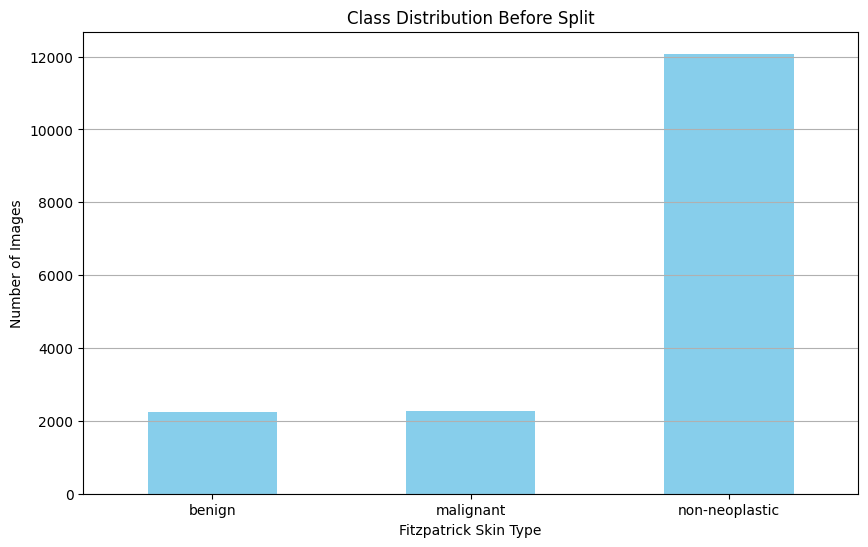

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned = pd.read_csv('/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/fitzpatrick17k.csv')
skin_type_counts = df_cleaned['three_partition_label'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
skin_type_counts.plot(kind='bar', color='skyblue')
plt.title('Class Distribution Before Split')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(skin_type_counts.index)), labels=skin_type_counts.index, rotation=0)
plt.grid(axis='y')
plt.show()


In [ ]:
df_cleaned['three_partition_label'].value_counts().sort_index()

three_partition_label
benign             2234
malignant          2263
non-neoplastic    12080
Name: count, dtype: int64

# Skin Tone 1

## Data loading

In [1]:
import pandas as pd
import os
from zipfile import ZipFile

# Define file paths
zip_file_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/all_images_preprocessed_V1_RAW.zip'
unzip_dir = '/content/all_images_preprocessed'
metadata_csv_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/image_metadata_preprocessed_V1_RAW.csv'

# Unzip the images folder (run only if not already unzipped)
if not os.path.exists(unzip_dir):
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)
    print(f"Images unzipped to {unzip_dir}")

# Load the metadata DataFrame
df_all_images = pd.read_csv(metadata_csv_path)
# keep only skin tone 1 type
df_all_images = df_all_images[df_all_images['fitzpatrick_scale'] == 1]

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train']
df_test = df_all_images[df_all_images['set'] == 'test']

# Function to load images dynamically based on class label
def get_class_data(df, class_label):
    if class_label in df['three_partition_label'].values:
        class_data = df[df['three_partition_label'] == class_label]
        X = class_data['resized_image_path'].values
        y = class_data['three_partition_label'].values
        return X, y
    else:
        print(f"Class '{class_label}' not found in DataFrame.")
        return None, None

# Example: Load image paths and labels for 'malignant' class from train set
X_train_malignant, y_train_malignant = get_class_data(df_train, 'malignant')

# Example: Load image paths and labels for 'non-neoplastic' class from test set
X_test_non_neoplastic, y_test_non_neoplastic = get_class_data(df_test, 'non-neoplastic')

# Display counts
print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Verify the loaded data
print(df_test.head())
df_train.head()

Images unzipped to /content/all_images_preprocessed
Train set class distribution:
three_partition_label
non-neoplastic    1640
malignant          362
benign             355
Name: count, dtype: int64

Test set class distribution:
three_partition_label
non-neoplastic    410
malignant          91
benign             89
Name: count, dtype: int64
                                      resized_image_path  \
12809  /content/all_images_preprocessed/158b0e4832f25...   
12813  /content/all_images_preprocessed/4b4fed3ca92f5...   
12816  /content/all_images_preprocessed/0a89bf3ba5412...   
12818  /content/all_images_preprocessed/6c2bb59f2beea...   
12823  /content/all_images_preprocessed/229a9055d25d6...   

      three_partition_label  fitzpatrick_scale   set  
12809                benign                  1  test  
12813                benign                  1  test  
12816                benign                  1  test  
12818        non-neoplastic                  1  test  
12823        non-neop

resized_image_path three_partition_label  \
13  /content/all_images_preprocessed/b238c2c95a5d4...                benign   
16  /content/all_images_preprocessed/352d70d64f9cb...        non-neoplastic   
20  /content/all_images_preprocessed/dc70f9265a0f3...        non-neoplastic   
25  /content/all_images_preprocessed/6ea64e00b1149...        non-neoplastic   
26  /content/all_images_preprocessed/bbfb27da062cb...        non-neoplastic   

    fitzpatrick_scale    set  
13                  1  train  
16                  1  train  
20                  1  train  
25                  1  train  
26                  1  train

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Load your data and initialize the LabelEncoder
# df_all_images = pd.read_csv(metadata_csv_path)

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_all_images['three_partition_label'] = label_encoder.fit_transform(df_all_images['three_partition_label'])

# Print the class mapping
print("Class mapping:")
for index, class_label in enumerate(label_encoder.classes_):
    print(f"{index}: {class_label}")

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train'].copy()
df_test = df_all_images[df_all_images['set'] == 'test'].copy()

print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Convert labels to string type for `class_mode='sparse'`
df_train['three_partition_label'] = df_train['three_partition_label'].astype(str)
df_test['three_partition_label'] = df_test['three_partition_label'].astype(str)

# Split df_train into training and validation sets
# df_test, df_val = train_test_split(df_test, test_size=0.50, stratify=df_test['three_partition_label'], random_state=42)

# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_test,
    # dataframe=df_val,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Class mapping:
0: benign
1: malignant
2: non-neoplastic
Train set class distribution:
three_partition_label
2    1640
1     362
0     355
Name: count, dtype: int64

Test set class distribution:
three_partition_label
2    410
1     91
0     89
Name: count, dtype: int64
Found 2357 validated image filenames belonging to 3 classes.
Found 590 validated image filenames belonging to 3 classes.
Found 590 validated image filenames belonging to 3 classes.


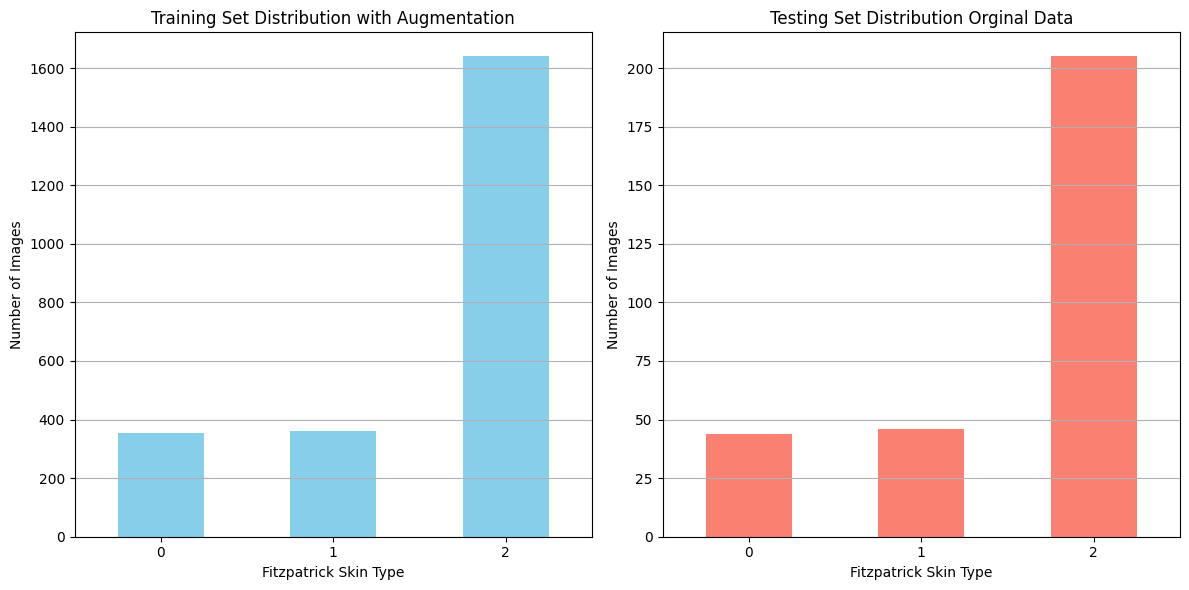

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

train_skin_type_counts = df_train['three_partition_label'].value_counts().sort_index()
test_skin_type_counts = df_test['three_partition_label'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_skin_type_counts.plot(kind='bar', color='skyblue')
plt.title('Training Set Distribution with Augmentation')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(train_skin_type_counts.index)), labels=train_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
test_skin_type_counts.plot(kind='bar', color='salmon')
plt.title('Testing Set Distribution Orginal Data')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(test_skin_type_counts.index)), labels=test_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


### See Last 20 train Image to be sure all goes well

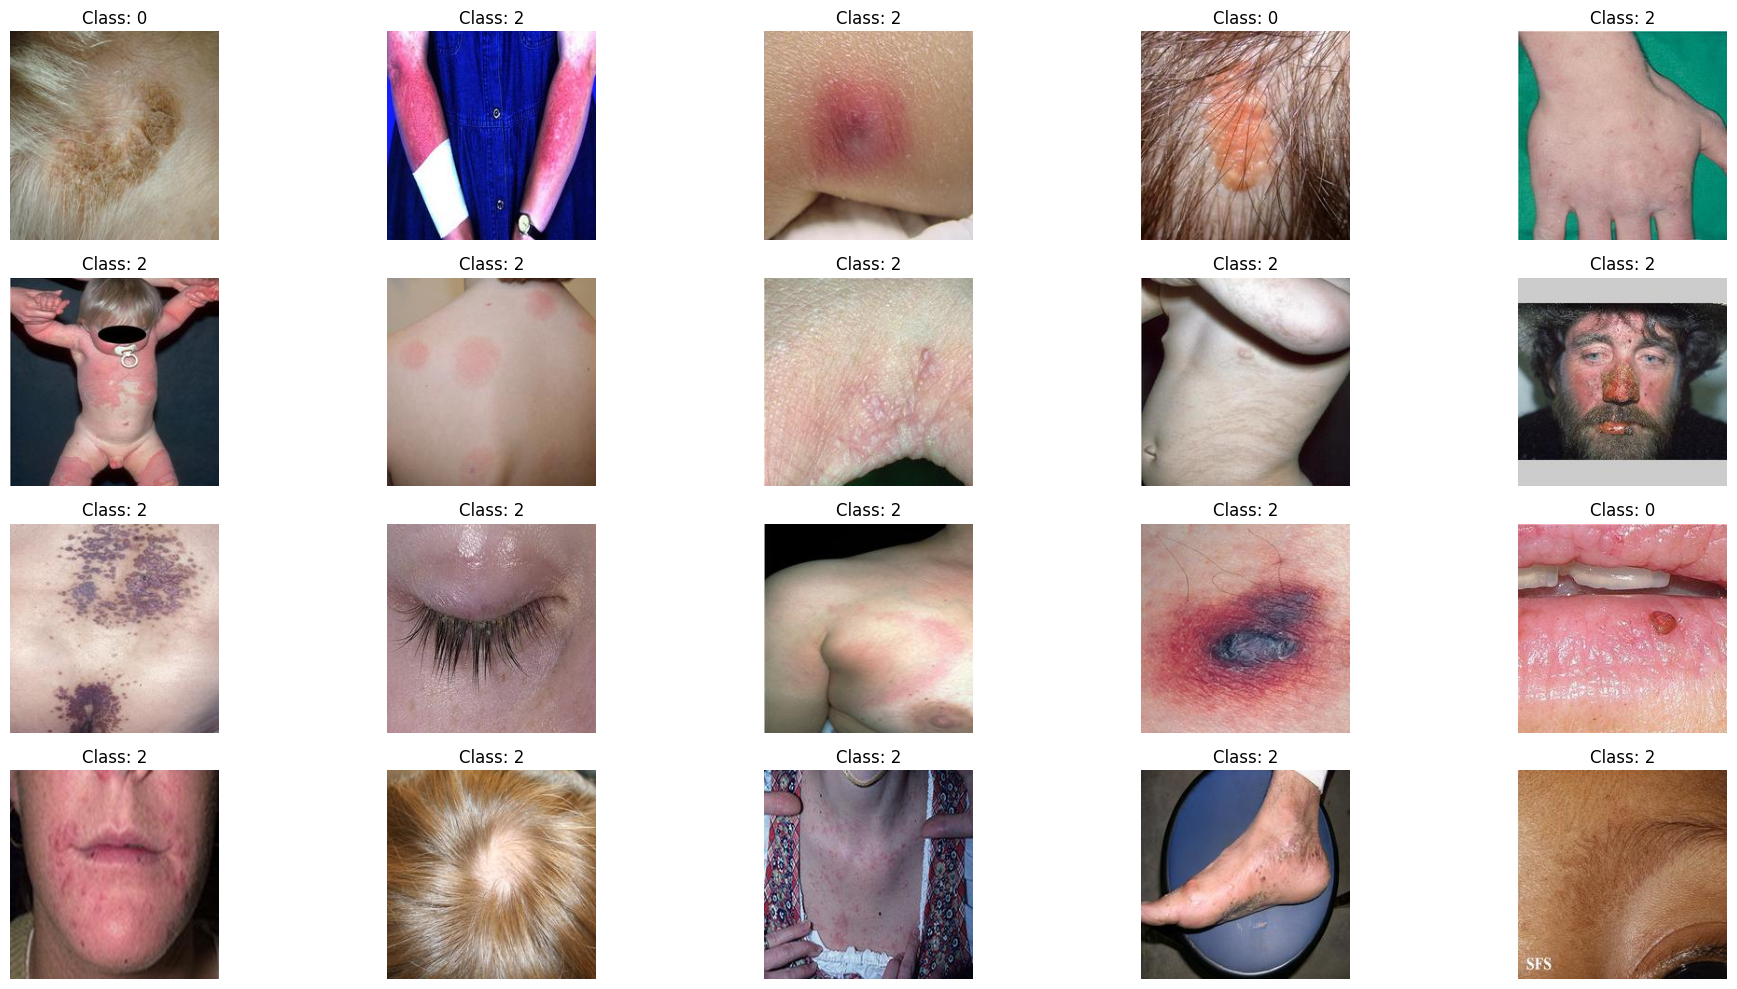

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image

# Display the first 20 augmented images
sample = df_train.tail(20)

plt.figure(figsize=(20, 10))

for i, row in enumerate(sample.itertuples(), start=1):
    image_path = row.resized_image_path
    image = Image.open(image_path)

    plt.subplot(4, 5, i)
    plt.imshow(image)
    plt.title(f"Class: {row.three_partition_label}")
    plt.axis('off')

plt.tight_layout()
plt.show()


## EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load the EfficientNetB0 model with ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
x = BatchNormalization()(x)  # Batch normalization for stability
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to train only the custom layers
for layer in base_model.layers:
    layer.trainable = False

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Compile and fit the model with class weights
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 96s 419ms/step - accuracy: 0.4113 - loss: 1.6361 - val_accuracy: 0.5186 - val_loss: 1.0710 - learning_rate: 1.0000e-04
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.5307 - loss: 1.3028 - val_accuracy: 0.6508 - val_loss: 0.9070 - learning_rate: 1.0000e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 9s 84ms/step - accuracy: 0.6134 - loss: 0.9436 - val_accuracy: 0.7017 - val_loss: 0.8178 - learning_rate: 1.0000e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 103ms/step - accuracy: 0.6734 - loss: 0.8306 - val_accuracy: 0.6915 - val_loss: 0.7893 - learning_rate: 1.0000e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 125ms/step - accuracy: 0.7438 - loss: 0.6600 - val_accuracy: 0.7186 - val_loss: 0.7932 - learning_rate: 1.0000e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.7555 - loss: 0.6213 - val_accuracy: 0.7424 - val_loss: 0.8079 - learning_rate: 1.0000e-04
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 90ms/step - accuracy: 0.7955 - lo

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_EfficientNetB0_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_EfficientNetB0_19_Sept_2024.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 18s 794ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.25      0.30        44
           1       0.54      0.65      0.59        46
           2       0.83      0.85      0.84       205

    accuracy                           0.73       295
   macro avg       0.58      0.58      0.58       295
weighted avg       0.72      0.73      0.72       295



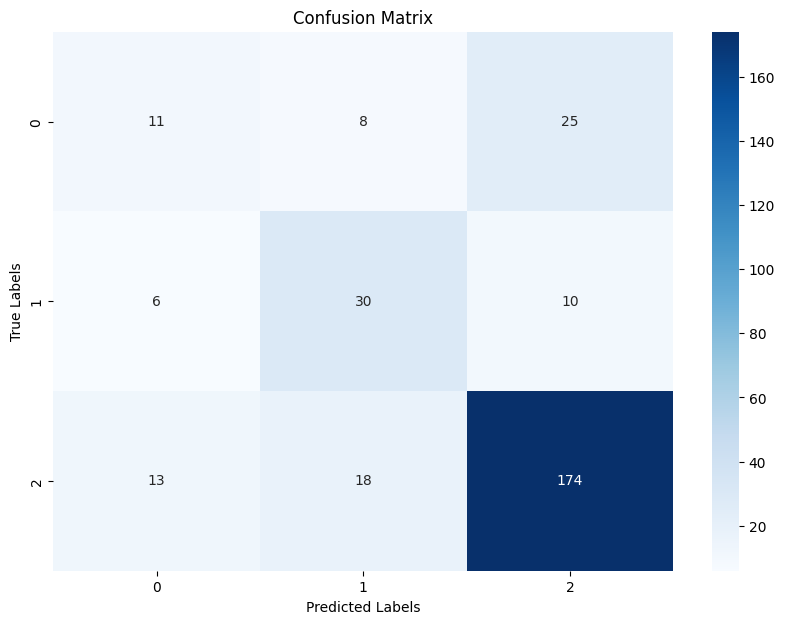

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

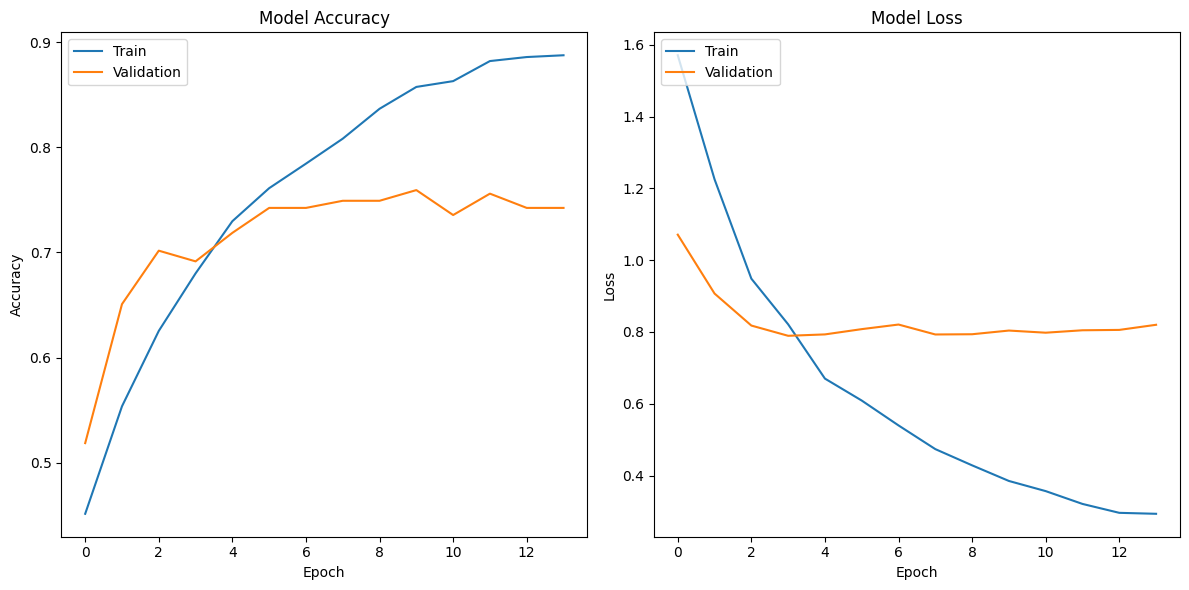

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 48s 428ms/step - accuracy: 0.3855 - loss: 8.5121 - val_accuracy: 0.3390 - val_loss: 8.2377 - learning_rate: 1.0000e-04
Epoch 2/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 194ms/step - accuracy: 0.5272 - loss: 7.6968 - val_accuracy: 0.4983 - val_loss: 7.3923 - learning_rate: 1.0000e-04
Epoch 3/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 184ms/step - accuracy: 0.5714 - loss: 7.2022 - val_accuracy: 0.6441 - val_loss: 6.8964 - learning_rate: 1.0000e-04
Epoch 4/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 185ms/step - accuracy: 0.6583 - loss: 6.6965 - val_accuracy: 0.7051 - val_loss: 6.5020 - learning_rate: 1.0000e-04
Epoch 5/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 14s 187ms/step - accuracy: 0.6914 - loss: 6.3446 - val_accuracy: 0.7051 - val_loss: 6.2386 - learning_rate: 1.0000e-04
Epoch 6/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 15s 189ms/step - accuracy: 0.7209 - loss: 6.0464 - val_accuracy: 0.7322 - val_loss: 5.9606 - learning_rate: 1.0000e-04
Epoch 7/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 21s 192ms/step - acc

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_VGG19_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_VGG19_19_Sept_2024.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 333ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.23      0.30        44
           1       0.64      0.46      0.53        46
           2       0.79      0.93      0.86       205

    accuracy                           0.75       295
   macro avg       0.62      0.54      0.56       295
weighted avg       0.72      0.75      0.72       295



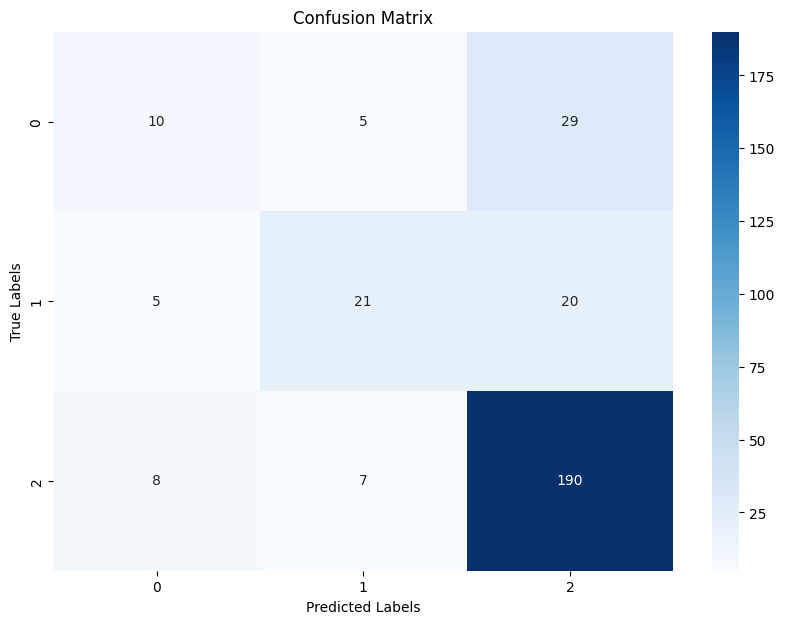

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

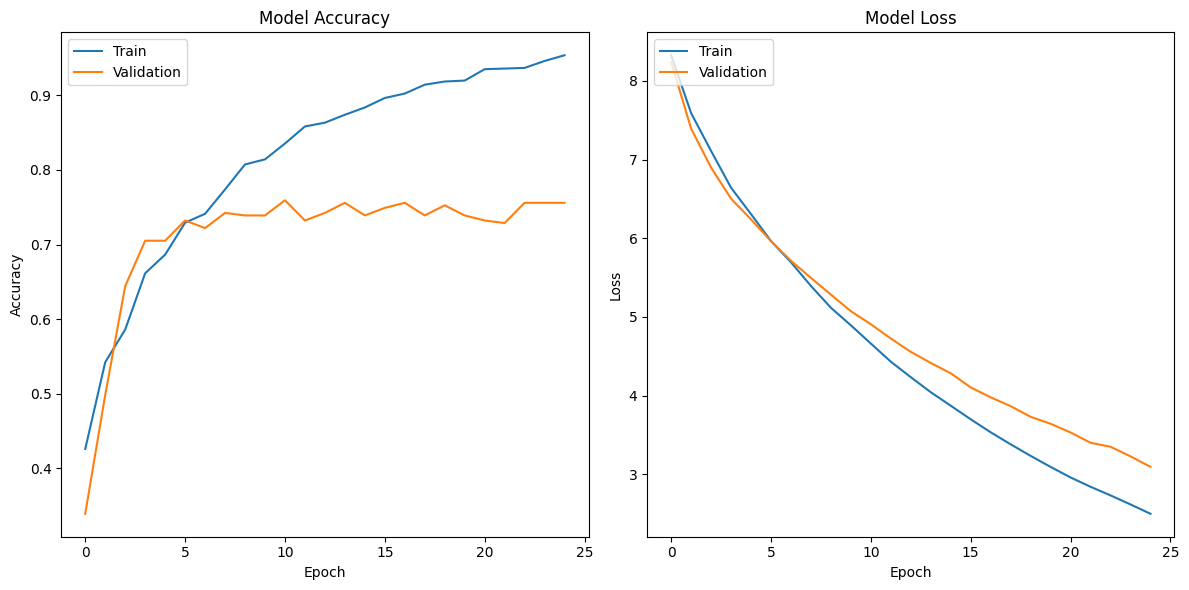

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load a pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 31s 239ms/step - accuracy: 0.6063 - loss: 1.2075 - val_accuracy: 0.7119 - val_loss: 0.7550 - learning_rate: 1.0000e-04
Epoch 2/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 94ms/step - accuracy: 0.7267 - loss: 0.6844 - val_accuracy: 0.7254 - val_loss: 0.7154 - learning_rate: 1.0000e-04
Epoch 3/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 92ms/step - accuracy: 0.7701 - loss: 0.5756 - val_accuracy: 0.7220 - val_loss: 0.7196 - learning_rate: 1.0000e-04
Epoch 4/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.8029 - loss: 0.5284 - val_accuracy: 0.7424 - val_loss: 0.7045 - learning_rate: 1.0000e-04
Epoch 5/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 96ms/step - accuracy: 0.8281 - loss: 0.4543 - val_accuracy: 0.7661 - val_loss: 0.6822 - learning_rate: 1.0000e-04
Epoch 6/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.8481 - loss: 0.4165 - val_accuracy: 0.7390 - val_loss: 0.6934 - learning_rate: 1.0000e-04
Epoch 7/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - accuracy: 0.8620 - loss: 0

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_ResNet50_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_ResNet50_19_Sept_2024.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 393ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.38      0.14      0.20        44
           1       0.74      0.57      0.64        46
           2       0.79      0.94      0.86       205

    accuracy                           0.76       295
   macro avg       0.64      0.55      0.57       295
weighted avg       0.72      0.76      0.73       295



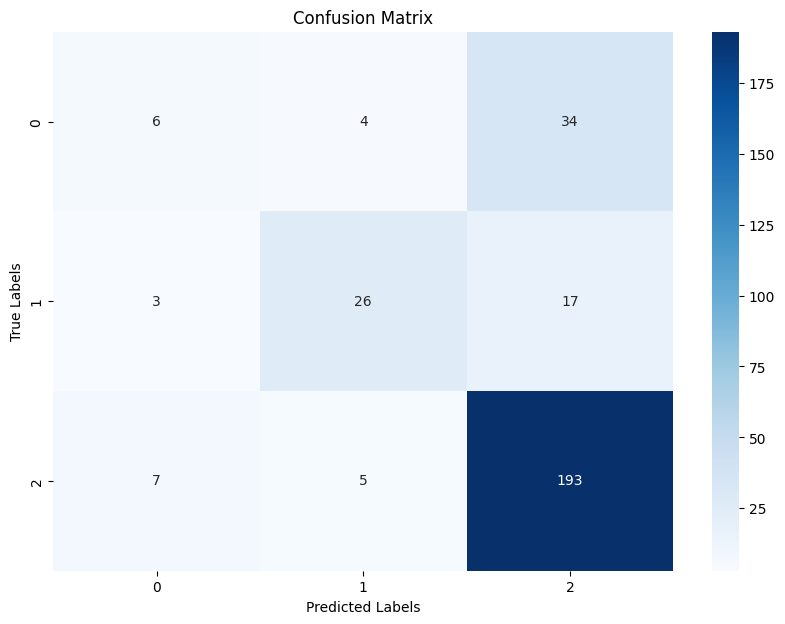

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

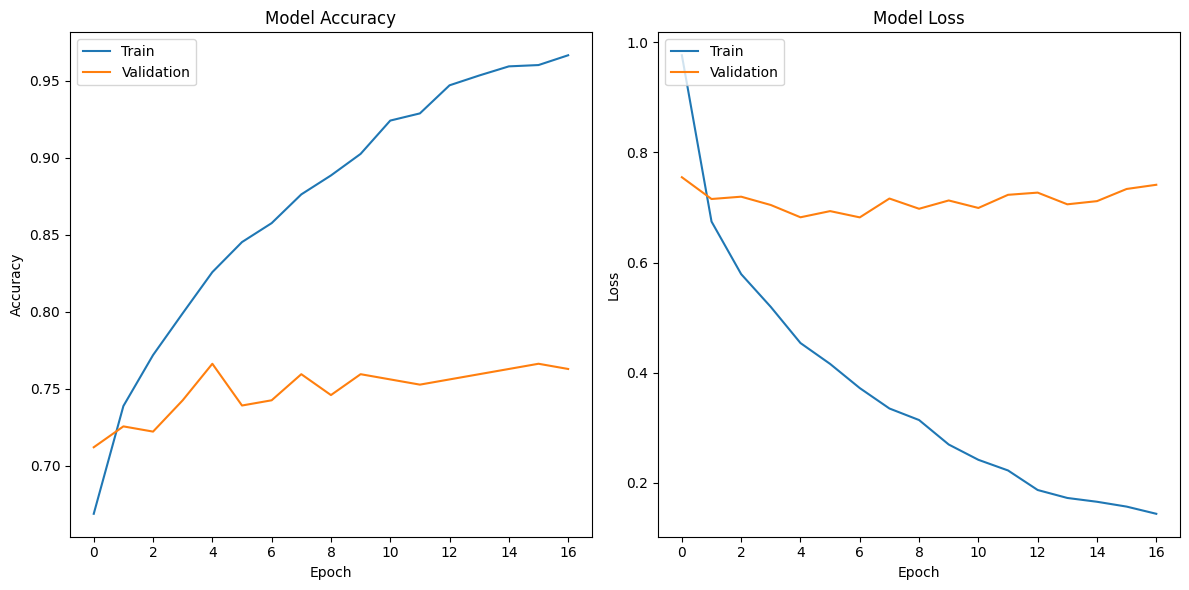

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('densenet201_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'DenseNet201 Test accuracy: {test_accuracy:.4f}')


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 97s 763ms/step - accuracy: 0.5808 - loss: 2.1580 - val_accuracy: 0.6983 - val_loss: 1.3876 - learning_rate: 1.0000e-04
Epoch 2/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 136ms/step - accuracy: 0.5986 - loss: 1.5190 - val_accuracy: 0.7085 - val_loss: 1.2092 - learning_rate: 1.0000e-04
Epoch 3/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step - accuracy: 0.6429 - loss: 1.2628 - val_accuracy: 0.7119 - val_loss: 0.9577 - learning_rate: 1.0000e-04
Epoch 4/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 140ms/step - accuracy: 0.6617 - loss: 1.0213 - val_accuracy: 0.7220 - val_loss: 0.8652 - learning_rate: 1.0000e-04
Epoch 5/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 137ms/step - accuracy: 0.6877 - loss: 0.8698 - val_accuracy: 0.7119 - val_loss: 0.8060 - learning_rate: 1.0000e-04
Epoch 6/25
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.7144 - loss: 0.7912 - val_accuracy: 0.7186 - val_loss: 0.8040 - learning_rate: 1.0000e-04
Epoch 7

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_DenseNet201_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_DenseNet201_19_Sept_2024.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.18      0.28        44
           1       0.46      0.26      0.33        46
           2       0.75      0.94      0.83       205

    accuracy                           0.72       295
   macro avg       0.60      0.46      0.48       295
weighted avg       0.68      0.72      0.67       295



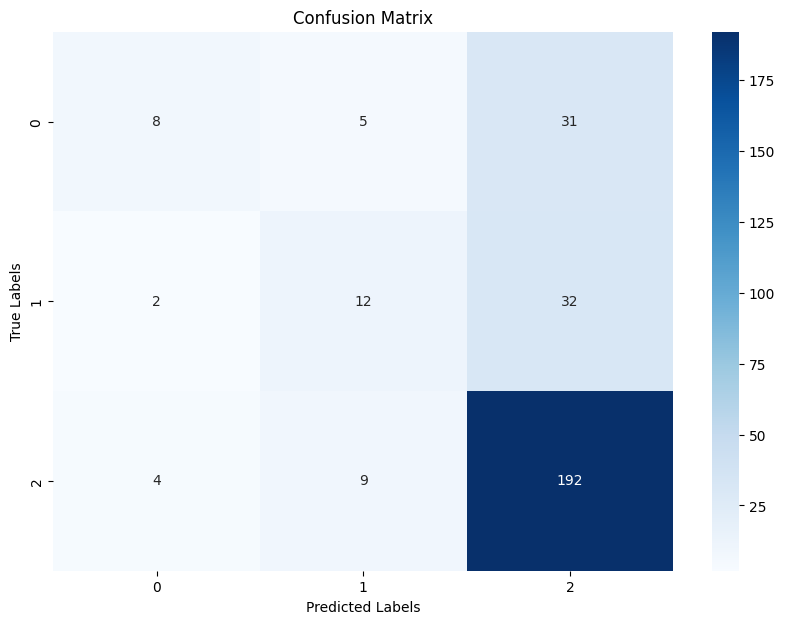

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

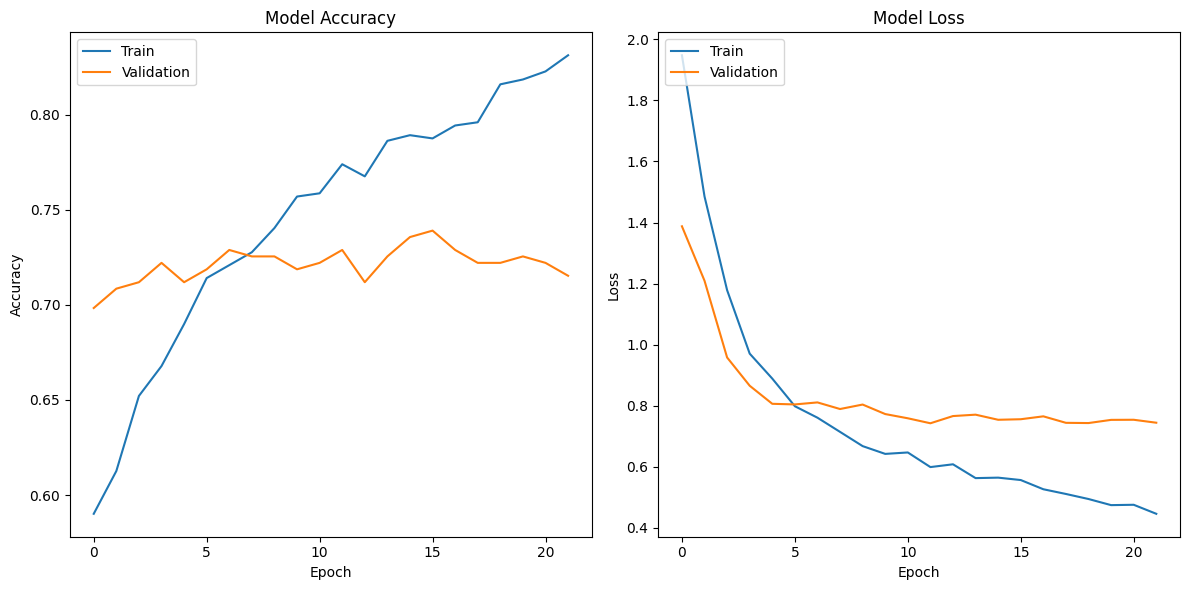

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('mobilenetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    # class_weight=custom_class_weights,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'MobileNetV2 Test accuracy: {test_accuracy:.4f}')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 23s 188ms/step - accuracy: 0.6358 - loss: 0.9816 - val_accuracy: 0.7322 - val_loss: 0.7438 - learning_rate: 1.0000e-04
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7000 - loss: 0.7817 - val_accuracy: 0.7288 - val_loss: 0.7166 - learning_rate: 1.0000e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.7318 - loss: 0.6853 - val_accuracy: 0.7424 - val_loss: 0.7072 - learning_rate: 1.0000e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.7451 - loss: 0.6852 - val_accuracy: 0.7424 - val_loss: 0.7078 - learning_rate: 1.0000e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 49ms/step - accuracy: 0.7407 - loss: 0.6576 - val_accuracy: 0.7356 - val_loss: 0.7015 - learning_rate: 1.0000e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 0.7688 - loss: 0.5892 - val_accuracy: 0.7322 - val_loss: 0.7045 - learning_rate: 1.0000e-04
Epoch 7/20
74/74 ━━

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_MobileNetV2_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_MobileNetV2_19_Sept_2024.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 310ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.09      0.15        44
           1       0.58      0.41      0.48        46
           2       0.77      0.94      0.85       205

    accuracy                           0.73       295
   macro avg       0.57      0.48      0.49       295
weighted avg       0.68      0.73      0.68       295



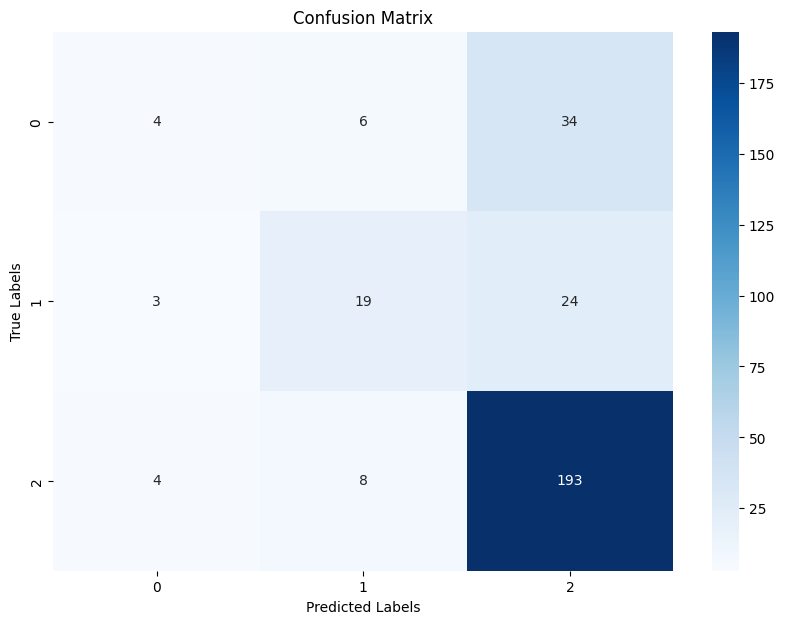

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

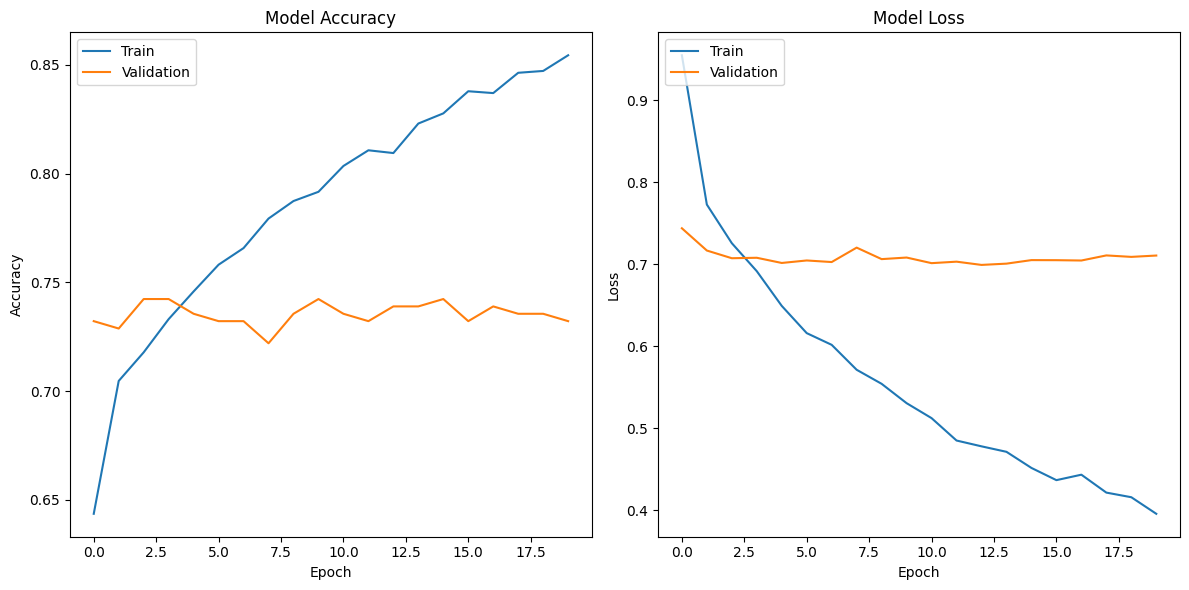

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('xception_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Xception Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step - accuracy: 0.5538 - loss: 4.0931

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


74/74 ━━━━━━━━━━━━━━━━━━━━ 28s 294ms/step - accuracy: 0.5541 - loss: 4.0863 - val_accuracy: 0.6678 - val_loss: 1.9554 - learning_rate: 1.0000e-04
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 132ms/step - accuracy: 0.5947 - loss: 2.6947 - val_accuracy: 0.6746 - val_loss: 1.5374 - learning_rate: 1.0000e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 10s 134ms/step - accuracy: 0.5767 - loss: 2.3035 - val_accuracy: 0.6339 - val_loss: 1.2202 - learning_rate: 1.0000e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 20s 133ms/step - accuracy: 0.6461 - loss: 1.5332 - val_accuracy: 0.6949 - val_loss: 1.2566 - learning_rate: 1.0000e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.6212 - loss: 1.3479 - val_accuracy: 0.6644 - val_loss: 1.0446 - learning_rate: 1.0000e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 141ms/step - accuracy: 0.6791 - loss: 0.9741 - val_accuracy: 0.7017 - val_loss: 1.0325 - learning_rate: 1.0000e-04
Epoch 7/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.69

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_Xception_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_Xception_19_Sept_2024.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 321ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.11      0.16        44
           1       0.38      0.26      0.31        46
           2       0.72      0.87      0.79       205

    accuracy                           0.66       295
   macro avg       0.46      0.41      0.42       295
weighted avg       0.61      0.66      0.62       295



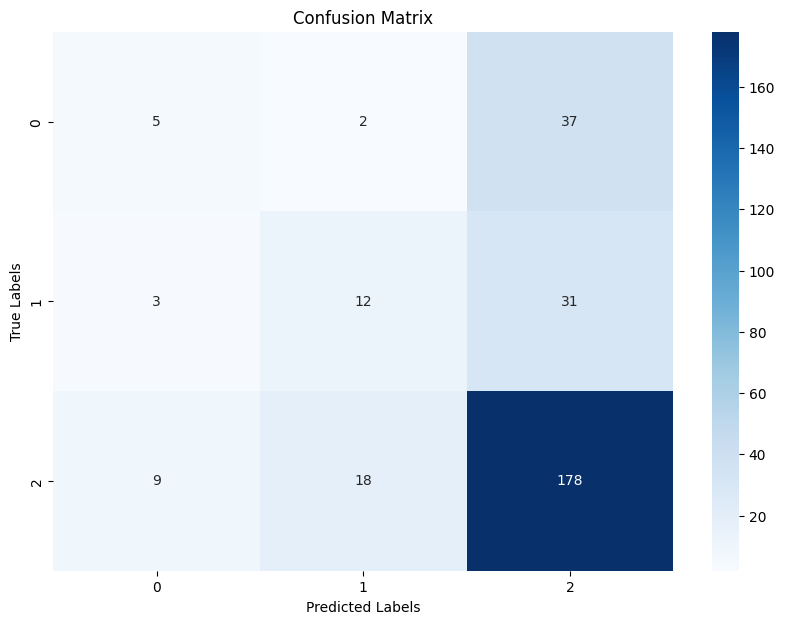

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('inceptionresnetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load InceptionResNetV2
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'InceptionResNetV2 Test accuracy: {test_accuracy:.4f}')


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 68s 542ms/step - accuracy: 0.5259 - loss: 62.4998 - val_accuracy: 0.6949 - val_loss: 19.8712 - learning_rate: 1.0000e-04
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.5834 - loss: 22.1085 - val_accuracy: 0.6949 - val_loss: 3.9944 - learning_rate: 1.0000e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 165ms/step - accuracy: 0.5630 - loss: 3.1539 - val_accuracy: 0.6915 - val_loss: 0.8989 - learning_rate: 1.0000e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 161ms/step - accuracy: 0.6687 - loss: 0.9053 - val_accuracy: 0.6915 - val_loss: 0.9009 - learning_rate: 1.0000e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 13s 164ms/step - accuracy: 0.6828 - loss: 0.9296 - val_accuracy: 0.6949 - val_loss: 0.8872 - learning_rate: 1.0000e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 12s 164ms/step - accuracy: 0.6690 - loss: 0.9323 - val_accuracy: 0.6949 - val_loss: 0.8747 - learning_rate: 1.0000e-04
Ep

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_InceptionResNetV2_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

10/10 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.00      0.00      0.00        46
           2       0.69      1.00      0.82       205

    accuracy                           0.69       295
   macro avg       0.23      0.33      0.27       295
weighted avg       0.48      0.69      0.57       295



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


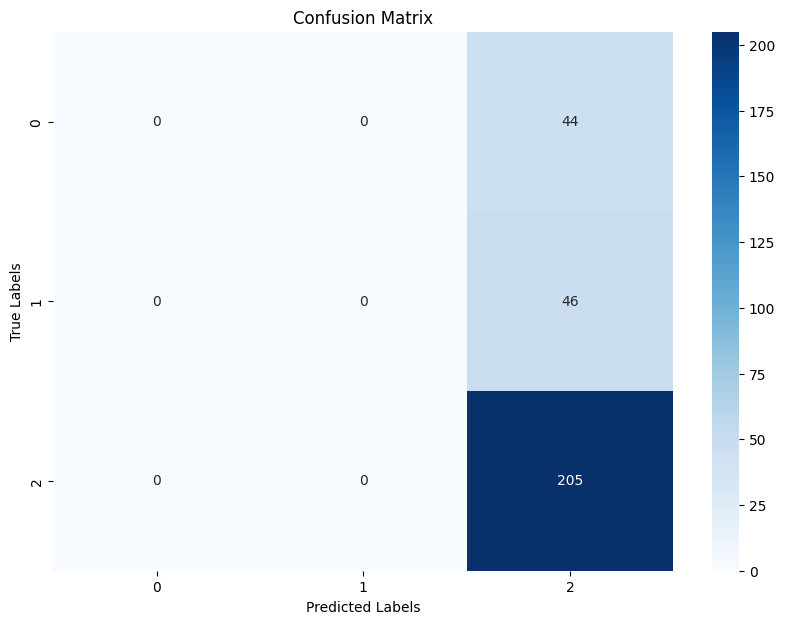

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

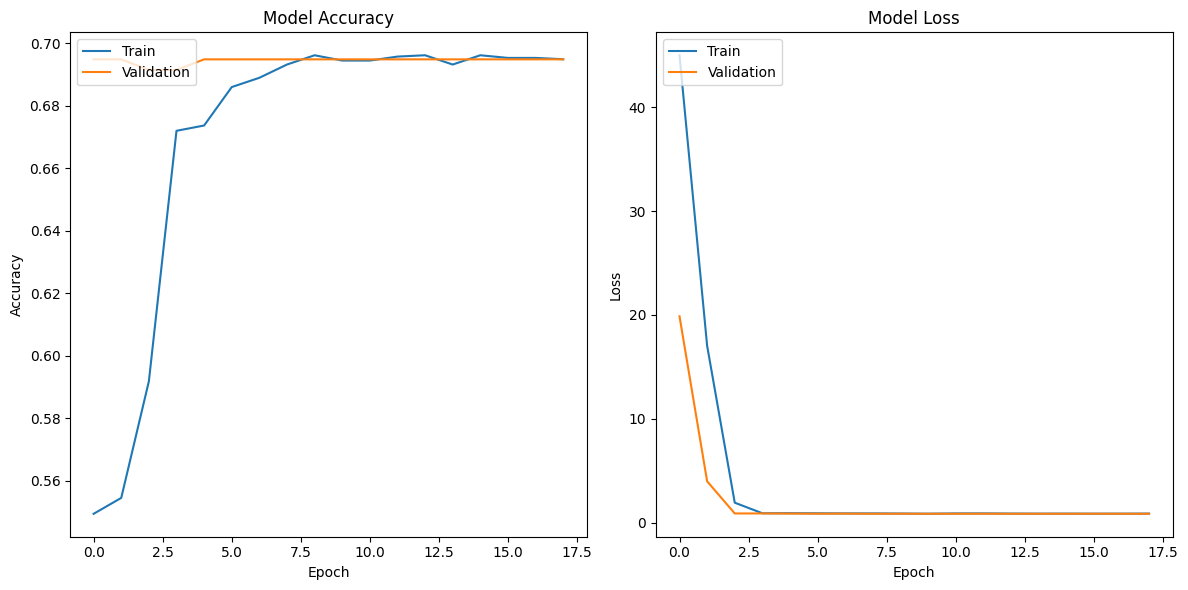

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## NASNetLarge

In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('nasnetlarge_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load NASNetLarge
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'NASNetLarge Test accuracy: {test_accuracy:.4f}')


343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 117s 966ms/step - accuracy: 0.5767 - loss: 1.5827 - val_accuracy: 0.6847 - val_loss: 0.9061 - learning_rate: 1.0000e-04
Epoch 2/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 29s 389ms/step - accuracy: 0.6294 - loss: 1.0697 - val_accuracy: 0.6881 - val_loss: 0.8616 - learning_rate: 1.0000e-04
Epoch 3/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 354ms/step - accuracy: 0.6658 - loss: 0.9555 - val_accuracy: 0.6881 - val_loss: 0.8545 - learning_rate: 1.0000e-04
Epoch 4/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 26s 351ms/step - accuracy: 0.7090 - loss: 0.8369 - val_accuracy: 0.7017 - val_loss: 0.8301 - learning_rate: 1.0000e-04
Epoch 5/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 358ms/step - accuracy: 0.6881 - loss: 0.8115 - val_accuracy: 0.6881 - val_loss: 0.8243 - learning_rate: 1.0000e-04
Epoch 6/20
74/74 ━━━━━━━━━━━━━━━━━━━━ 27s 357ms/step - accuracy: 0.6956 - loss: 0.7696 - val_accuracy: 0.6915 - val_loss: 0.8194 - learning_rate: 1.0000e-04
Epoc

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_NASNetLarge_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_1_NASNetLarge_20_Sept_2024.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 34s 2s/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        44
           1       0.57      0.17      0.27        46
           2       0.72      0.99      0.83       205

    accuracy                           0.71       295
   macro avg       0.43      0.39      0.37       295
weighted avg       0.59      0.71      0.62       295



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


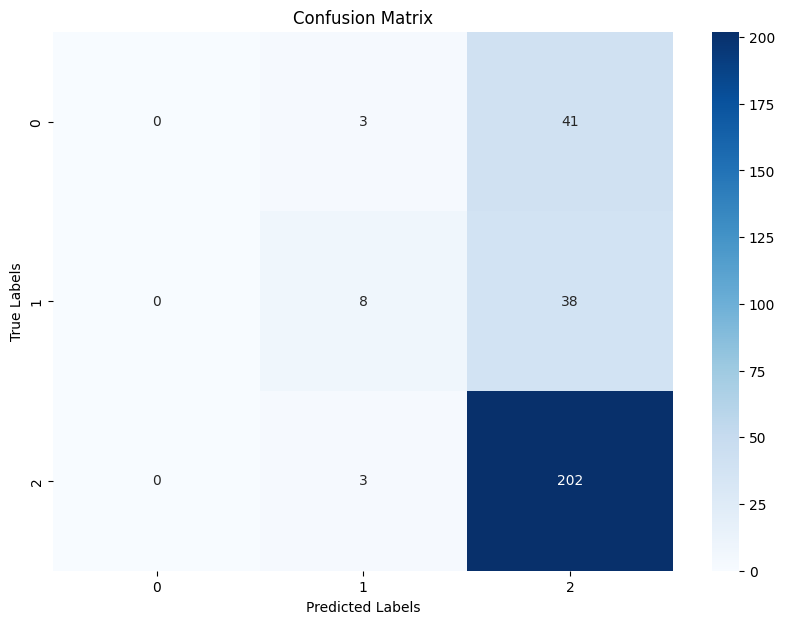

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

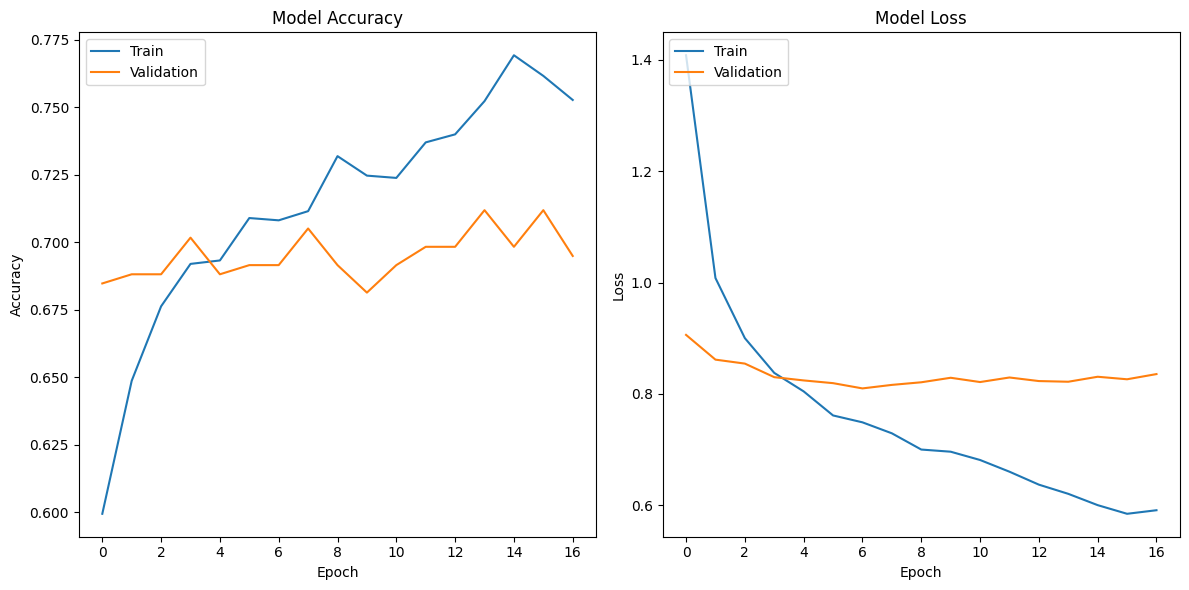

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Skin Tone 2

## Data Loading for Skin Tone 2

In [ ]:
import pandas as pd
import os
from zipfile import ZipFile

# Define file paths
zip_file_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/all_images_preprocessed_V1_RAW.zip'
unzip_dir = '/content/all_images_preprocessed'
metadata_csv_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/image_metadata_preprocessed_V1_RAW.csv'

# Unzip the images folder (run only if not already unzipped)
if not os.path.exists(unzip_dir):
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)
    print(f"Images unzipped to {unzip_dir}")

# Load the metadata DataFrame
df_all_images = pd.read_csv(metadata_csv_path)
# keep only skin tone 1 type
df_all_images = df_all_images[df_all_images['fitzpatrick_scale'] == 2]

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train']
df_test = df_all_images[df_all_images['set'] == 'test']

# Function to load images dynamically based on class label
def get_class_data(df, class_label):
    if class_label in df['three_partition_label'].values:
        class_data = df[df['three_partition_label'] == class_label]
        X = class_data['resized_image_path'].values
        y = class_data['three_partition_label'].values
        return X, y
    else:
        print(f"Class '{class_label}' not found in DataFrame.")
        return None, None

# Example: Load image paths and labels for 'malignant' class from train set
X_train_malignant, y_train_malignant = get_class_data(df_train, 'malignant')

# Example: Load image paths and labels for 'non-neoplastic' class from test set
X_test_non_neoplastic, y_test_non_neoplastic = get_class_data(df_test, 'non-neoplastic')

# Display counts
print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Verify the loaded data
print(df_test.head())
df_train.head()

Train set class distribution:
three_partition_label
non-neoplastic    2716
malignant          594
benign             537
Name: count, dtype: int64

Test set class distribution:
three_partition_label
non-neoplastic    679
malignant         148
benign            134
Name: count, dtype: int64
                                      resized_image_path  \
12811  /content/all_images_preprocessed/918013149950b...   
12815  /content/all_images_preprocessed/4f4ba96f9dafa...   
12817  /content/all_images_preprocessed/77bff9d0d119b...   
12822  /content/all_images_preprocessed/7d9dfa6e80ca4...   
12827  /content/all_images_preprocessed/6f3da6176f21a...   

      three_partition_label  fitzpatrick_scale   set  
12811        non-neoplastic                  2  test  
12815        non-neoplastic                  2  test  
12817        non-neoplastic                  2  test  
12822        non-neoplastic                  2  test  
12827        non-neoplastic                  2  test  


resized_image_path three_partition_label  \
0   /content/all_images_preprocessed/8e5717074b68a...        non-neoplastic   
12  /content/all_images_preprocessed/7b2b054b7073d...        non-neoplastic   
15  /content/all_images_preprocessed/18edc9479482f...        non-neoplastic   
21  /content/all_images_preprocessed/6c395be9325db...        non-neoplastic   
23  /content/all_images_preprocessed/6204b523ebb98...                benign   

    fitzpatrick_scale    set  
0                   2  train  
12                  2  train  
15                  2  train  
21                  2  train  
23                  2  train

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_all_images['three_partition_label'] = label_encoder.fit_transform(df_all_images['three_partition_label'])

# Print the class mapping
print("Class mapping:")
for index, class_label in enumerate(label_encoder.classes_):
    print(f"{index}: {class_label}")

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train'].copy()
df_test = df_all_images[df_all_images['set'] == 'test'].copy()

print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Convert labels to string type for `class_mode='sparse'`
df_train['three_partition_label'] = df_train['three_partition_label'].astype(str)
df_test['three_partition_label'] = df_test['three_partition_label'].astype(str)

# Split df_train into training and validation sets
df_test, df_val = train_test_split(df_test, test_size=0.50, stratify=df_test['three_partition_label'], random_state=42)

# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Class mapping:
0: benign
1: malignant
2: non-neoplastic
Train set class distribution:
three_partition_label
2    2716
1     594
0     537
Name: count, dtype: int64

Test set class distribution:
three_partition_label
2    679
1    148
0    134
Name: count, dtype: int64
Found 3847 validated image filenames belonging to 3 classes.
Found 481 validated image filenames belonging to 3 classes.
Found 480 validated image filenames belonging to 3 classes.


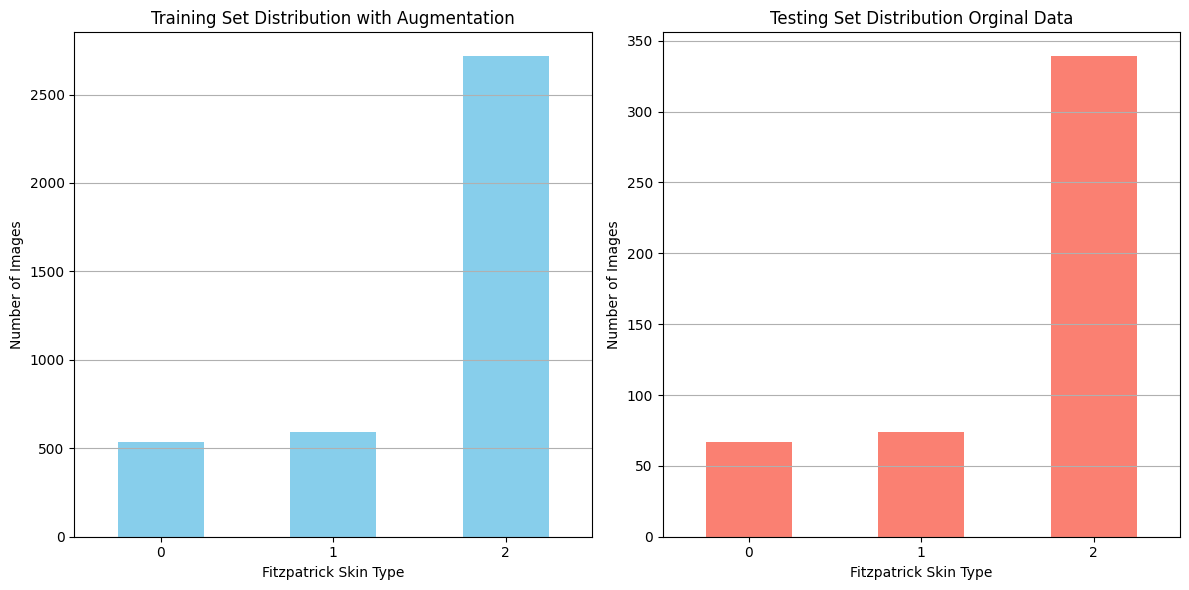

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

train_skin_type_counts = df_train['three_partition_label'].value_counts().sort_index()
test_skin_type_counts = df_test['three_partition_label'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_skin_type_counts.plot(kind='bar', color='skyblue')
plt.title('Training Set Distribution with Augmentation')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(train_skin_type_counts.index)), labels=train_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
test_skin_type_counts.plot(kind='bar', color='salmon')
plt.title('Testing Set Distribution Orginal Data')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(test_skin_type_counts.index)), labels=test_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


## EfficientNetB0




In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load the EfficientNetB0 model with ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
x = BatchNormalization()(x)  # Batch normalization for stability
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to train only the custom layers
for layer in base_model.layers:
    layer.trainable = False

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Compile and fit the model with class weights
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


121/121 ━━━━━━━━━━━━━━━━━━━━ 45s 215ms/step - accuracy: 0.4183 - loss: 1.6828 - val_accuracy: 0.6944 - val_loss: 0.8257 - learning_rate: 1.0000e-04
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.5589 - loss: 1.1660 - val_accuracy: 0.7193 - val_loss: 0.7342 - learning_rate: 1.0000e-04
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.6397 - loss: 0.9102 - val_accuracy: 0.7360 - val_loss: 0.7334 - learning_rate: 1.0000e-04
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.6919 - loss: 0.7688 - val_accuracy: 0.7339 - val_loss: 0.7253 - learning_rate: 1.0000e-04
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.7480 - loss: 0.6191 - val_accuracy: 0.7422 - val_loss: 0.7002 - learning_rate: 1.0000e-04
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7784 - loss: 0.5686 - val_accuracy: 0.7380 - val_loss: 0.7169 - learning_rate: 1.0000e-04
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_EfficientNetB0_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_EfficientNetB0_20_Sept_2024.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.27      0.33        67
           1       0.65      0.55      0.60        74
           2       0.83      0.91      0.87       339

    accuracy                           0.77       480
   macro avg       0.63      0.58      0.60       480
weighted avg       0.74      0.77      0.75       480



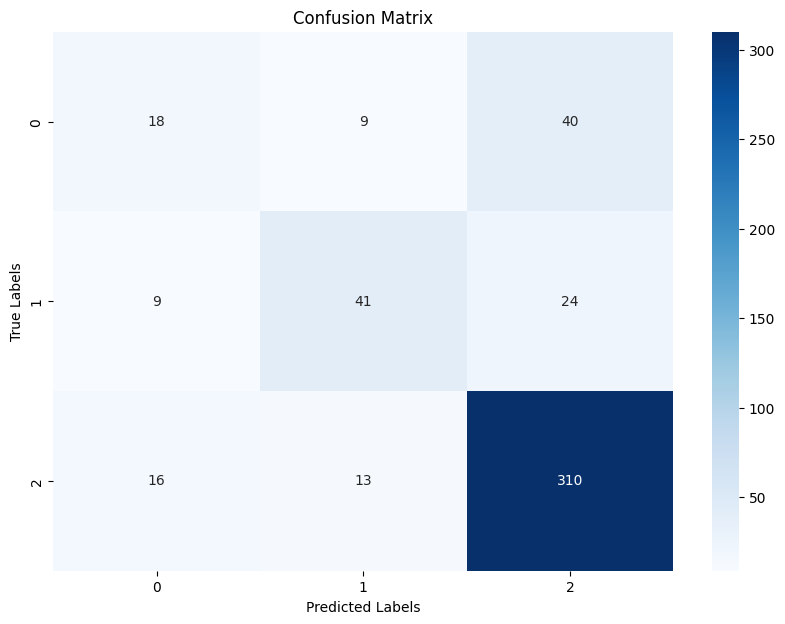

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

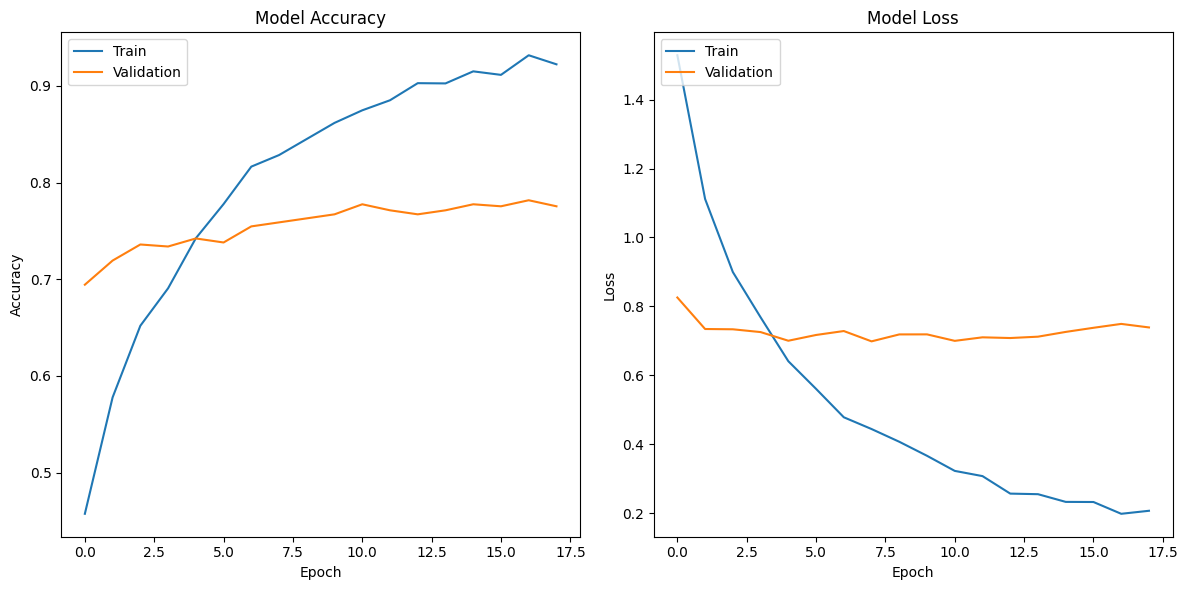

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 50s 249ms/step - accuracy: 0.3884 - loss: 8.3692 - val_accuracy: 0.5530 - val_loss: 7.4184 - learning_rate: 1.0000e-04
Epoch 2/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 173ms/step - accuracy: 0.5313 - loss: 7.3713 - val_accuracy: 0.6279 - val_loss: 6.7669 - learning_rate: 1.0000e-04
Epoch 3/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step - accuracy: 0.6066 - loss: 6.7259 - val_accuracy: 0.6965 - val_loss: 6.2072 - learning_rate: 1.0000e-04
Epoch 4/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.6667 - loss: 6.1667 - val_accuracy: 0.7152 - val_loss: 5.8275 - learning_rate: 1.0000e-04
Epoch 5/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 179ms/step - accuracy: 0.6886 - loss: 5.7309 - val_accuracy: 0.7443 - val_loss: 5.4097 - learning_rate: 1.0000e-04
Epoch 6/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 178ms/step - accuracy: 0.7268 - loss: 5.3087 - val_accuracy: 0.7443 - val_loss: 5.1072 - learning_rate: 1.0000

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_VGG19_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_VGG19_20_Sept_2024.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.12      0.19        67
           1       0.67      0.46      0.54        74
           2       0.78      0.95      0.86       339

    accuracy                           0.76       480
   macro avg       0.64      0.51      0.53       480
weighted avg       0.72      0.76      0.72       480



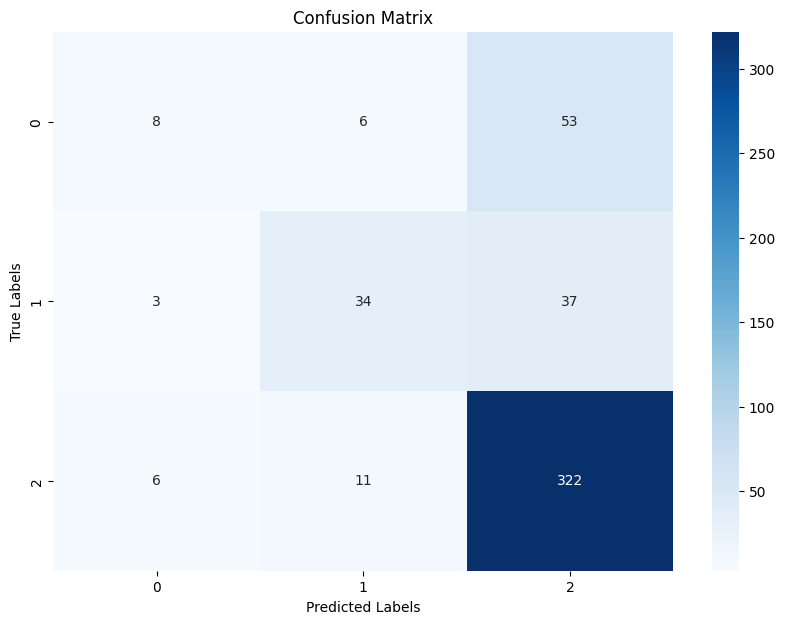

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

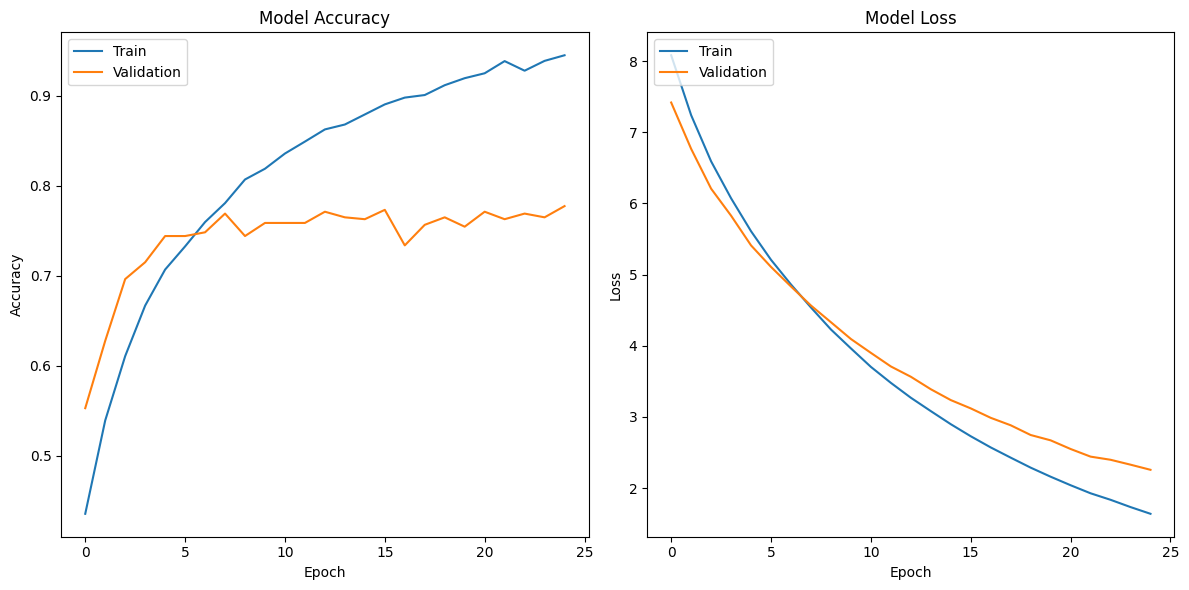

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load a pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


121/121 ━━━━━━━━━━━━━━━━━━━━ 30s 167ms/step - accuracy: 0.6459 - loss: 1.0033 - val_accuracy: 0.7734 - val_loss: 0.6506 - learning_rate: 1.0000e-04
Epoch 2/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 13s 100ms/step - accuracy: 0.7366 - loss: 0.6799 - val_accuracy: 0.7796 - val_loss: 0.6209 - learning_rate: 1.0000e-04
Epoch 3/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 13s 102ms/step - accuracy: 0.7618 - loss: 0.5839 - val_accuracy: 0.7942 - val_loss: 0.5941 - learning_rate: 1.0000e-04
Epoch 4/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 13s 101ms/step - accuracy: 0.8203 - loss: 0.4857 - val_accuracy: 0.7817 - val_loss: 0.5887 - learning_rate: 1.0000e-04
Epoch 5/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step - accuracy: 0.8292 - loss: 0.4520 - val_accuracy: 0.7838 - val_loss: 0.5778 - learning_rate: 1.0000e-04
Epoch 6/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 97ms/step - accuracy: 0.8469 - loss: 0.4094 - val_accuracy: 0.7817 - val_loss: 0.5821 - learning_rate: 1.0000e-04
Epoch 7/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 12s 98ms/step - acc

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_ResNet50_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_ResNet50_19_Sept_2024.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 82ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.21      0.29        67
           1       0.66      0.58      0.62        74
           2       0.82      0.94      0.88       339

    accuracy                           0.78       480
   macro avg       0.66      0.58      0.60       480
weighted avg       0.75      0.78      0.76       480



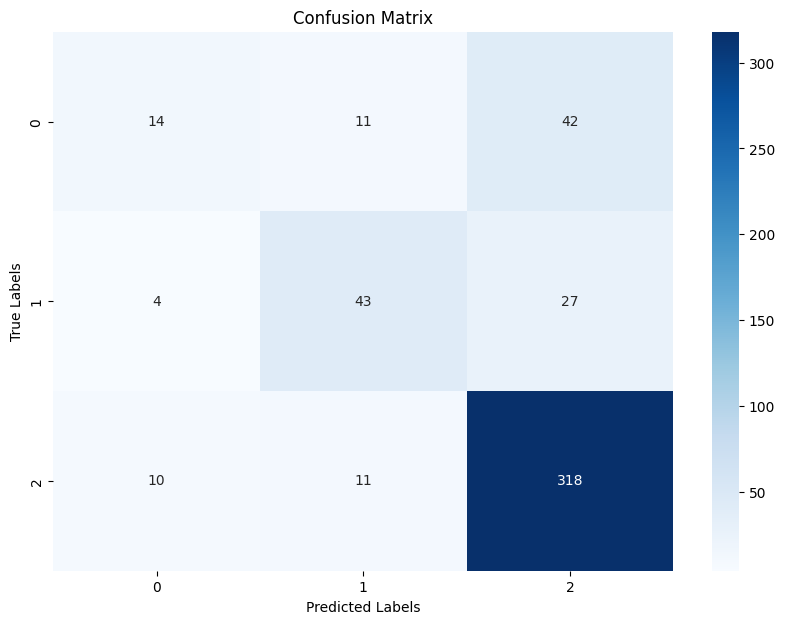

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

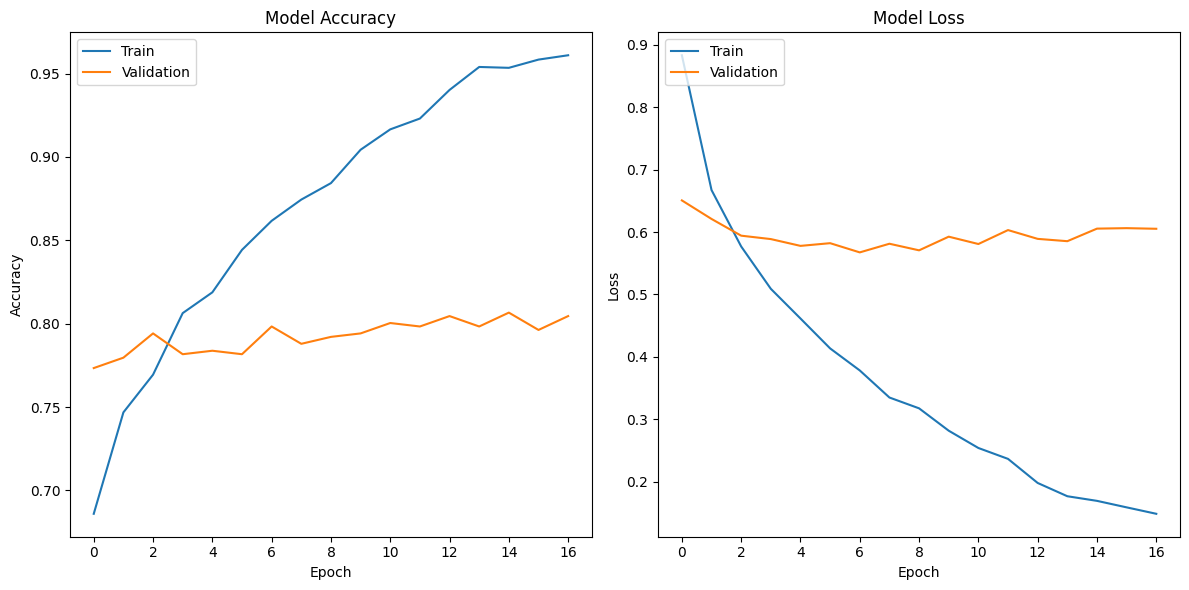

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('densenet201_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'DenseNet201 Test accuracy: {test_accuracy:.4f}')


74836368/74836368 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 102s 501ms/step - accuracy: 0.5761 - loss: 2.4413 - val_accuracy: 0.7069 - val_loss: 0.9647 - learning_rate: 1.0000e-04
Epoch 2/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 18s 149ms/step - accuracy: 0.6210 - loss: 1.3113 - val_accuracy: 0.7006 - val_loss: 0.8372 - learning_rate: 1.0000e-04
Epoch 3/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.6765 - loss: 0.9444 - val_accuracy: 0.7256 - val_loss: 0.7965 - learning_rate: 1.0000e-04
Epoch 4/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - accuracy: 0.6846 - loss: 0.8226 - val_accuracy: 0.7318 - val_loss: 0.7425 - learning_rate: 1.0000e-04
Epoch 5/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.7005 - loss: 0.7894 - val_accuracy: 0.7339 - val_loss: 0.7327 - learning_rate: 1.0000e-04
Epoch 6/25
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 137ms/step - accuracy: 0.7155 - loss: 0.7504 - val_accuracy: 0.7339 - val_loss: 0.7566 - learning_rate: 1.000

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_DenseNet201_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_DenseNet201_19_Sept_2024.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 16s 115ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.03        67
           1       0.45      0.30      0.36        74
           2       0.74      0.94      0.83       339

    accuracy                           0.71       480
   macro avg       0.73      0.42      0.41       480
weighted avg       0.73      0.71      0.65       480



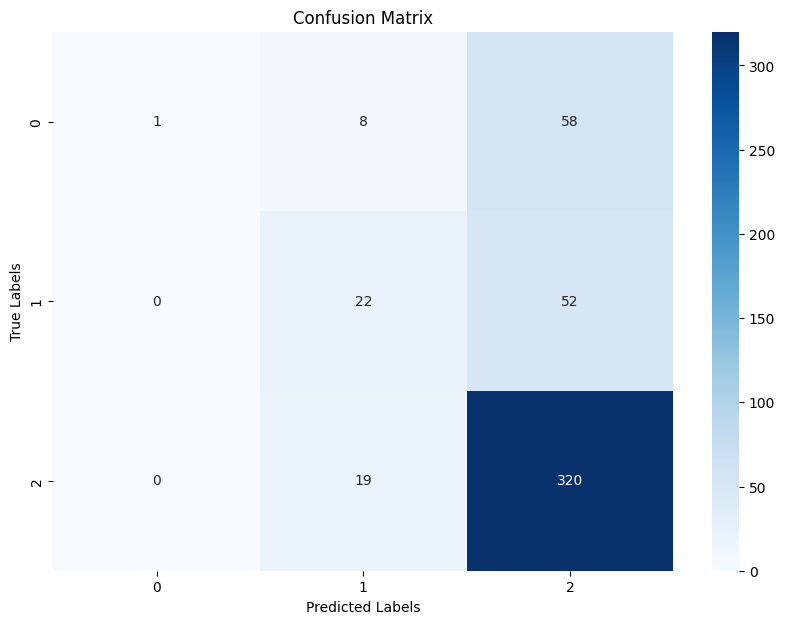

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

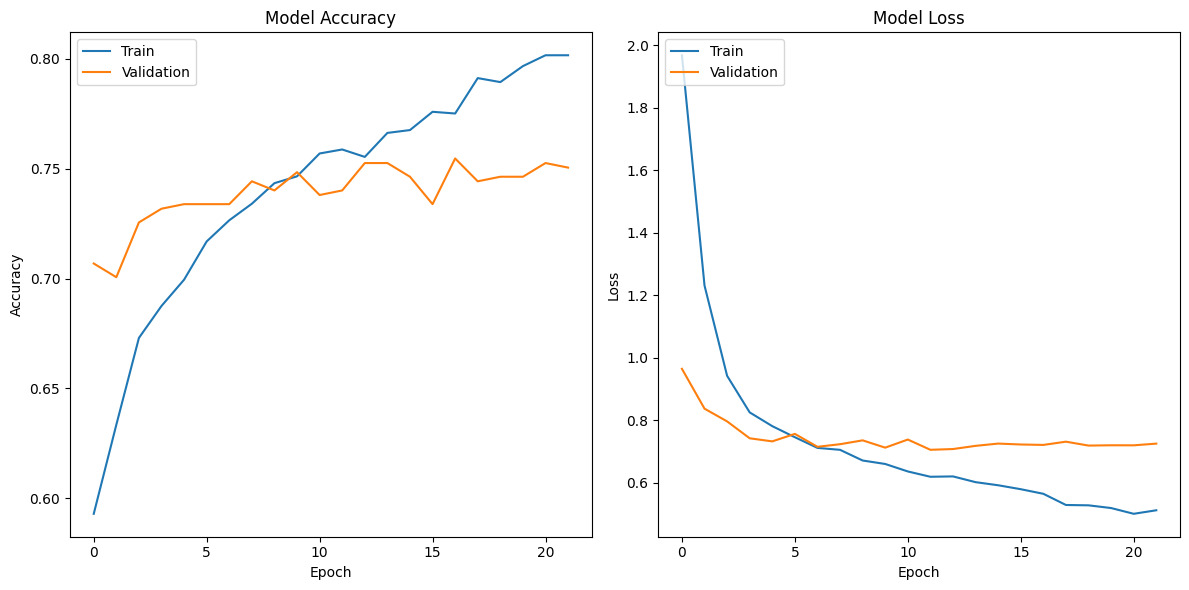

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('mobilenetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    # class_weight=custom_class_weights,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'MobileNetV2 Test accuracy: {test_accuracy:.4f}')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 26s 128ms/step - accuracy: 0.6188 - loss: 1.0331 - val_accuracy: 0.7173 - val_loss: 0.7452 - learning_rate: 1.0000e-04
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.7037 - loss: 0.7715 - val_accuracy: 0.7380 - val_loss: 0.6991 - learning_rate: 1.0000e-04
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.7183 - loss: 0.7193 - val_accuracy: 0.7318 - val_loss: 0.7116 - learning_rate: 1.0000e-04
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.7273 - loss: 0.7105 - val_accuracy: 0.7422 - val_loss: 0.6977 - learning_rate: 1.0000e-04
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 54ms/step - accuracy: 0.7376 - loss: 0.6673 - val_accuracy: 0.7443 - val_loss: 0.6902 - learning_rate: 1.0000e-04
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - accuracy: 0.7478 - loss: 0.6355 - val_accuracy: 0.7339 - val_loss: 0.6949 - learning_rate: 1.0000e-04
Epoch 7

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_MobileNetV2_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_MobileNetV2_19_Sept_2024.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.06      0.10        67
           1       0.59      0.27      0.37        74
           2       0.75      0.95      0.84       339

    accuracy                           0.72       480
   macro avg       0.55      0.43      0.44       480
weighted avg       0.66      0.72      0.66       480



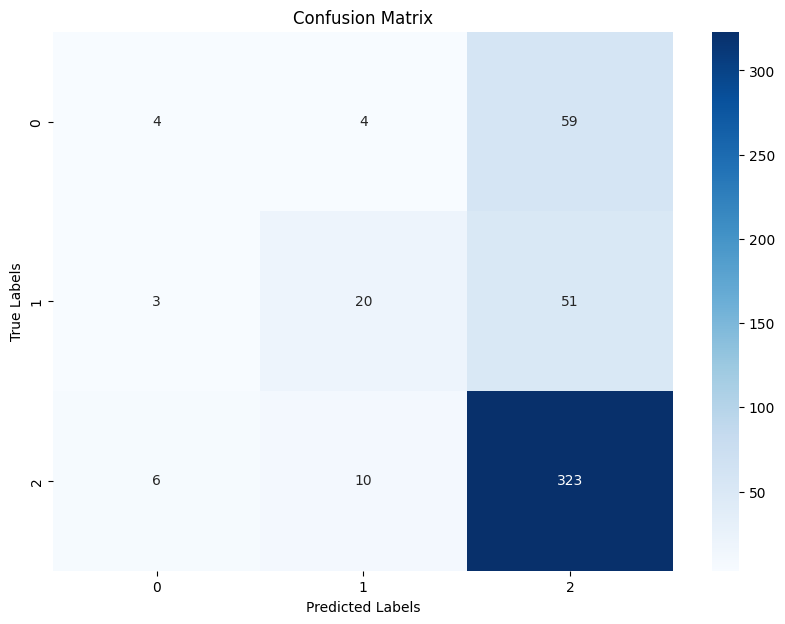

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

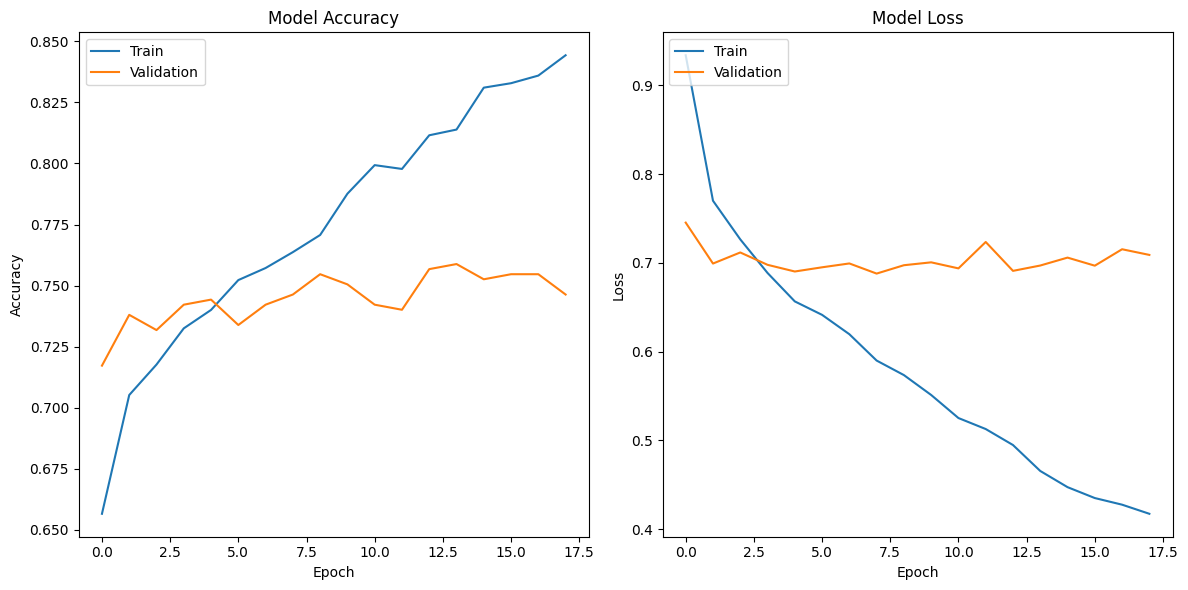

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('xception_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Xception Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 31s 198ms/step - accuracy: 0.5159 - loss: 4.3289 - val_accuracy: 0.6798 - val_loss: 1.1304 - learning_rate: 1.0000e-04
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 18s 145ms/step - accuracy: 0.5888 - loss: 1.8794 - val_accuracy: 0.6923 - val_loss: 1.0285 - learning_rate: 1.0000e-04
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.6045 - loss: 1.4196 - val_accuracy: 0.6923 - val_loss: 0.9177 - learning_rate: 1.0000e-04
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 140ms/step - accuracy: 0.6534 - loss: 1.0227 - val_accuracy: 0.7089 - val_loss: 0.8686 - learning_rate: 1.0000e-04
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 138ms/step - accuracy: 0.6865 - loss: 0.8618 - val_accuracy: 0.7048 - val_loss: 0.8454 - learning_rate: 1.0000e-04
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 139ms/step - accuracy: 0.6943 - loss: 0.7799 - val_accuracy: 0.7089 - val_loss: 0.8320 - learning_rate: 1.0000e-04
Epoch 7/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 17s 14

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_Xception_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_Xception_19_Sept_2024.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 119ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.03      0.05        67
           1       0.45      0.18      0.25        74
           2       0.73      0.96      0.83       339

    accuracy                           0.71       480
   macro avg       0.50      0.39      0.38       480
weighted avg       0.63      0.71      0.63       480



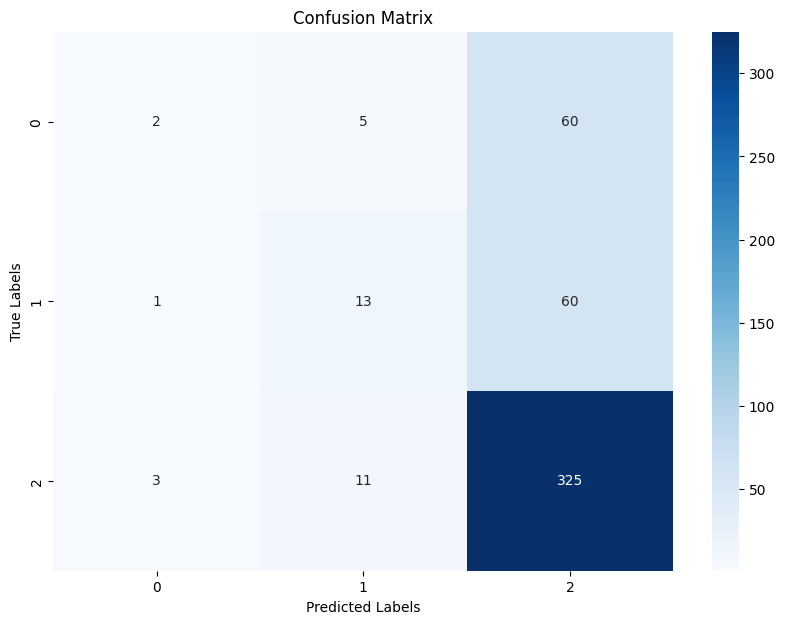

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

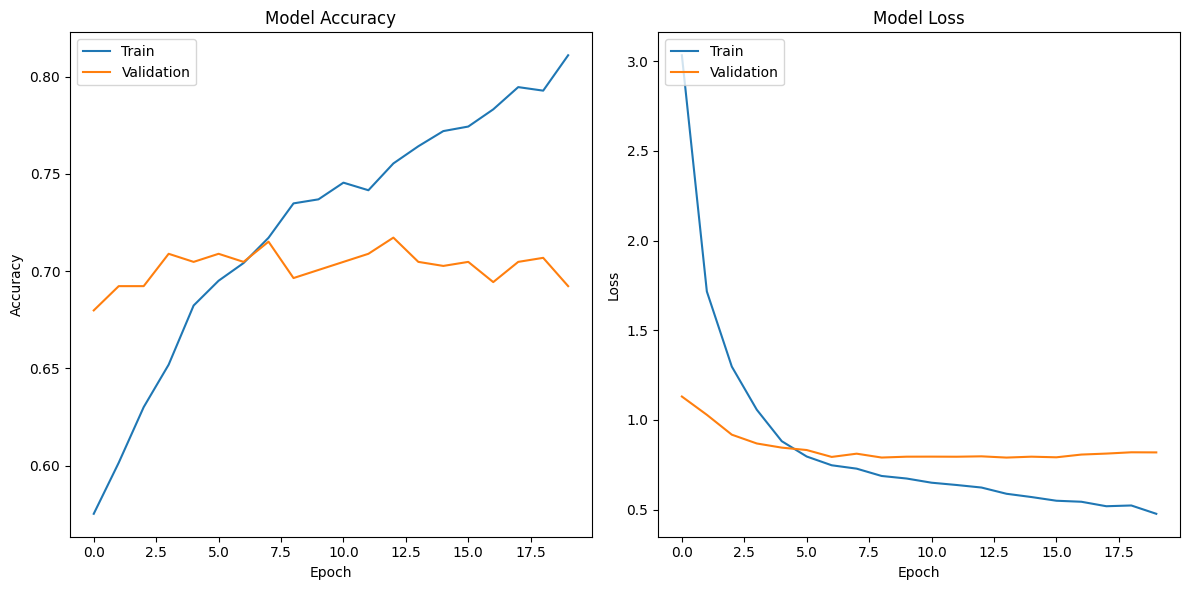

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('inceptionresnetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load InceptionResNetV2
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'InceptionResNetV2 Test accuracy: {test_accuracy:.4f}')


219055592/219055592 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step
Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 76s 391ms/step - accuracy: 0.5475 - loss: 47.8769 - val_accuracy: 0.7048 - val_loss: 14.7362 - learning_rate: 1.0000e-04
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 22s 175ms/step - accuracy: 0.5902 - loss: 7.3098 - val_accuracy: 0.7006 - val_loss: 0.8663 - learning_rate: 1.0000e-04
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 172ms/step - accuracy: 0.6859 - loss: 0.9101 - val_accuracy: 0.7006 - val_loss: 0.8554 - learning_rate: 1.0000e-04
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.6885 - loss: 0.9042 - val_accuracy: 0.7027 - val_loss: 0.8343 - learning_rate: 1.0000e-04
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 168ms/step - accuracy: 0.6954 - loss: 0.8943 - val_accuracy: 0.7027 - val_loss: 0.8477 - learning_rate: 1.0000e-04
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 21s 170ms/step - accuracy: 0.7198 - loss: 0.8517 - val_accuracy: 0.7027 - val_loss: 0.8528 - learning_rate: 1.

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_InceptionResNetV2_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_InceptionResNetV2_20_Sept_2024.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 11s 139ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.00      0.00      0.00        74
           2       0.71      1.00      0.83       339

    accuracy                           0.71       480
   macro avg       0.24      0.33      0.28       480
weighted avg       0.50      0.71      0.58       480



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


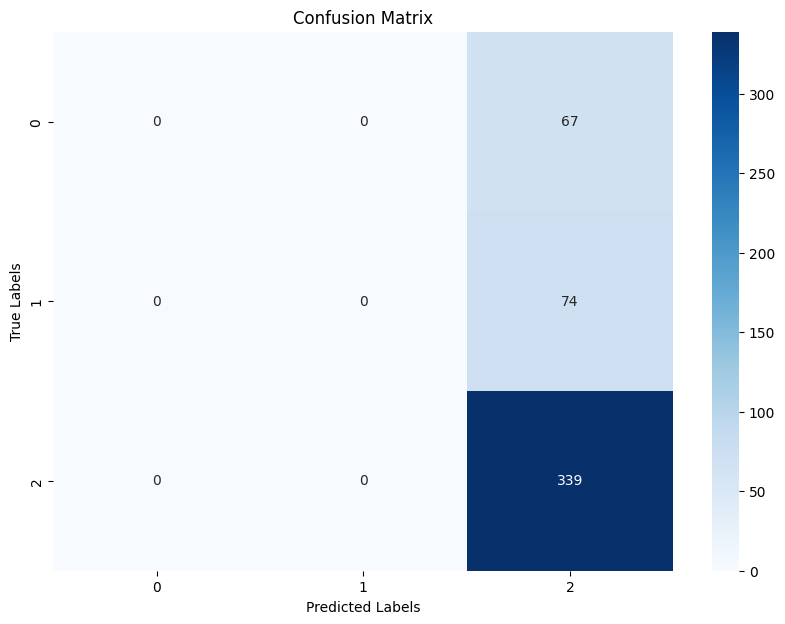

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

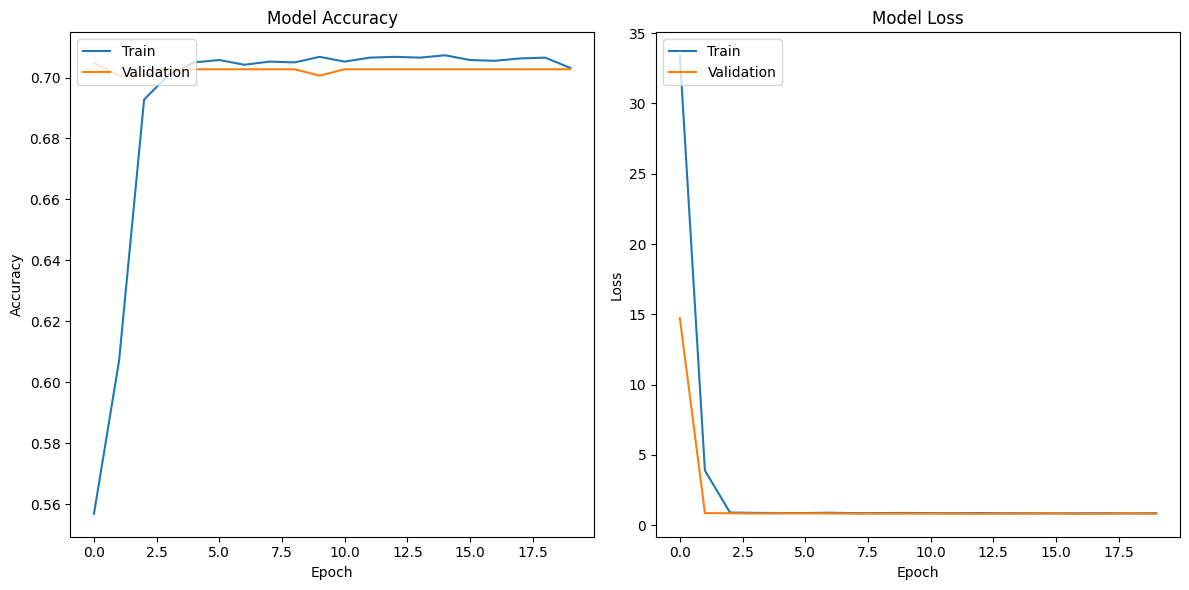

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## NASNetLarge

In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('nasnetlarge_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load NASNetLarge
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'NASNetLarge Test accuracy: {test_accuracy:.4f}')


343610240/343610240 ━━━━━━━━━━━━━━━━━━━━ 15s 0us/step
Epoch 1/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 139s 756ms/step - accuracy: 0.5852 - loss: 1.6362 - val_accuracy: 0.7110 - val_loss: 0.9088 - learning_rate: 1.0000e-04
Epoch 2/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 49s 403ms/step - accuracy: 0.6440 - loss: 1.0082 - val_accuracy: 0.7110 - val_loss: 0.8548 - learning_rate: 1.0000e-04
Epoch 3/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 48s 391ms/step - accuracy: 0.6762 - loss: 0.9045 - val_accuracy: 0.7131 - val_loss: 0.8216 - learning_rate: 1.0000e-04
Epoch 4/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 48s 396ms/step - accuracy: 0.7024 - loss: 0.8126 - val_accuracy: 0.7110 - val_loss: 0.7985 - learning_rate: 1.0000e-04
Epoch 5/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 47s 388ms/step - accuracy: 0.7033 - loss: 0.7736 - val_accuracy: 0.7131 - val_loss: 0.8019 - learning_rate: 1.0000e-04
Epoch 6/20
121/121 ━━━━━━━━━━━━━━━━━━━━ 48s 394ms/step - accuracy: 0.7183 - loss: 0.7374 - val_accuracy: 0.7152 - val_loss: 0.7946 - learning_rate: 1.

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_NASNetLarge_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_2_NASNetLarge_20_Sept_2024.h5


15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 327ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.04      0.08        67
           1       0.55      0.08      0.14        74
           2       0.72      0.98      0.83       339

    accuracy                           0.71       480
   macro avg       0.53      0.37      0.35       480
weighted avg       0.64      0.71      0.62       480



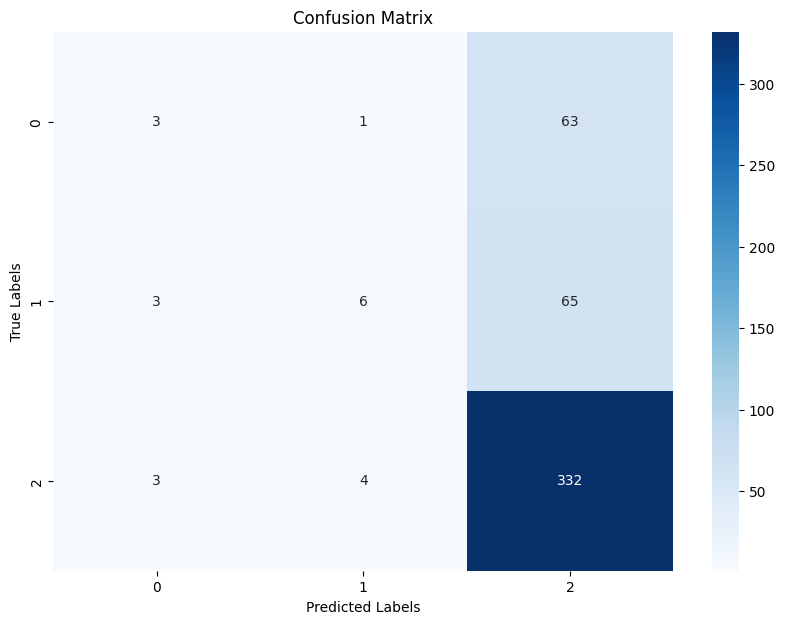

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

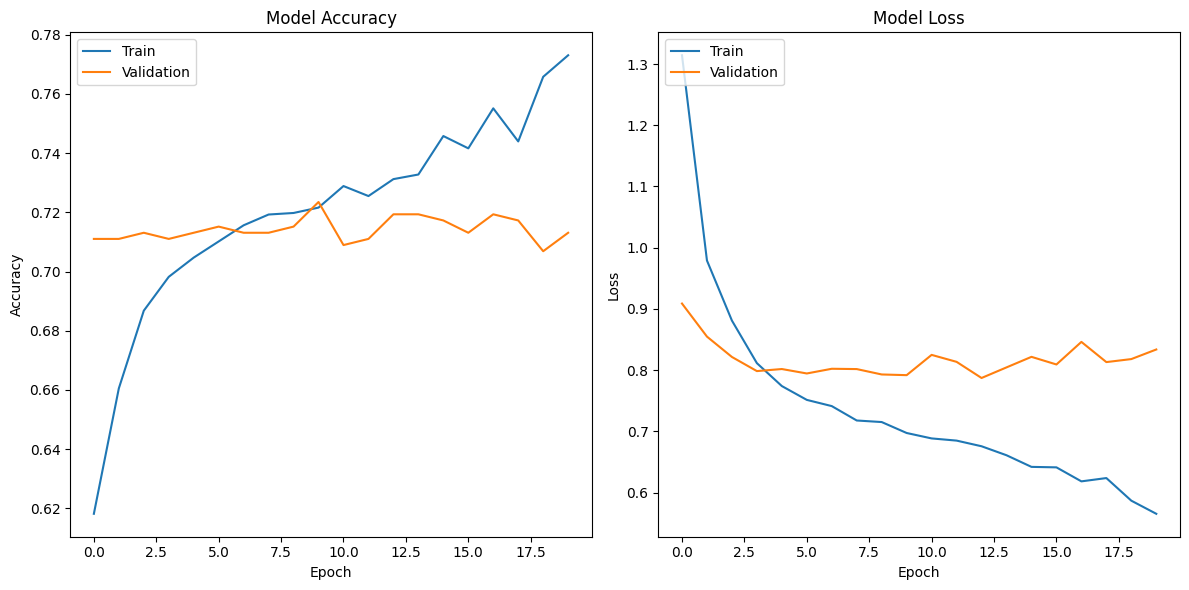

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Skin Tone 3

## Data Loading for Skin Tone 3

In [ ]:
import pandas as pd
import os
from zipfile import ZipFile

# Define file paths
zip_file_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/all_images_preprocessed_V1_RAW.zip'
unzip_dir = '/content/all_images_preprocessed'
metadata_csv_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/image_metadata_preprocessed_V1_RAW.csv'

# Unzip the images folder (run only if not already unzipped)
if not os.path.exists(unzip_dir):
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)
    print(f"Images unzipped to {unzip_dir}")

# Load the metadata DataFrame
df_all_images = pd.read_csv(metadata_csv_path)
# keep only skin tone 3 type
df_all_images = df_all_images[df_all_images['fitzpatrick_scale'] == 3]

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train']
df_test = df_all_images[df_all_images['set'] == 'test']

# Function to load images dynamically based on class label
def get_class_data(df, class_label):
    if class_label in df['three_partition_label'].values:
        class_data = df[df['three_partition_label'] == class_label]
        X = class_data['resized_image_path'].values
        y = class_data['three_partition_label'].values
        return X, y
    else:
        print(f"Class '{class_label}' not found in DataFrame.")
        return None, None

# Example: Load image paths and labels for 'malignant' class from train set
X_train_malignant, y_train_malignant = get_class_data(df_train, 'malignant')

# Example: Load image paths and labels for 'non-neoplastic' class from test set
X_test_non_neoplastic, y_test_non_neoplastic = get_class_data(df_test, 'non-neoplastic')

# Display counts
print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Verify the loaded data
print(df_test.head())
df_train.head()

Train set class distribution:
three_partition_label
non-neoplastic    1901
benign             380
malignant          365
Name: count, dtype: int64

Test set class distribution:
three_partition_label
non-neoplastic    476
benign             95
malignant          91
Name: count, dtype: int64
                                      resized_image_path  \
12820  /content/all_images_preprocessed/59b12b97e7455...   
12825  /content/all_images_preprocessed/6eb241282698d...   
12829  /content/all_images_preprocessed/65acbd594665d...   
12833  /content/all_images_preprocessed/18e4cb2dff099...   
12836  /content/all_images_preprocessed/4396518fbe687...   

      three_partition_label  fitzpatrick_scale   set  
12820        non-neoplastic                  3  test  
12825             malignant                  3  test  
12829        non-neoplastic                  3  test  
12833        non-neoplastic                  3  test  
12836        non-neoplastic                  3  test  


resized_image_path three_partition_label  \
2   /content/all_images_preprocessed/d4113dc42a2d7...        non-neoplastic   
3   /content/all_images_preprocessed/507263a5f78fa...             malignant   
7   /content/all_images_preprocessed/87e7d8db77002...        non-neoplastic   
10  /content/all_images_preprocessed/7d0afc8f76c35...        non-neoplastic   
17  /content/all_images_preprocessed/0371958ce6c34...        non-neoplastic   

    fitzpatrick_scale    set  
2                   3  train  
3                   3  train  
7                   3  train  
10                  3  train  
17                  3  train

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_all_images['three_partition_label'] = label_encoder.fit_transform(df_all_images['three_partition_label'])

# Print the class mapping
print("Class mapping:")
for index, class_label in enumerate(label_encoder.classes_):
    print(f"{index}: {class_label}")

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train'].copy()
df_test = df_all_images[df_all_images['set'] == 'test'].copy()

print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Convert labels to string type for `class_mode='sparse'`
df_train['three_partition_label'] = df_train['three_partition_label'].astype(str)
df_test['three_partition_label'] = df_test['three_partition_label'].astype(str)

# Split df_train into training and validation sets
df_test, df_val = train_test_split(df_test, test_size=0.50, stratify=df_test['three_partition_label'], random_state=42)

# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Class mapping:
0: benign
1: malignant
2: non-neoplastic
Train set class distribution:
three_partition_label
2    1901
0     380
1     365
Name: count, dtype: int64

Test set class distribution:
three_partition_label
2    476
0     95
1     91
Name: count, dtype: int64
Found 2646 validated image filenames belonging to 3 classes.
Found 331 validated image filenames belonging to 3 classes.
Found 331 validated image filenames belonging to 3 classes.


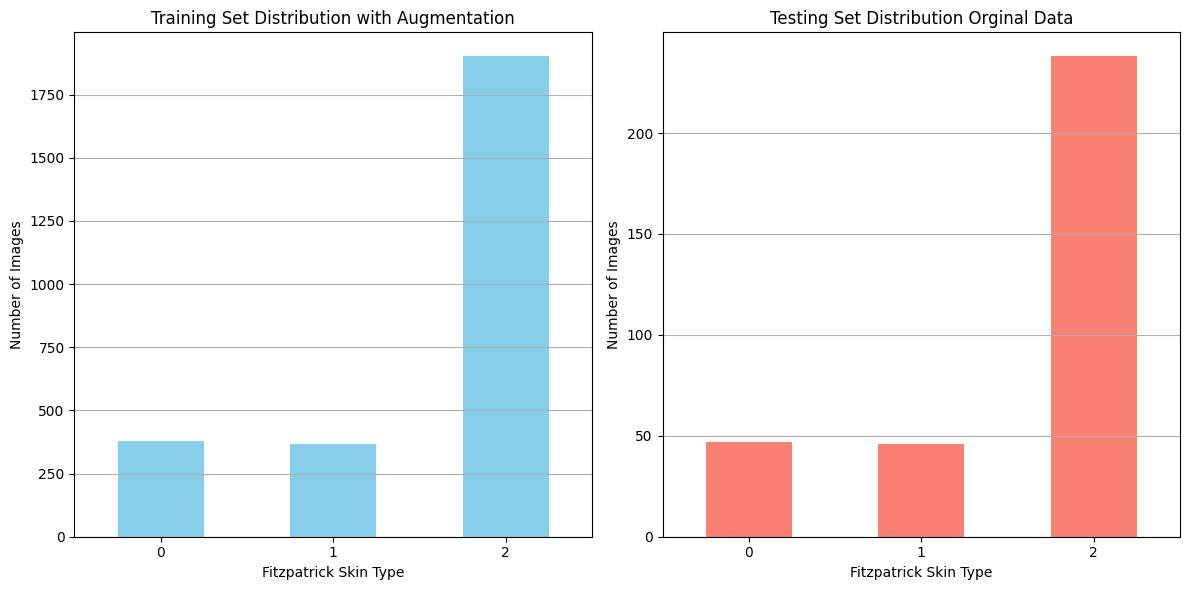

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

train_skin_type_counts = df_train['three_partition_label'].value_counts().sort_index()
test_skin_type_counts = df_test['three_partition_label'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_skin_type_counts.plot(kind='bar', color='skyblue')
plt.title('Training Set Distribution with Augmentation')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(train_skin_type_counts.index)), labels=train_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
test_skin_type_counts.plot(kind='bar', color='salmon')
plt.title('Testing Set Distribution Orginal Data')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(test_skin_type_counts.index)), labels=test_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


## EfficientNetB0

In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load the EfficientNetB0 model with ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
x = BatchNormalization()(x)  # Batch normalization for stability
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to train only the custom layers
for layer in base_model.layers:
    layer.trainable = False

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Compile and fit the model with class weights
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


83/83 ━━━━━━━━━━━━━━━━━━━━ 50s 343ms/step - accuracy: 0.4126 - loss: 1.6955 - val_accuracy: 0.5589 - val_loss: 0.9861 - learning_rate: 1.0000e-04
Epoch 2/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.5178 - loss: 1.2376 - val_accuracy: 0.6586 - val_loss: 0.8702 - learning_rate: 1.0000e-04
Epoch 3/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 52ms/step - accuracy: 0.6189 - loss: 1.0191 - val_accuracy: 0.6767 - val_loss: 0.8153 - learning_rate: 1.0000e-04
Epoch 4/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.6813 - loss: 0.7967 - val_accuracy: 0.6586 - val_loss: 0.8149 - learning_rate: 1.0000e-04
Epoch 5/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step - accuracy: 0.7335 - loss: 0.6301 - val_accuracy: 0.6888 - val_loss: 0.7683 - learning_rate: 1.0000e-04
Epoch 6/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 55ms/step - accuracy: 0.7458 - loss: 0.6131 - val_accuracy: 0.7100 - val_loss: 0.7723 - learning_rate: 1.0000e-04
Epoch 7/20
83/83 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.7976 - loss: 0

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_EfficientNetB0_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_EfficientNetB0_20_Sept_2024.h5


11/11 ━━━━━━━━━━━━━━━━━━━━ 12s 607ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.40      0.43        47
           1       0.47      0.63      0.54        46
           2       0.86      0.82      0.84       238

    accuracy                           0.74       331
   macro avg       0.59      0.62      0.60       331
weighted avg       0.75      0.74      0.74       331



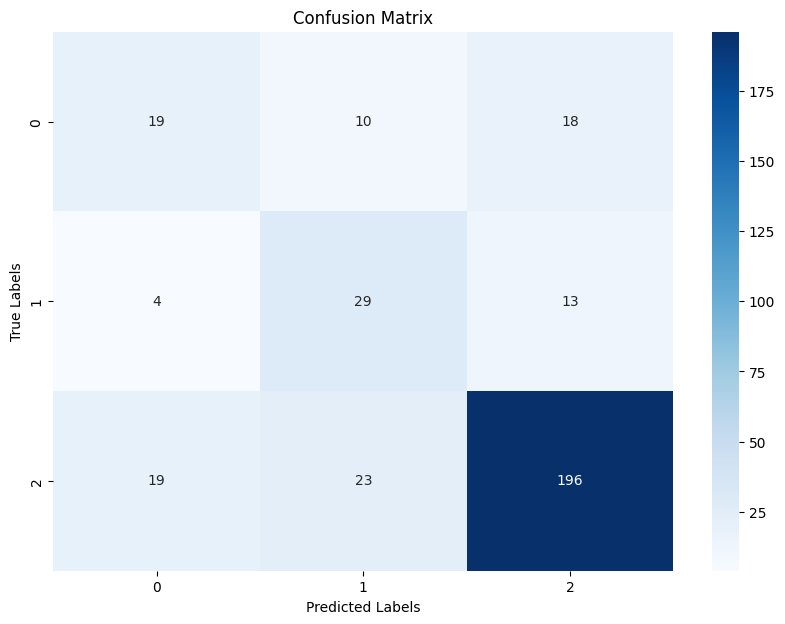

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

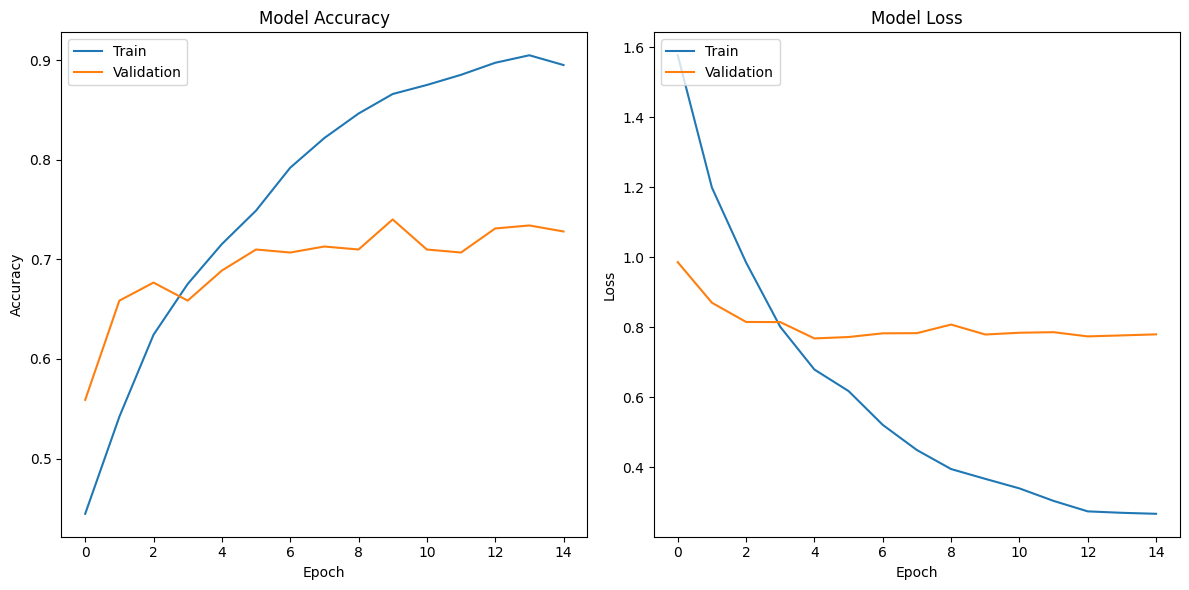

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


80134624/80134624 [==============================] - 3s 0us/step
Epoch 1/25
83/83 [==============================] - 31s 249ms/step - loss: 8.2930 - accuracy: 0.4165 - val_loss: 7.9290 - val_accuracy: 0.3927 - lr: 1.0000e-04
Epoch 2/25
83/83 [==============================] - 13s 158ms/step - loss: 7.5672 - accuracy: 0.5106 - val_loss: 7.1599 - val_accuracy: 0.5952 - lr: 1.0000e-04
Epoch 3/25
83/83 [==============================] - 13s 160ms/step - loss: 7.0063 - accuracy: 0.5956 - val_loss: 6.6399 - val_accuracy: 0.6707 - lr: 1.0000e-04
Epoch 4/25
83/83 [==============================] - 13s 161ms/step - loss: 6.5889 - accuracy: 0.6402 - val_loss: 6.3116 - val_accuracy: 0.7009 - lr: 1.0000e-04
Epoch 5/25
83/83 [==============================] - 13s 161ms/step - loss: 6.1927 - accuracy: 0.6795 - val_loss: 5.9725 - val_accuracy: 0.7492 - lr: 1.0000e-04
Epoch 6/25
83/83 [==============================] - 13s 162ms/step - loss: 5.8512 - accuracy: 0.7105 - val_loss: 5.7614 - val_accuracy:

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_VGG19_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_VGG19_20_Sept_2024.h5


11/11 [==============================] - 2s 156ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.38      0.48        47
           1       0.58      0.54      0.56        46
           2       0.83      0.91      0.87       238

    accuracy                           0.78       331
   macro avg       0.69      0.61      0.64       331
weighted avg       0.77      0.78      0.77       331



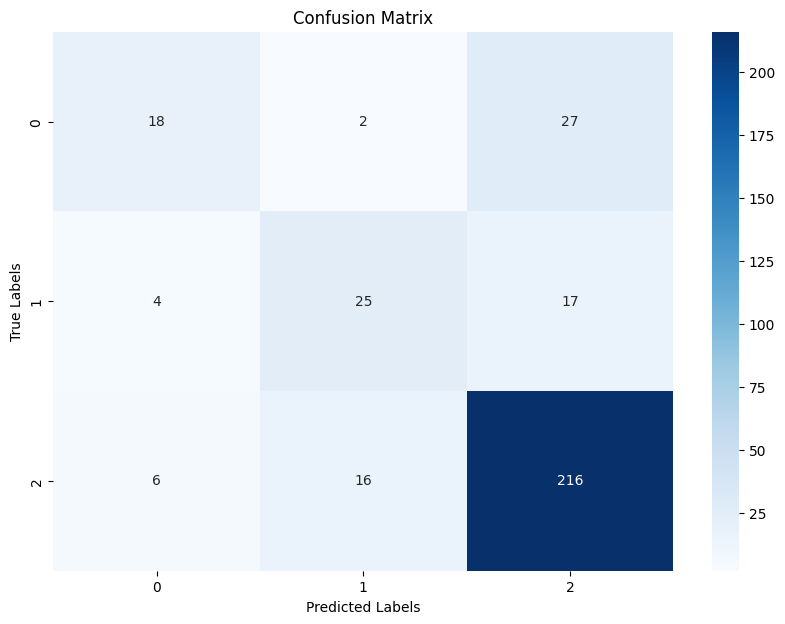

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

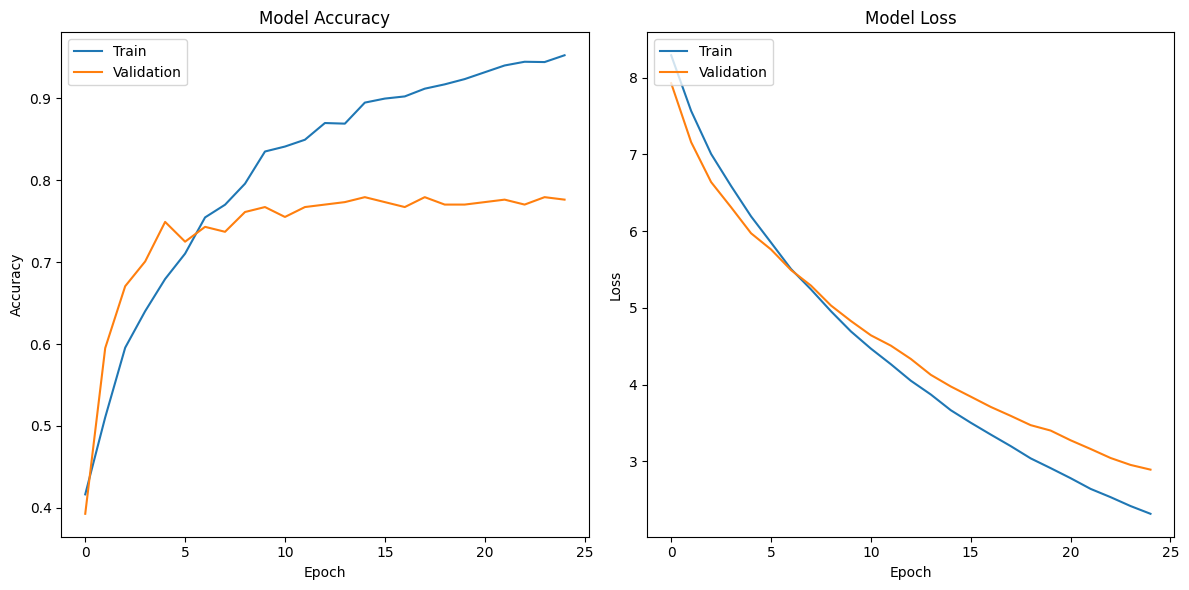

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load a pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


94765736/94765736 [==============================] - 3s 0us/step
Epoch 1/25
83/83 [==============================] - 19s 164ms/step - loss: 0.8879 - accuracy: 0.6841 - val_loss: 0.7206 - val_accuracy: 0.6918 - lr: 1.0000e-04
Epoch 2/25
83/83 [==============================] - 10s 119ms/step - loss: 0.6853 - accuracy: 0.7441 - val_loss: 0.6872 - val_accuracy: 0.7372 - lr: 1.0000e-04
Epoch 3/25
83/83 [==============================] - 10s 119ms/step - loss: 0.5699 - accuracy: 0.7797 - val_loss: 0.6605 - val_accuracy: 0.7523 - lr: 1.0000e-04
Epoch 4/25
83/83 [==============================] - 10s 118ms/step - loss: 0.5010 - accuracy: 0.7982 - val_loss: 0.6430 - val_accuracy: 0.7613 - lr: 1.0000e-04
Epoch 5/25
83/83 [==============================] - 10s 118ms/step - loss: 0.4393 - accuracy: 0.8277 - val_loss: 0.6206 - val_accuracy: 0.7674 - lr: 1.0000e-04
Epoch 6/25
83/83 [==============================] - 10s 115ms/step - loss: 0.3875 - accuracy: 0.8519 - val_loss: 0.6207 - val_accuracy:

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_ResNet50_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_ResNet50_19_Sept_2024.h5


11/11 [==============================] - 2s 103ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.30      0.40        47
           1       0.57      0.52      0.55        46
           2       0.82      0.92      0.87       238

    accuracy                           0.77       331
   macro avg       0.67      0.58      0.60       331
weighted avg       0.76      0.77      0.75       331



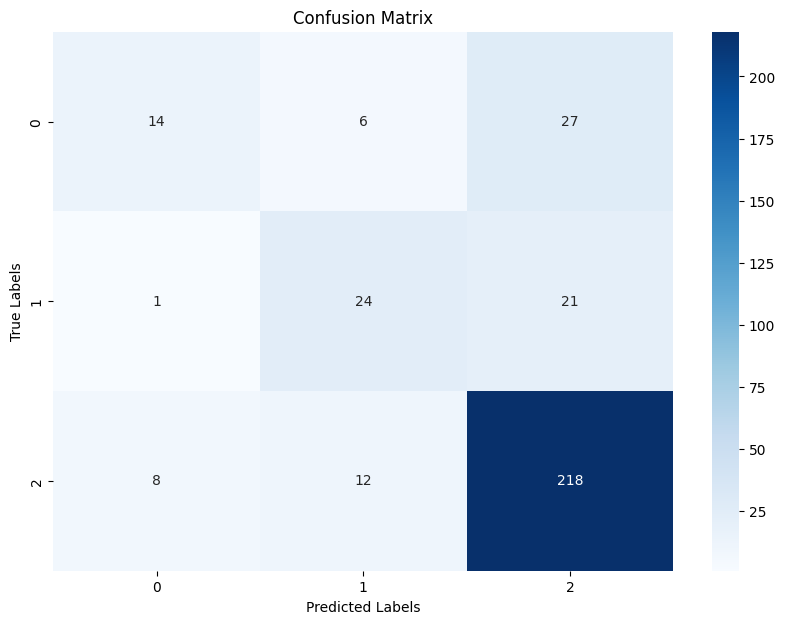

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

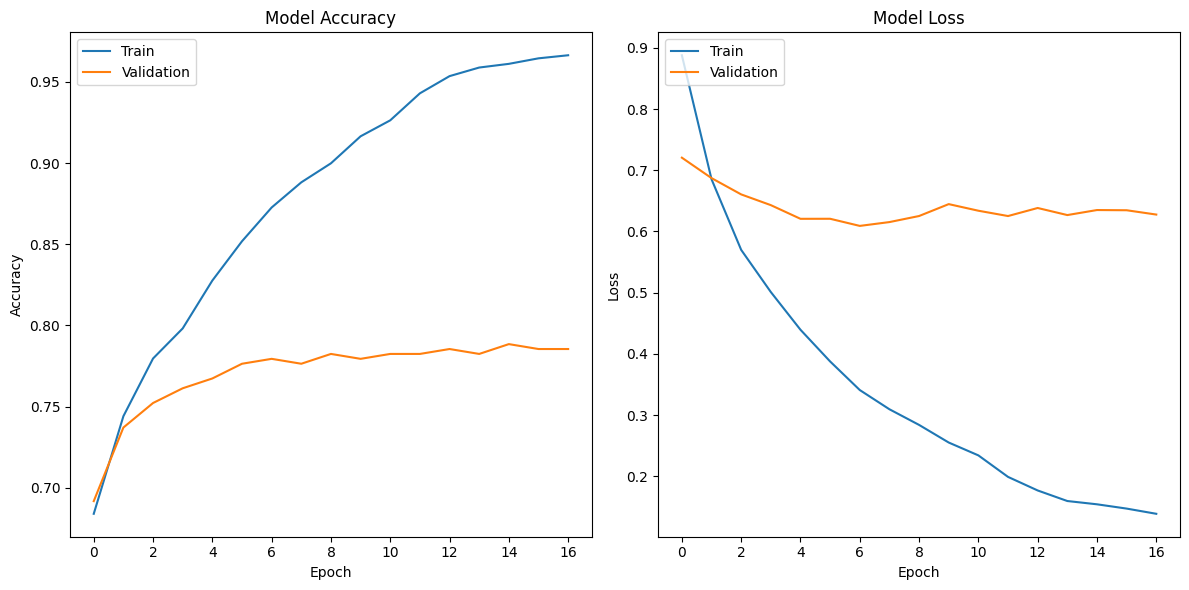

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('densenet201_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'DenseNet201 Test accuracy: {test_accuracy:.4f}')


74836368/74836368 [==============================] - 2s 0us/step
Epoch 1/25
83/83 [==============================] - 45s 340ms/step - loss: 2.2231 - accuracy: 0.6047 - val_loss: 1.2159 - val_accuracy: 0.7009 - lr: 1.0000e-04
Epoch 2/25
83/83 [==============================] - 14s 167ms/step - loss: 1.4612 - accuracy: 0.6126 - val_loss: 0.9508 - val_accuracy: 0.6798 - lr: 1.0000e-04
Epoch 3/25
83/83 [==============================] - 14s 166ms/step - loss: 1.1068 - accuracy: 0.6538 - val_loss: 0.8689 - val_accuracy: 0.7130 - lr: 1.0000e-04
Epoch 4/25
83/83 [==============================] - 14s 164ms/step - loss: 0.9478 - accuracy: 0.6738 - val_loss: 0.8232 - val_accuracy: 0.6979 - lr: 1.0000e-04
Epoch 5/25
83/83 [==============================] - 14s 165ms/step - loss: 0.8390 - accuracy: 0.6848 - val_loss: 0.8125 - val_accuracy: 0.7100 - lr: 1.0000e-04
Epoch 6/25
83/83 [==============================] - 14s 162ms/step - loss: 0.7787 - accuracy: 0.7098 - val_loss: 0.8179 - val_accuracy:

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_DenseNet201_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_DenseNet201_19_Sept_2024.h5


11/11 [==============================] - 4s 143ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.06      0.10        47
           1       0.45      0.20      0.27        46
           2       0.73      0.91      0.81       238

    accuracy                           0.69       331
   macro avg       0.46      0.39      0.39       331
weighted avg       0.62      0.69      0.63       331



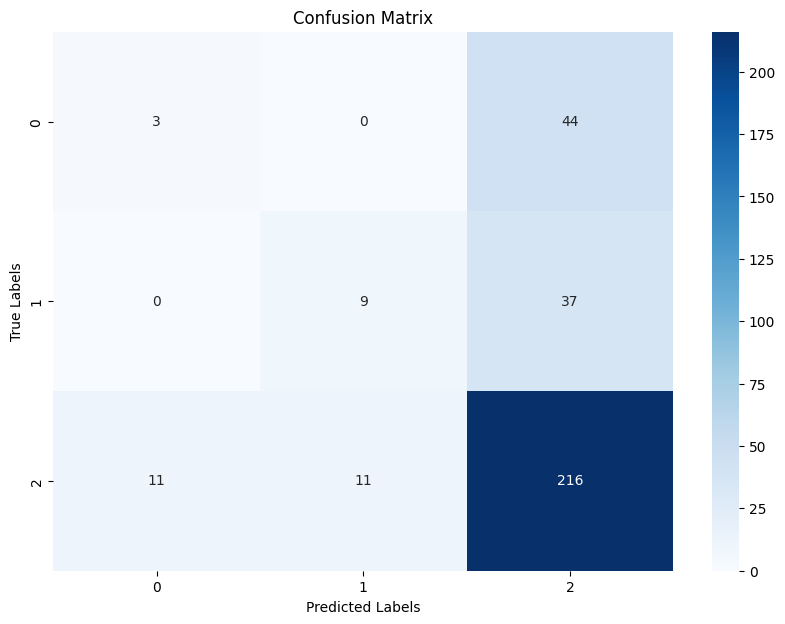

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

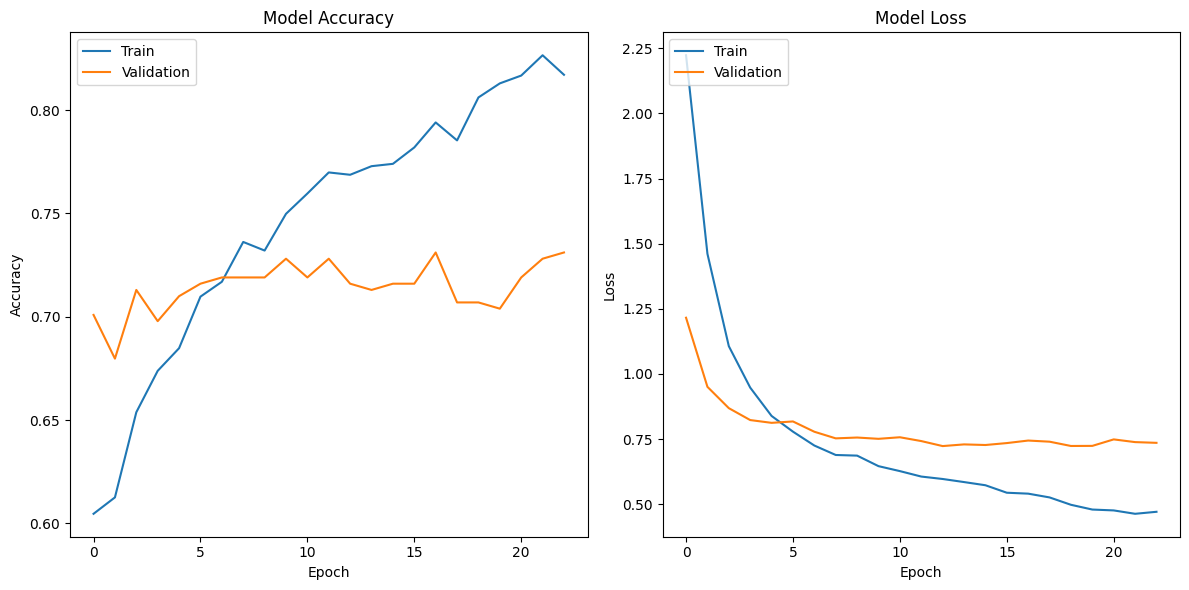

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('mobilenetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    # class_weight=custom_class_weights,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'MobileNetV2 Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
83/83 [==============================] - 9s 78ms/step - loss: 0.9389 - accuracy: 0.6682 - val_loss: 0.7567 - val_accuracy: 0.7341 - lr: 1.0000e-04
Epoch 2/20
83/83 [==============================] - 6s 73ms/step - loss: 0.7710 - accuracy: 0.7113 - val_loss: 0.7299 - val_accuracy: 0.7100 - lr: 1.0000e-04
Epoch 3/20
83/83 [==============================] - 5s 65ms/step - loss: 0.7079 - accuracy: 0.7264 - val_loss: 0.7019 - val_accuracy: 0.7402 - lr: 1.0000e-04
Epoch 4/20
83/83 [==============================] - 6s 69ms/step - loss: 0.6623 - accuracy: 0.7494 - val_loss: 0.7012 - val_accuracy: 0.7492 - lr: 1.0000e-04
Epoch 5/20
83/83 [==============================] - 6s 77ms/step - loss: 0.6248 - accuracy: 0.7566 - val_loss: 0.6984 - val_accuracy: 0.7402 - lr: 1.0000e-04
Epoch 6/20
83/83 [==============================] - 6s 67ms/step - loss: 0.6045 - accuracy: 0.7725 - val_loss: 0.7089 - val_accuracy: 0.7462 - lr: 1.0000e-04
Epoch 7/20
83/83 [==============================] - 

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_MobileNetV2_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_MobileNetV2_19_Sept_2024.h5


11/11 [==============================] - 1s 54ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.06      0.10        47
           1       0.57      0.35      0.43        46
           2       0.76      0.94      0.84       238

    accuracy                           0.73       331
   macro avg       0.54      0.45      0.46       331
weighted avg       0.67      0.73      0.68       331



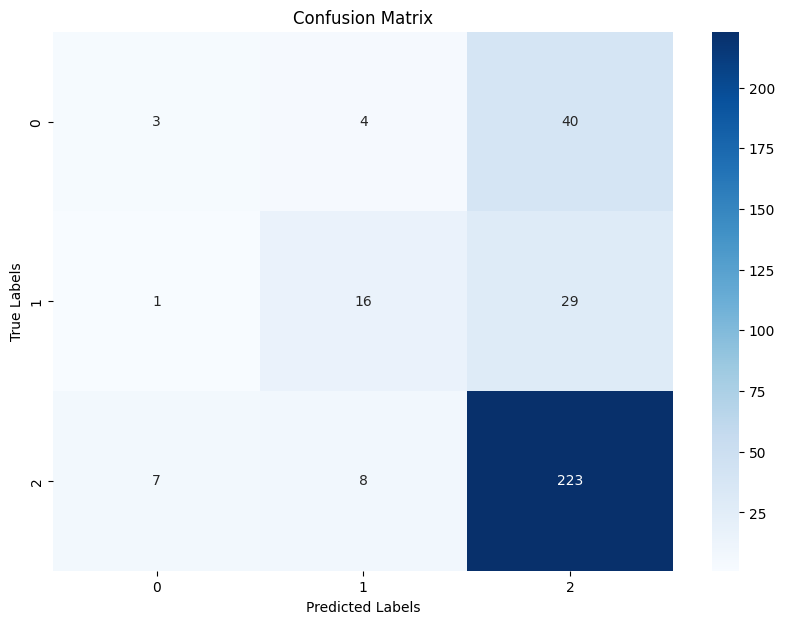

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

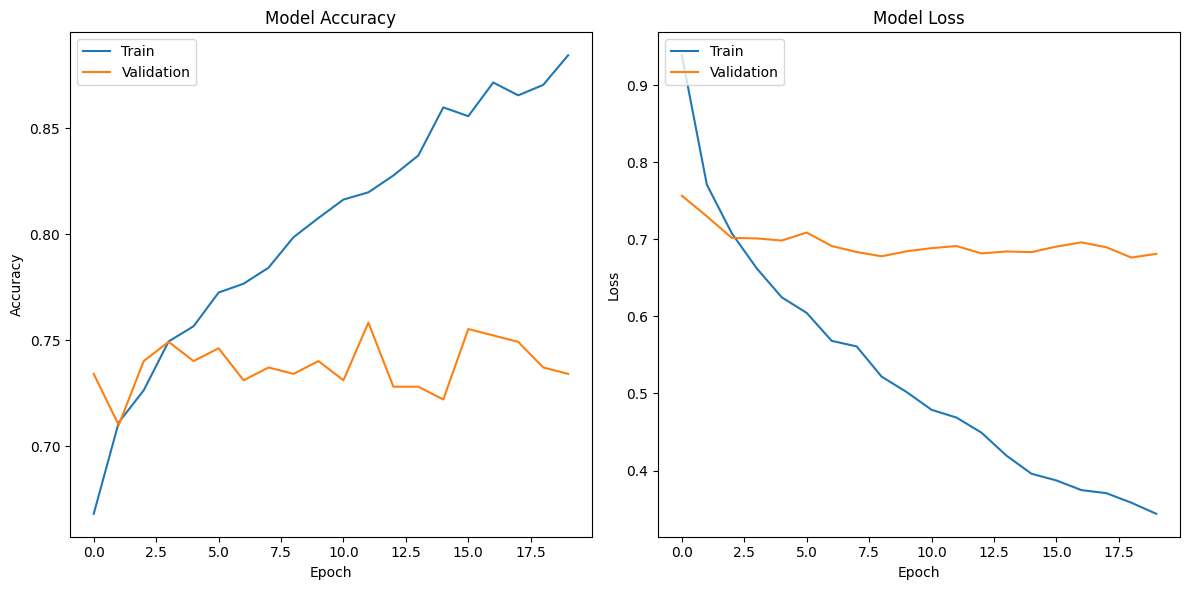

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('xception_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Xception Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
83/83 [==============================] - 15s 148ms/step - loss: 2.2967 - accuracy: 0.6039 - val_loss: 1.4464 - val_accuracy: 0.7160 - lr: 1.0000e-04
Epoch 2/20
83/83 [==============================] - 11s 137ms/step - loss: 1.6912 - accuracy: 0.6156 - val_loss: 1.1738 - val_accuracy: 0.6707 - lr: 1.0000e-04
Epoch 3/20
83/83 [==============================] - 12s 138ms/step - loss: 1.3583 - accuracy: 0.6421 - val_loss: 0.9849 - val_accuracy: 0.6888 - lr: 1.0000e-04
Epoch 4/20
83/83 [==============================] - 11s 137ms/step - loss: 1.0779 - accuracy: 0.6716 - val_loss: 1.0538 - val_accuracy: 0.7069 - lr: 1.0000e-04
Epoch 5/20
83/83 [==============================] - 12s 139ms/step - loss: 0.9274 - accuracy: 0.6977 - val_loss: 0.9486 - val_accuracy: 0.7009 - lr: 1.0000e-04
Epoch 6/20
83/83 [==============================] - 12s 139ms/step - loss: 0.8166 - accuracy: 0.7094 - val_loss: 0.8490 - val_accuracy: 0.7009 - lr: 1.0000e-04
Epoch 7/20
83/83 [======================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_Xception_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_Xception_19_Sept_2024.h5


11/11 [==============================] - 2s 130ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.13      0.20        47
           1       0.36      0.09      0.14        46
           2       0.74      0.95      0.83       238

    accuracy                           0.72       331
   macro avg       0.53      0.39      0.39       331
weighted avg       0.65      0.72      0.65       331



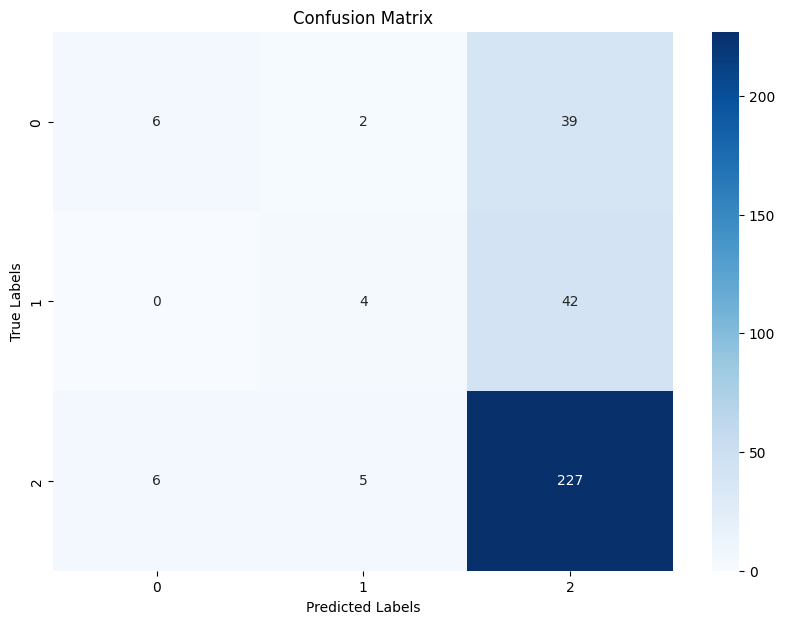

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

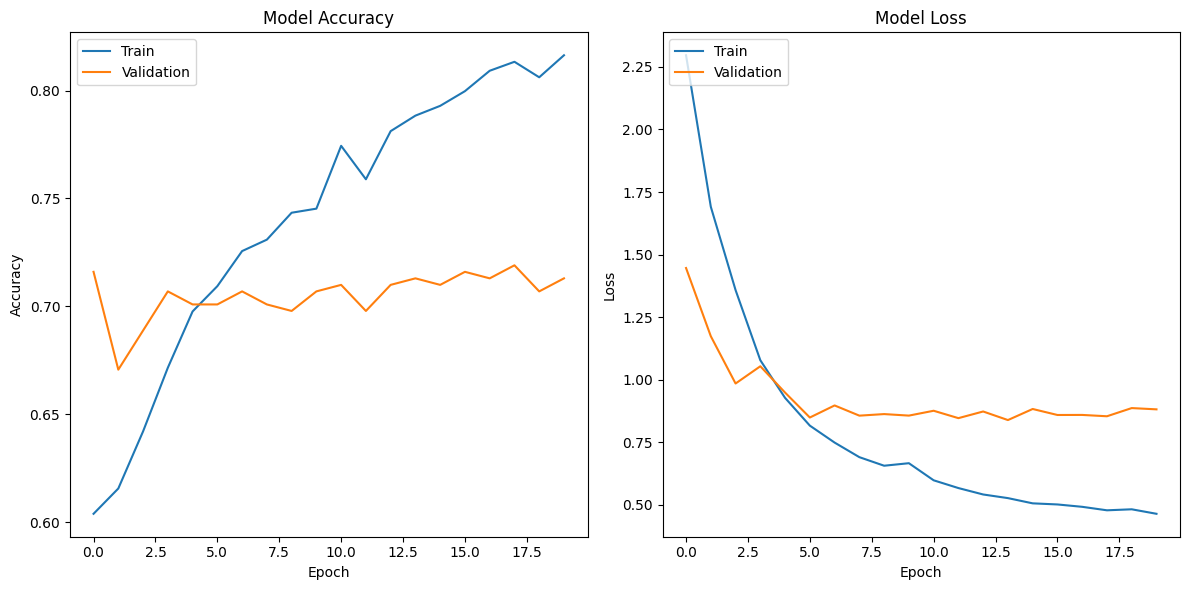

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('inceptionresnetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load InceptionResNetV2
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'InceptionResNetV2 Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
83/83 [==============================] - 28s 226ms/step - loss: 56.9816 - accuracy: 0.5831 - val_loss: 18.7255 - val_accuracy: 0.7190 - lr: 1.0000e-04
Epoch 2/20
83/83 [==============================] - 15s 186ms/step - loss: 14.2589 - accuracy: 0.5794 - val_loss: 4.1026 - val_accuracy: 0.6949 - lr: 1.0000e-04
Epoch 3/20
83/83 [==============================] - 16s 187ms/step - loss: 1.7714 - accuracy: 0.6391 - val_loss: 0.8418 - val_accuracy: 0.7190 - lr: 1.0000e-04
Epoch 4/20
83/83 [==============================] - 16s 188ms/step - loss: 0.8781 - accuracy: 0.7067 - val_loss: 0.8380 - val_accuracy: 0.7130 - lr: 1.0000e-04
Epoch 5/20
83/83 [==============================] - 16s 188ms/step - loss: 0.8663 - accuracy: 0.7011 - val_loss: 0.8367 - val_accuracy: 0.7190 - lr: 1.0000e-04
Epoch 6/20
83/83 [==============================] - 16s 189ms/step - loss: 0.8697 - accuracy: 0.7060 - val_loss: 0.8199 - val_accuracy: 0.7160 - lr: 1.0000e-04
Epoch 7/20
83/83 [===================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_InceptionResNetV2_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_InceptionResNetV2_20_Sept_2024.h5


11/11 [==============================] - 5s 159ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        47
           1       0.00      0.00      0.00        46
           2       0.72      1.00      0.84       238

    accuracy                           0.72       331
   macro avg       0.24      0.33      0.28       331
weighted avg       0.52      0.72      0.60       331



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


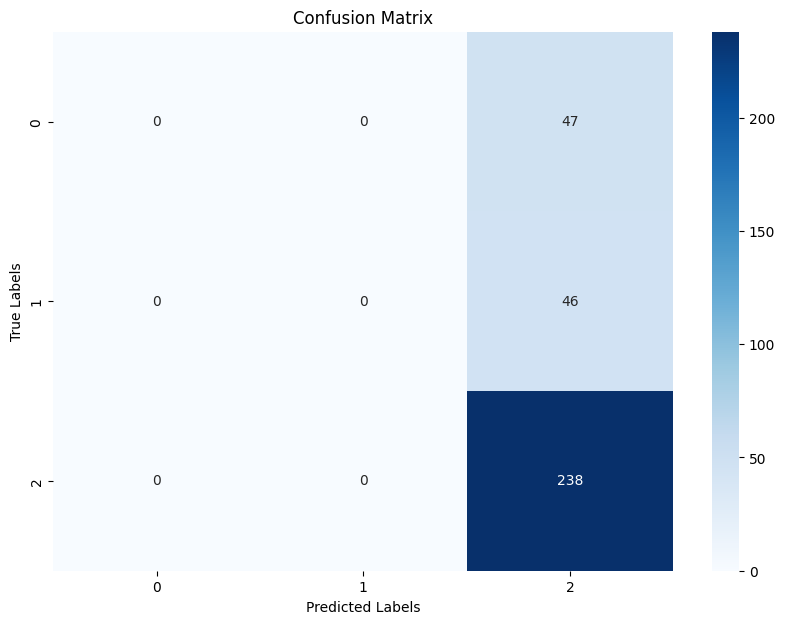

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

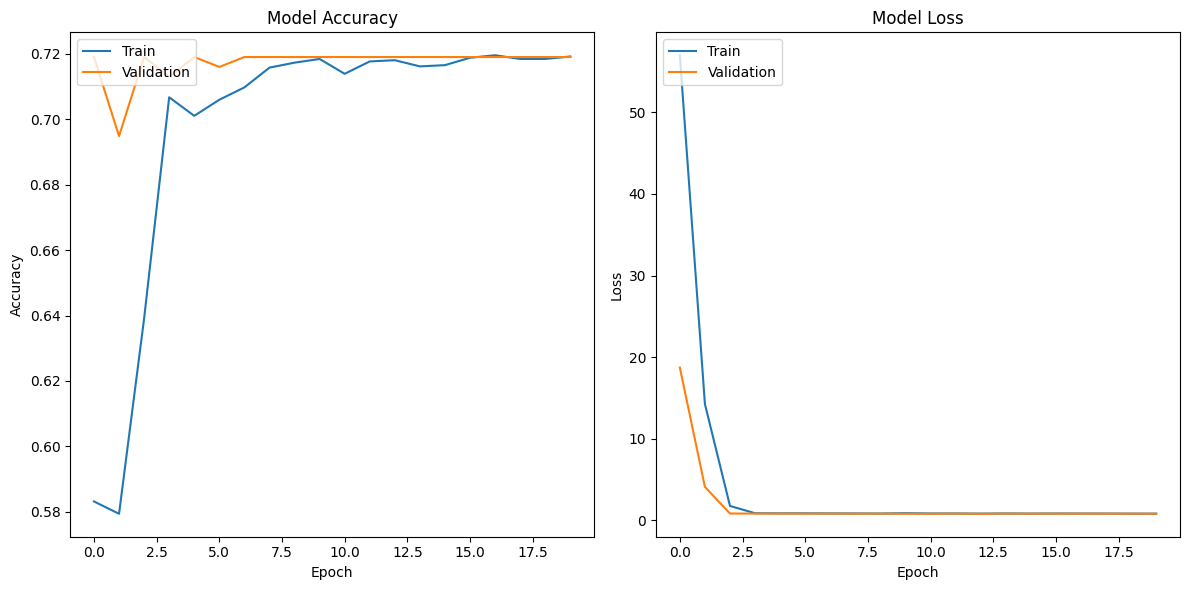

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## NASNetLarge

In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('nasnetlarge_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load NASNetLarge
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'NASNetLarge Test accuracy: {test_accuracy:.4f}')


343610240/343610240 [==============================] - 9s 0us/step
Epoch 1/20
83/83 [==============================] - 62s 524ms/step - loss: 1.2737 - accuracy: 0.6198 - val_loss: 0.8853 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 2/20
83/83 [==============================] - 34s 409ms/step - loss: 0.9612 - accuracy: 0.6772 - val_loss: 0.8109 - val_accuracy: 0.7311 - lr: 1.0000e-04
Epoch 3/20
83/83 [==============================] - 34s 415ms/step - loss: 0.8765 - accuracy: 0.6931 - val_loss: 0.7884 - val_accuracy: 0.7251 - lr: 1.0000e-04
Epoch 4/20
83/83 [==============================] - 34s 411ms/step - loss: 0.7973 - accuracy: 0.7147 - val_loss: 0.7528 - val_accuracy: 0.7281 - lr: 1.0000e-04
Epoch 5/20
83/83 [==============================] - 34s 408ms/step - loss: 0.7653 - accuracy: 0.7139 - val_loss: 0.7767 - val_accuracy: 0.7341 - lr: 1.0000e-04
Epoch 6/20
83/83 [==============================] - 34s 413ms/step - loss: 0.7570 - accuracy: 0.7181 - val_loss: 0.7448 - val_accurac

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_NASNetLarge_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_3_NASNetLarge_20_Sept_2024.h5


11/11 [==============================] - 9s 340ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        47
           1       0.67      0.13      0.22        46
           2       0.74      0.99      0.84       238

    accuracy                           0.73       331
   macro avg       0.80      0.38      0.37       331
weighted avg       0.76      0.73      0.64       331



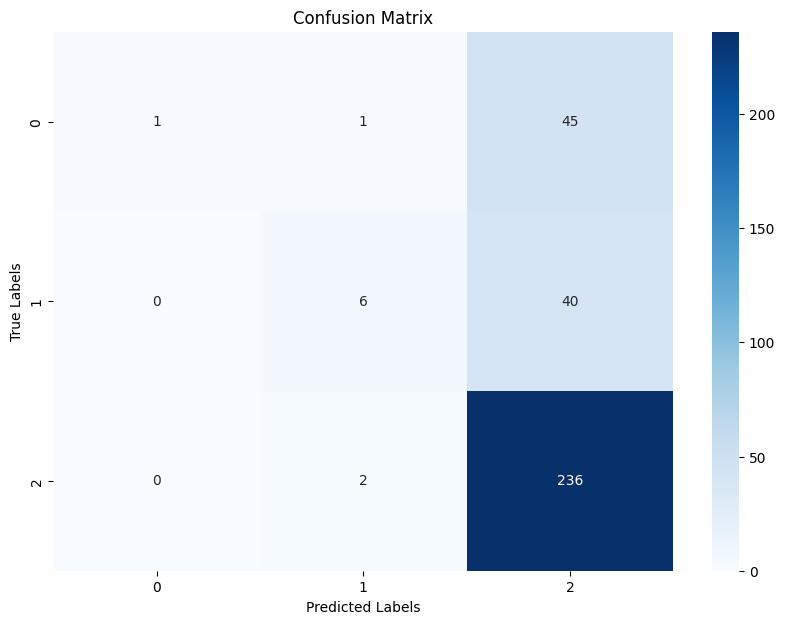

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

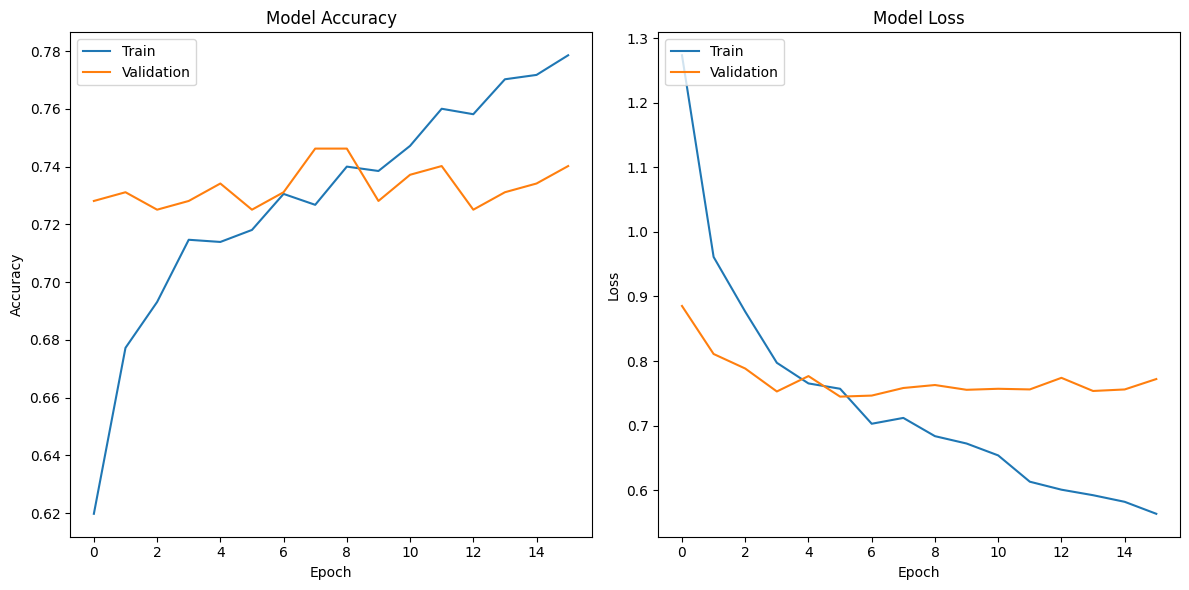

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Skin Tone 4

## Data Loading for Skin Tone 4

In [ ]:
import pandas as pd
import os
from zipfile import ZipFile

# Define file paths
zip_file_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/all_images_preprocessed_V1_RAW.zip'
unzip_dir = '/content/all_images_preprocessed'
metadata_csv_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/image_metadata_preprocessed_V1_RAW.csv'

# Unzip the images folder (run only if not already unzipped)
if not os.path.exists(unzip_dir):
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)
    print(f"Images unzipped to {unzip_dir}")

# Load the metadata DataFrame
df_all_images = pd.read_csv(metadata_csv_path)
# keep only skin tone 1 type
df_all_images = df_all_images[df_all_images['fitzpatrick_scale'] == 4]

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train']
df_test = df_all_images[df_all_images['set'] == 'test']

# Function to load images dynamically based on class label
def get_class_data(df, class_label):
    if class_label in df['three_partition_label'].values:
        class_data = df[df['three_partition_label'] == class_label]
        X = class_data['resized_image_path'].values
        y = class_data['three_partition_label'].values
        return X, y
    else:
        print(f"Class '{class_label}' not found in DataFrame.")
        return None, None

# Example: Load image paths and labels for 'malignant' class from train set
X_train_malignant, y_train_malignant = get_class_data(df_train, 'malignant')

# Example: Load image paths and labels for 'non-neoplastic' class from test set
X_test_non_neoplastic, y_test_non_neoplastic = get_class_data(df_test, 'non-neoplastic')

# Display counts
print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Verify the loaded data
print(df_test.head())
df_train.head()

Train set class distribution:
three_partition_label
non-neoplastic    1690
benign             294
malignant          241
Name: count, dtype: int64

Test set class distribution:
three_partition_label
non-neoplastic    423
benign             73
malignant          60
Name: count, dtype: int64
                                      resized_image_path  \
12810  /content/all_images_preprocessed/08ce17e5ebbb2...   
12812  /content/all_images_preprocessed/9b186201dcd25...   
12814  /content/all_images_preprocessed/87bbc9153dd4d...   
12821  /content/all_images_preprocessed/c6121b050183d...   
12826  /content/all_images_preprocessed/5e1b32a02ad22...   

      three_partition_label  fitzpatrick_scale   set  
12810        non-neoplastic                  4  test  
12812        non-neoplastic                  4  test  
12814        non-neoplastic                  4  test  
12821        non-neoplastic                  4  test  
12826                benign                  4  test  


resized_image_path three_partition_label  \
5   /content/all_images_preprocessed/b935d5f370685...                benign   
6   /content/all_images_preprocessed/5f1ed6de6a911...        non-neoplastic   
9   /content/all_images_preprocessed/1f1a012c14a62...        non-neoplastic   
14  /content/all_images_preprocessed/782675bb15b8b...        non-neoplastic   
24  /content/all_images_preprocessed/c7aac9b9850c5...             malignant   

    fitzpatrick_scale    set  
5                   4  train  
6                   4  train  
9                   4  train  
14                  4  train  
24                  4  train

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_all_images['three_partition_label'] = label_encoder.fit_transform(df_all_images['three_partition_label'])

# Print the class mapping
print("Class mapping:")
for index, class_label in enumerate(label_encoder.classes_):
    print(f"{index}: {class_label}")

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train'].copy()
df_test = df_all_images[df_all_images['set'] == 'test'].copy()

print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Convert labels to string type for `class_mode='sparse'`
df_train['three_partition_label'] = df_train['three_partition_label'].astype(str)
df_test['three_partition_label'] = df_test['three_partition_label'].astype(str)

# Split df_train into training and validation sets
df_test, df_val = train_test_split(df_test, test_size=0.50, stratify=df_test['three_partition_label'], random_state=42)

# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Class mapping:
0: benign
1: malignant
2: non-neoplastic
Train set class distribution:
three_partition_label
2    1690
0     294
1     241
Name: count, dtype: int64

Test set class distribution:
three_partition_label
2    423
0     73
1     60
Name: count, dtype: int64
Found 2225 validated image filenames belonging to 3 classes.
Found 278 validated image filenames belonging to 3 classes.
Found 278 validated image filenames belonging to 3 classes.


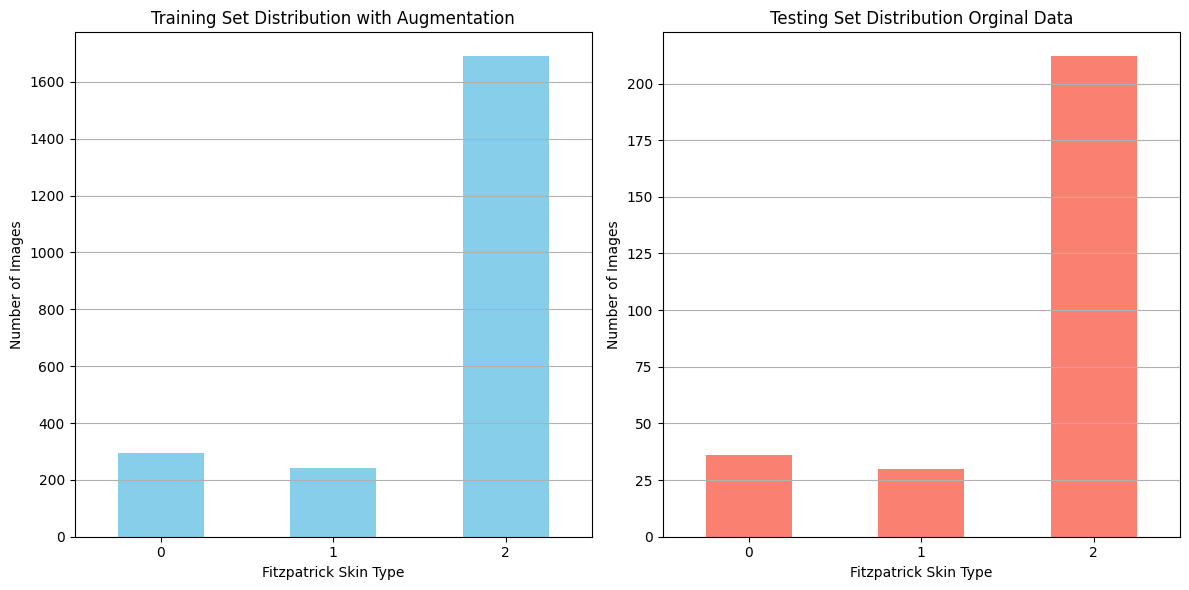

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

train_skin_type_counts = df_train['three_partition_label'].value_counts().sort_index()
test_skin_type_counts = df_test['three_partition_label'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_skin_type_counts.plot(kind='bar', color='skyblue')
plt.title('Training Set Distribution with Augmentation')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(train_skin_type_counts.index)), labels=train_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
test_skin_type_counts.plot(kind='bar', color='salmon')
plt.title('Testing Set Distribution Orginal Data')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(test_skin_type_counts.index)), labels=test_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


## EfficientNetB0




In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load the EfficientNetB0 model with ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
x = BatchNormalization()(x)  # Batch normalization for stability
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to train only the custom layers
for layer in base_model.layers:
    layer.trainable = False

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Compile and fit the model with class weights
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


16705208/16705208 [==============================] - 1s 0us/step
Epoch 1/20
70/70 [==============================] - 16s 117ms/step - loss: 1.6582 - accuracy: 0.4049 - val_loss: 0.8674 - val_accuracy: 0.6655 - lr: 1.0000e-04
Epoch 2/20
70/70 [==============================] - 5s 74ms/step - loss: 1.3084 - accuracy: 0.5020 - val_loss: 0.7973 - val_accuracy: 0.7050 - lr: 1.0000e-04
Epoch 3/20
70/70 [==============================] - 5s 77ms/step - loss: 1.1350 - accuracy: 0.5582 - val_loss: 0.7480 - val_accuracy: 0.7230 - lr: 1.0000e-04
Epoch 4/20
70/70 [==============================] - 5s 72ms/step - loss: 0.9706 - accuracy: 0.6211 - val_loss: 0.6912 - val_accuracy: 0.7446 - lr: 1.0000e-04
Epoch 5/20
70/70 [==============================] - 5s 70ms/step - loss: 0.8017 - accuracy: 0.6742 - val_loss: 0.6851 - val_accuracy: 0.7482 - lr: 1.0000e-04
Epoch 6/20
70/70 [==============================] - 5s 73ms/step - loss: 0.7138 - accuracy: 0.7204 - val_loss: 0.6755 - val_accuracy: 0.7518 - 

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_EfficientNetB0_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_EfficientNetB0_20_Sept_2024.h5


9/9 [==============================] - 2s 61ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.61      0.39      0.47        36
           1       0.50      0.40      0.44        30
           2       0.84      0.92      0.88       212

    accuracy                           0.79       278
   macro avg       0.65      0.57      0.60       278
weighted avg       0.78      0.79      0.78       278



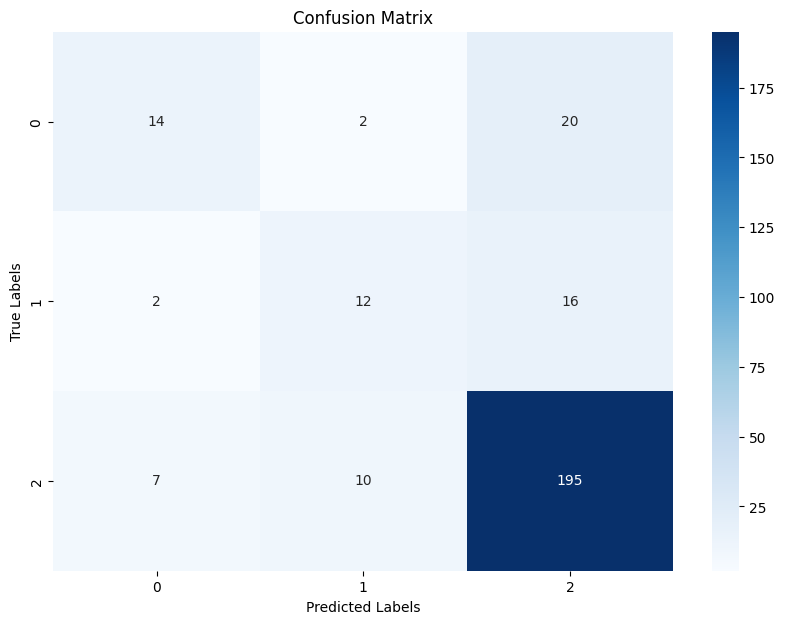

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

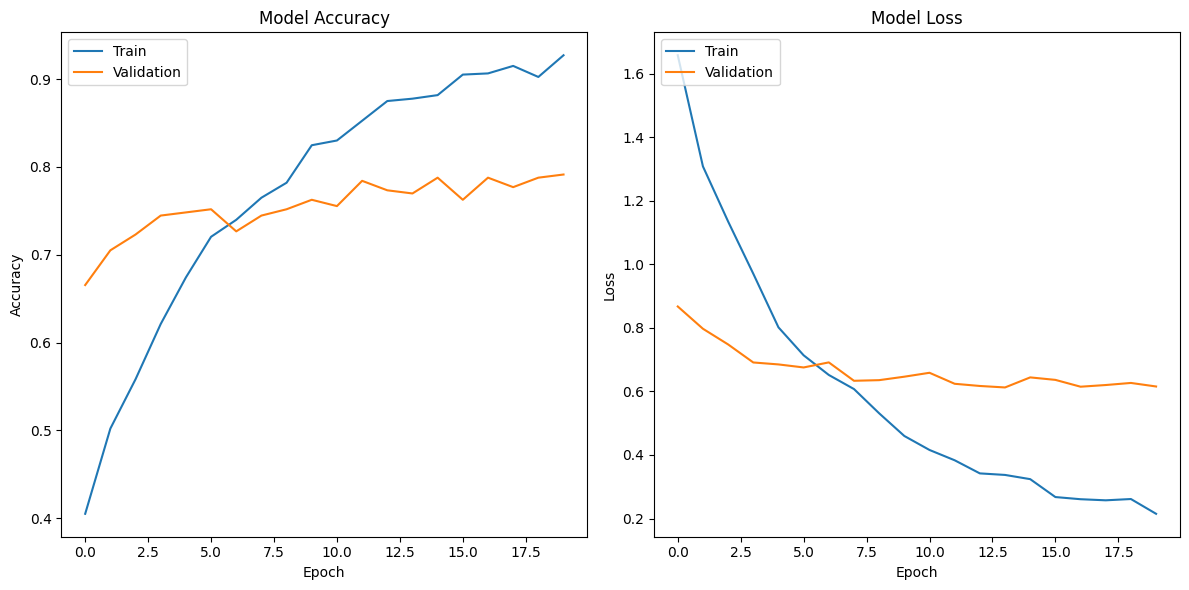

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
70/70 [==============================] - 18s 232ms/step - loss: 8.3153 - accuracy: 0.3942 - val_loss: 7.7225 - val_accuracy: 0.5036 - lr: 1.0000e-04
Epoch 2/25
70/70 [==============================] - 12s 170ms/step - loss: 7.6545 - accuracy: 0.4948 - val_loss: 7.3522 - val_accuracy: 0.5288 - lr: 1.0000e-04
Epoch 3/25
70/70 [==============================] - 12s 172ms/step - loss: 7.1597 - accuracy: 0.5546 - val_loss: 6.8654 - val_accuracy: 0.6151 - lr: 1.0000e-04
Epoch 4/25
70/70 [==============================] - 12s 172ms/step - loss: 6.7963 - accuracy: 0.6085 - val_loss: 6.4742 - val_accuracy: 0.7050 - lr: 1.0000e-04
Epoch 5/25
70/70 [==============================] - 12s 172ms/step - loss: 6.3653 - accuracy: 0.6688 - val_loss: 6.2154 - val_accuracy: 0.7158 - lr: 1.0000e-04
Epoch 6/25
70/70 [==============================] - 12s 173ms/step - loss: 6.0638 - accuracy: 0.6845 - val_loss: 5.9111 - val_accuracy: 0.7482 - lr: 1.0000e-04
Epoch 7/25
70/70 [======================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_VGG19_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_VGG19_20_Sept_2024.h5


9/9 [==============================] - 1s 154ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.33      0.41        36
           1       0.71      0.33      0.45        30
           2       0.84      0.96      0.90       212

    accuracy                           0.81       278
   macro avg       0.69      0.54      0.59       278
weighted avg       0.79      0.81      0.79       278



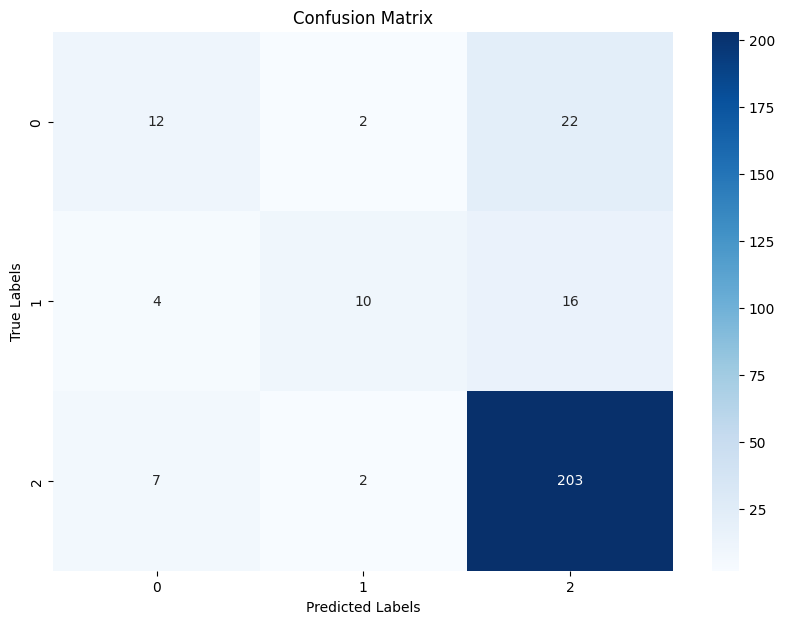

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

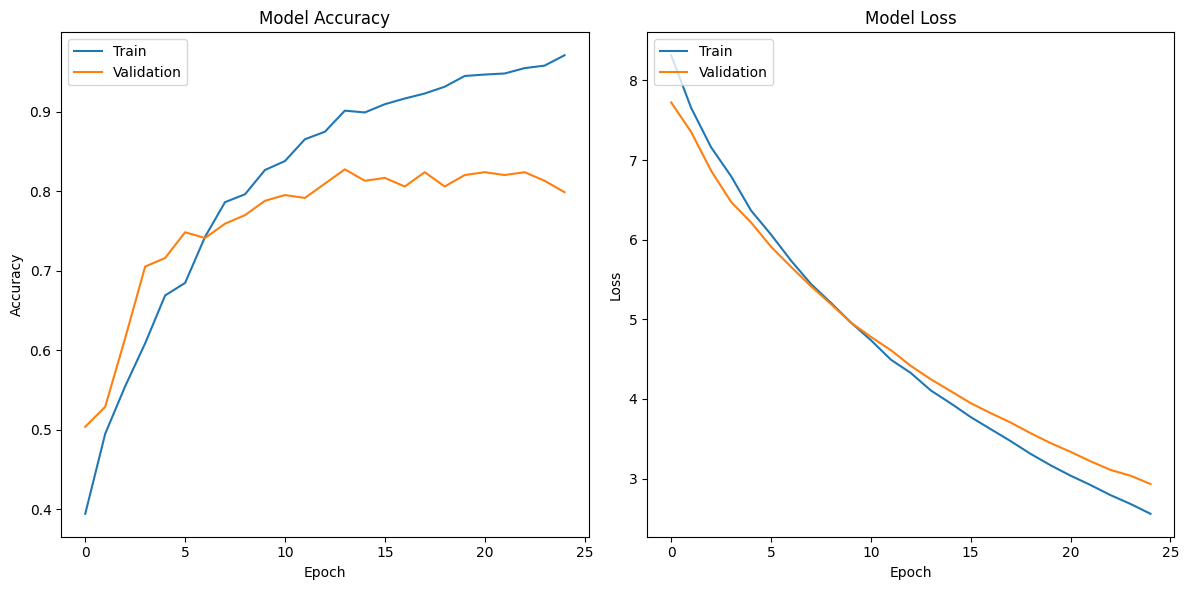

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load a pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
70/70 [==============================] - 14s 157ms/step - loss: 0.8514 - accuracy: 0.7137 - val_loss: 0.5862 - val_accuracy: 0.7626 - lr: 1.0000e-04
Epoch 2/25
70/70 [==============================] - 8s 117ms/step - loss: 0.6224 - accuracy: 0.7789 - val_loss: 0.5228 - val_accuracy: 0.8094 - lr: 1.0000e-04
Epoch 3/25
70/70 [==============================] - 8s 119ms/step - loss: 0.5193 - accuracy: 0.8049 - val_loss: 0.5040 - val_accuracy: 0.8022 - lr: 1.0000e-04
Epoch 4/25
70/70 [==============================] - 8s 119ms/step - loss: 0.4597 - accuracy: 0.8202 - val_loss: 0.4928 - val_accuracy: 0.8022 - lr: 1.0000e-04
Epoch 5/25
70/70 [==============================] - 8s 118ms/step - loss: 0.4040 - accuracy: 0.8422 - val_loss: 0.4856 - val_accuracy: 0.8345 - lr: 1.0000e-04
Epoch 6/25
70/70 [==============================] - 8s 118ms/step - loss: 0.3556 - accuracy: 0.8733 - val_loss: 0.4570 - val_accuracy: 0.8273 - lr: 1.0000e-04
Epoch 7/25
70/70 [===========================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_ResNet50_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_ResNet50_19_Sept_2024.h5


9/9 [==============================] - 2s 104ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.33      0.44        36
           1       0.67      0.33      0.44        30
           2       0.84      0.97      0.90       212

    accuracy                           0.82       278
   macro avg       0.71      0.55      0.59       278
weighted avg       0.80      0.82      0.79       278



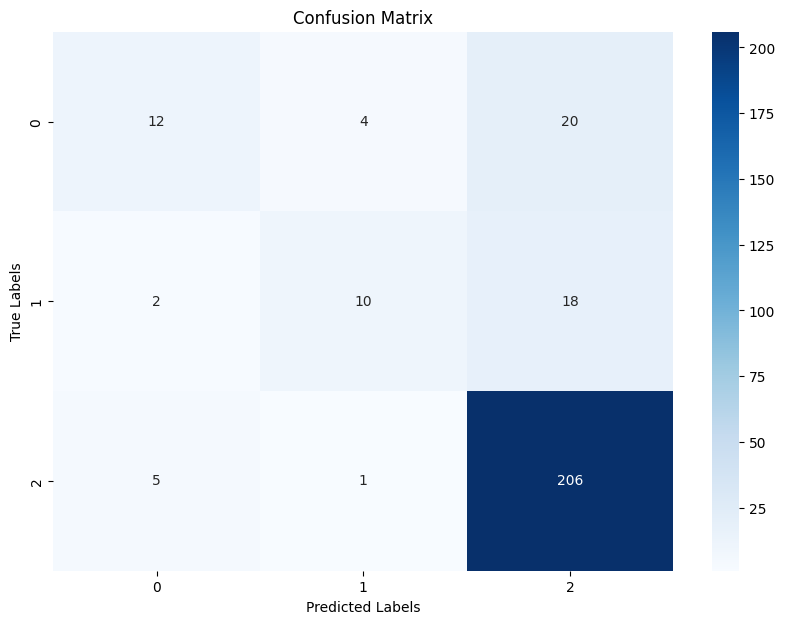

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

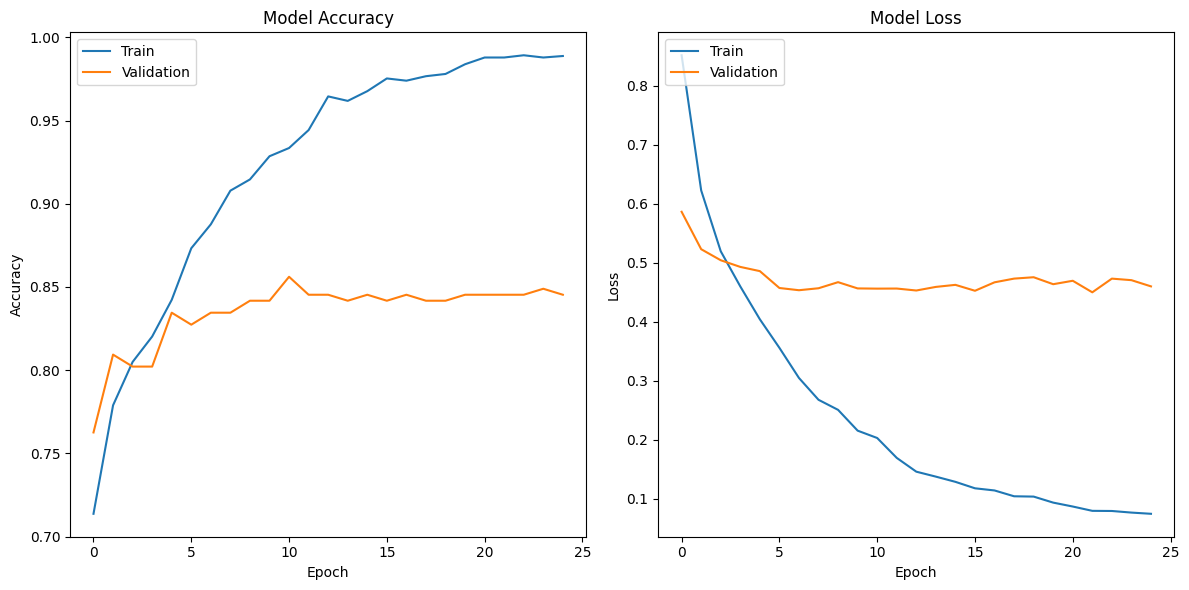

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('densenet201_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'DenseNet201 Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
70/70 [==============================] - 31s 287ms/step - loss: 2.0889 - accuracy: 0.6315 - val_loss: 1.0952 - val_accuracy: 0.7590 - lr: 1.0000e-04
Epoch 2/25
70/70 [==============================] - 12s 166ms/step - loss: 1.5191 - accuracy: 0.6589 - val_loss: 1.0333 - val_accuracy: 0.7590 - lr: 1.0000e-04
Epoch 3/25
70/70 [==============================] - 12s 166ms/step - loss: 1.1454 - accuracy: 0.6840 - val_loss: 0.8122 - val_accuracy: 0.7734 - lr: 1.0000e-04
Epoch 4/25
70/70 [==============================] - 11s 163ms/step - loss: 0.9452 - accuracy: 0.6975 - val_loss: 0.7347 - val_accuracy: 0.7554 - lr: 1.0000e-04
Epoch 5/25
70/70 [==============================] - 11s 163ms/step - loss: 0.8228 - accuracy: 0.7236 - val_loss: 0.7246 - val_accuracy: 0.7734 - lr: 1.0000e-04
Epoch 6/25
70/70 [==============================] - 11s 163ms/step - loss: 0.7280 - accuracy: 0.7375 - val_loss: 0.7129 - val_accuracy: 0.7698 - lr: 1.0000e-04
Epoch 7/25
70/70 [======================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_DenseNet201_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_DenseNet201_19_Sept_2024.h5


9/9 [==============================] - 4s 142ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.14      0.22        36
           1       0.31      0.17      0.22        30
           2       0.80      0.95      0.87       212

    accuracy                           0.76       278
   macro avg       0.54      0.42      0.44       278
weighted avg       0.71      0.76      0.72       278



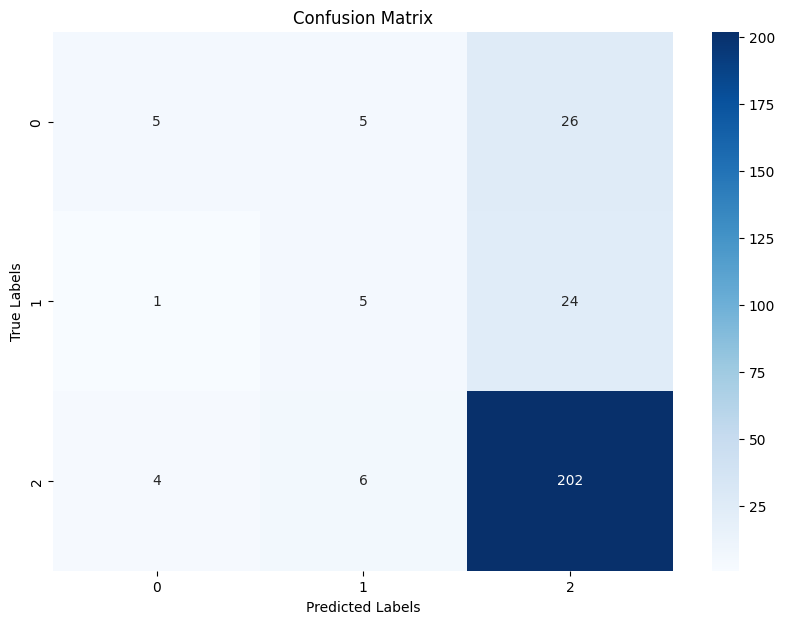

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

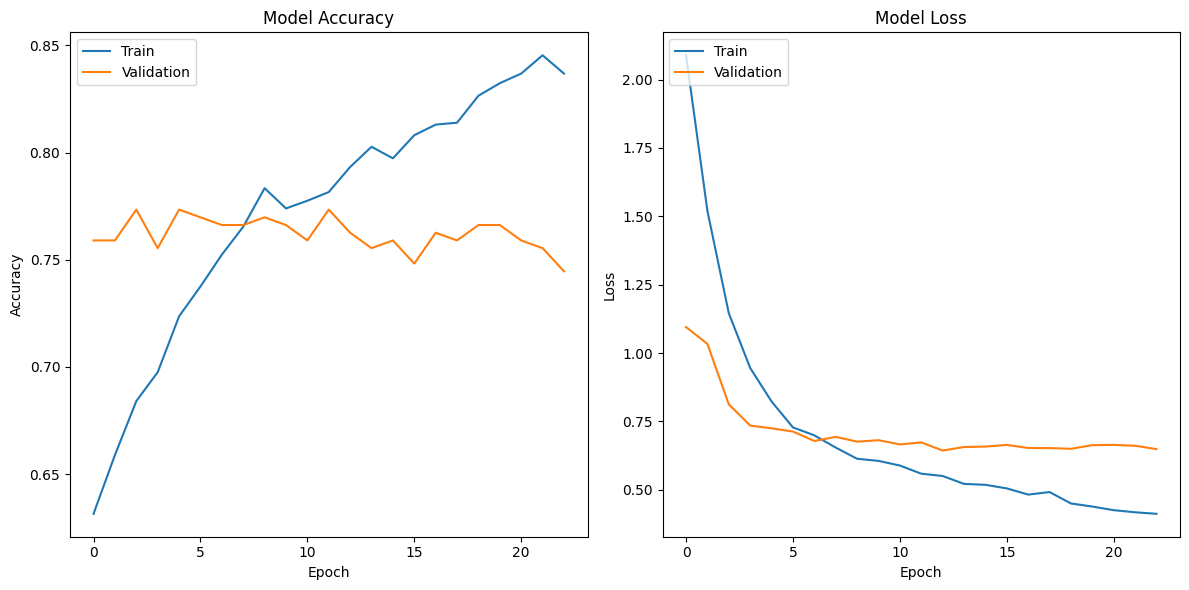

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('mobilenetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    # class_weight=custom_class_weights,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'MobileNetV2 Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
70/70 [==============================] - 10s 96ms/step - loss: 0.9174 - accuracy: 0.6975 - val_loss: 0.7052 - val_accuracy: 0.7626 - lr: 1.0000e-04
Epoch 2/20
70/70 [==============================] - 5s 66ms/step - loss: 0.7265 - accuracy: 0.7411 - val_loss: 0.6509 - val_accuracy: 0.7806 - lr: 1.0000e-04
Epoch 3/20
70/70 [==============================] - 5s 71ms/step - loss: 0.6493 - accuracy: 0.7587 - val_loss: 0.6446 - val_accuracy: 0.7806 - lr: 1.0000e-04
Epoch 4/20
70/70 [==============================] - 5s 67ms/step - loss: 0.6016 - accuracy: 0.7771 - val_loss: 0.6415 - val_accuracy: 0.7842 - lr: 1.0000e-04
Epoch 5/20
70/70 [==============================] - 5s 72ms/step - loss: 0.5760 - accuracy: 0.7829 - val_loss: 0.6388 - val_accuracy: 0.7806 - lr: 1.0000e-04
Epoch 6/20
70/70 [==============================] - 5s 70ms/step - loss: 0.5516 - accuracy: 0.7888 - val_loss: 0.6294 - val_accuracy: 0.7770 - lr: 1.0000e-04
Epoch 7/20
70/70 [==============================] -

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_MobileNetV2_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_MobileNetV2_19_Sept_2024.h5


9/9 [==============================] - 1s 53ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.60      0.08      0.15        36
           1       0.56      0.17      0.26        30
           2       0.79      0.99      0.88       212

    accuracy                           0.78       278
   macro avg       0.65      0.41      0.43       278
weighted avg       0.74      0.78      0.72       278



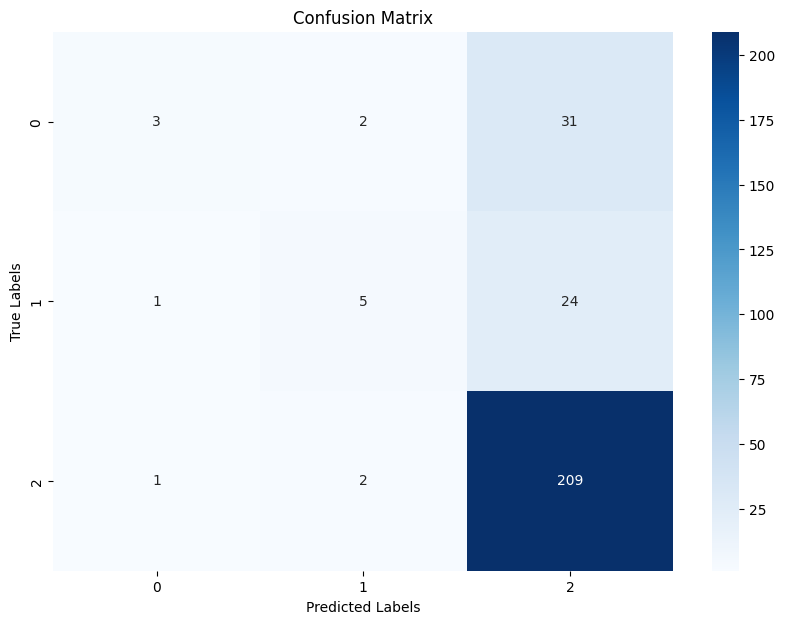

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

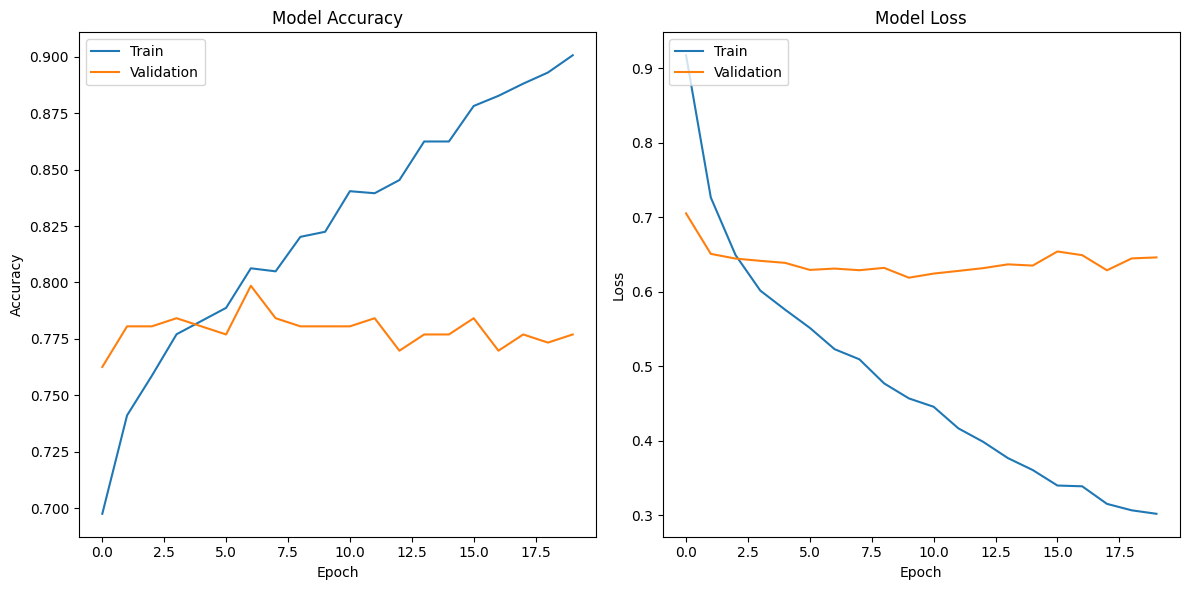

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('xception_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Xception Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
70/70 [==============================] - 16s 194ms/step - loss: 2.2674 - accuracy: 0.6243 - val_loss: 1.0263 - val_accuracy: 0.7554 - lr: 1.0000e-04
Epoch 2/20
70/70 [==============================] - 11s 151ms/step - loss: 1.4512 - accuracy: 0.6598 - val_loss: 0.8722 - val_accuracy: 0.7554 - lr: 1.0000e-04
Epoch 3/20
70/70 [==============================] - 11s 150ms/step - loss: 1.2247 - accuracy: 0.6818 - val_loss: 0.7854 - val_accuracy: 0.7446 - lr: 1.0000e-04
Epoch 4/20
70/70 [==============================] - 11s 151ms/step - loss: 0.9705 - accuracy: 0.7092 - val_loss: 0.7689 - val_accuracy: 0.7554 - lr: 1.0000e-04
Epoch 5/20
70/70 [==============================] - 10s 149ms/step - loss: 0.8809 - accuracy: 0.7240 - val_loss: 0.7364 - val_accuracy: 0.7518 - lr: 1.0000e-04
Epoch 6/20
70/70 [==============================] - 10s 147ms/step - loss: 0.7807 - accuracy: 0.7321 - val_loss: 0.7398 - val_accuracy: 0.7554 - lr: 1.0000e-04
Epoch 7/20
70/70 [======================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_Xception_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_Xception_19_Sept_2024.h5


9/9 [==============================] - 2s 129ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.11      0.19        36
           1       0.17      0.03      0.06        30
           2       0.77      0.97      0.86       212

    accuracy                           0.76       278
   macro avg       0.50      0.37      0.37       278
weighted avg       0.68      0.76      0.69       278



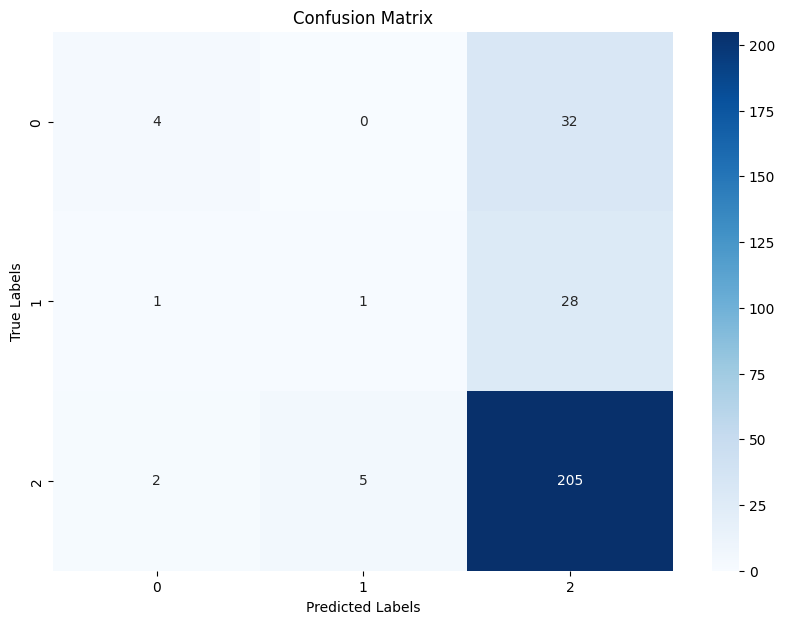

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

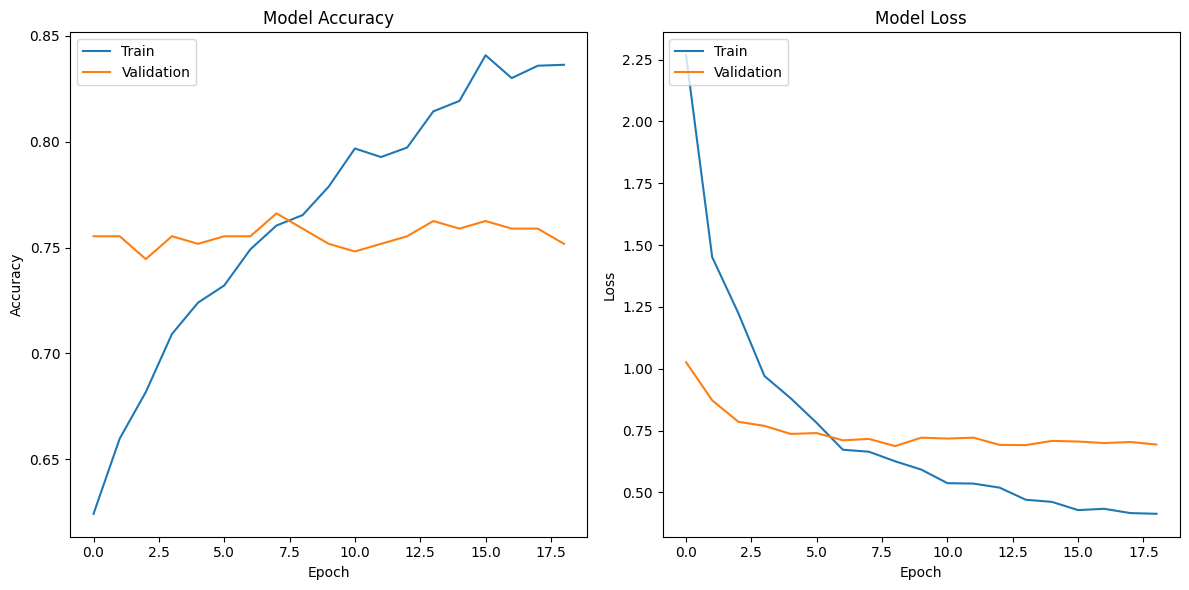

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('inceptionresnetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load InceptionResNetV2
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'InceptionResNetV2 Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
70/70 [==============================] - 29s 271ms/step - loss: 44.3041 - accuracy: 0.6202 - val_loss: 14.7849 - val_accuracy: 0.7590 - lr: 1.0000e-04
Epoch 2/20
70/70 [==============================] - 13s 192ms/step - loss: 17.6282 - accuracy: 0.6184 - val_loss: 3.8132 - val_accuracy: 0.7590 - lr: 1.0000e-04
Epoch 3/20
70/70 [==============================] - 13s 191ms/step - loss: 4.4703 - accuracy: 0.6175 - val_loss: 0.7633 - val_accuracy: 0.7518 - lr: 1.0000e-04
Epoch 4/20
70/70 [==============================] - 13s 190ms/step - loss: 0.8698 - accuracy: 0.7326 - val_loss: 0.7206 - val_accuracy: 0.7590 - lr: 1.0000e-04
Epoch 5/20
70/70 [==============================] - 13s 188ms/step - loss: 0.7940 - accuracy: 0.7515 - val_loss: 0.7190 - val_accuracy: 0.7590 - lr: 1.0000e-04
Epoch 6/20
70/70 [==============================] - 13s 188ms/step - loss: 0.8049 - accuracy: 0.7501 - val_loss: 0.7113 - val_accuracy: 0.7590 - lr: 1.0000e-04
Epoch 7/20
70/70 [===================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_InceptionResNetV2_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_InceptionResNetV2_20_Sept_2024.h5


9/9 [==============================] - 4s 164ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        30
           2       0.76      1.00      0.87       212

    accuracy                           0.76       278
   macro avg       0.25      0.33      0.29       278
weighted avg       0.58      0.76      0.66       278



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


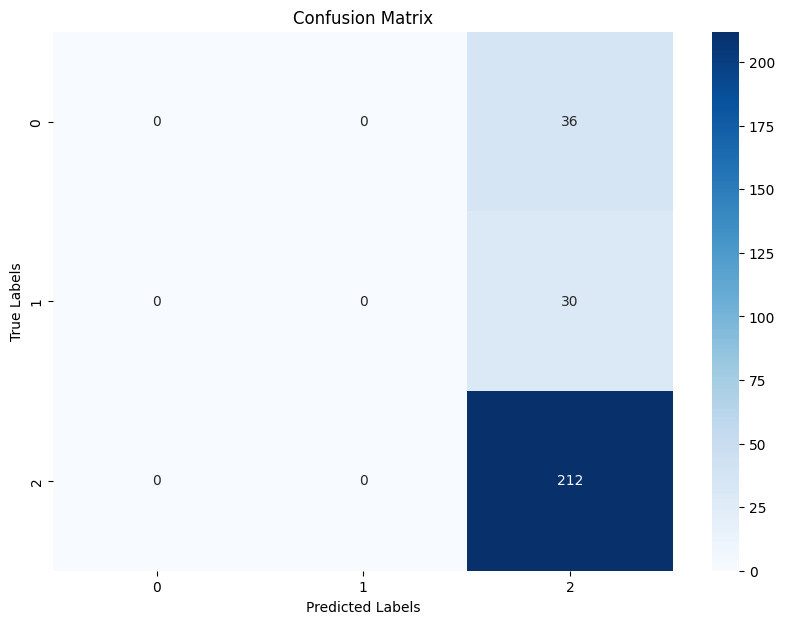

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

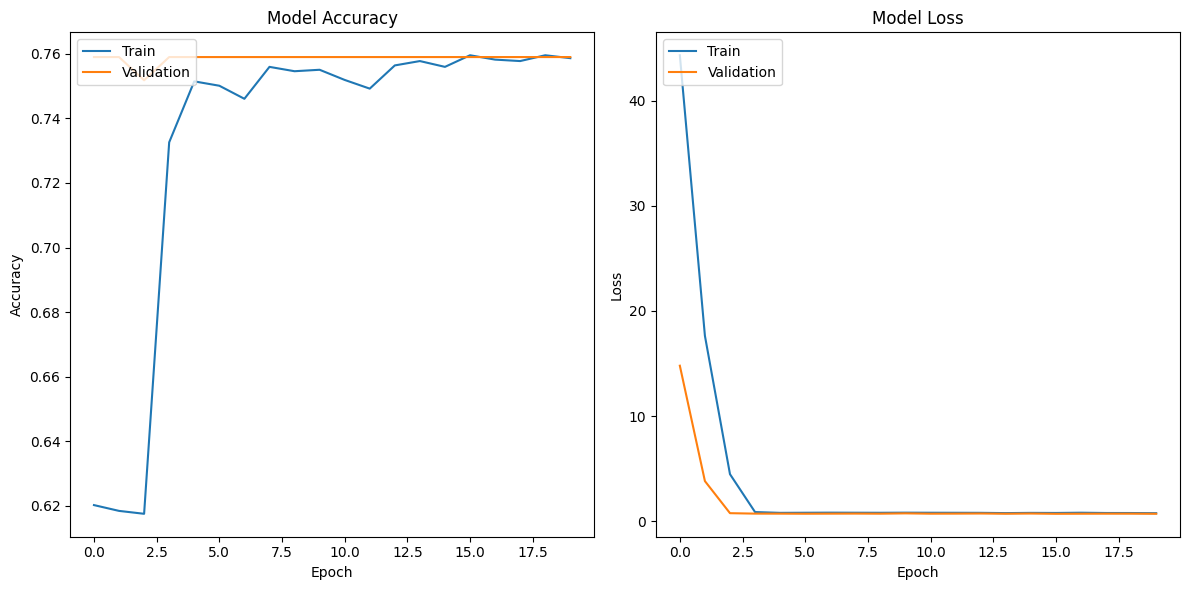

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## NASNetLarge

In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('nasnetlarge_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load NASNetLarge
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'NASNetLarge Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
70/70 [==============================] - 52s 522ms/step - loss: 1.3283 - accuracy: 0.6683 - val_loss: 0.7839 - val_accuracy: 0.7482 - lr: 1.0000e-04
Epoch 2/20
70/70 [==============================] - 29s 407ms/step - loss: 0.9377 - accuracy: 0.7047 - val_loss: 0.7393 - val_accuracy: 0.7590 - lr: 1.0000e-04
Epoch 3/20
70/70 [==============================] - 28s 406ms/step - loss: 0.8356 - accuracy: 0.7258 - val_loss: 0.7533 - val_accuracy: 0.7554 - lr: 1.0000e-04
Epoch 4/20
70/70 [==============================] - 29s 415ms/step - loss: 0.7525 - accuracy: 0.7461 - val_loss: 0.7197 - val_accuracy: 0.7518 - lr: 1.0000e-04
Epoch 5/20
70/70 [==============================] - 28s 405ms/step - loss: 0.7029 - accuracy: 0.7591 - val_loss: 0.7441 - val_accuracy: 0.7518 - lr: 1.0000e-04
Epoch 6/20
70/70 [==============================] - 29s 407ms/step - loss: 0.6947 - accuracy: 0.7578 - val_loss: 0.7462 - val_accuracy: 0.7266 - lr: 1.0000e-04
Epoch 7/20
70/70 [======================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_NASNetLarge_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_4_NASNetLarge_20_Sept_2024.h5


9/9 [==============================] - 8s 346ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.03      0.05        36
           1       0.33      0.03      0.06        30
           2       0.78      0.99      0.87       212

    accuracy                           0.76       278
   macro avg       0.44      0.35      0.33       278
weighted avg       0.65      0.76      0.68       278



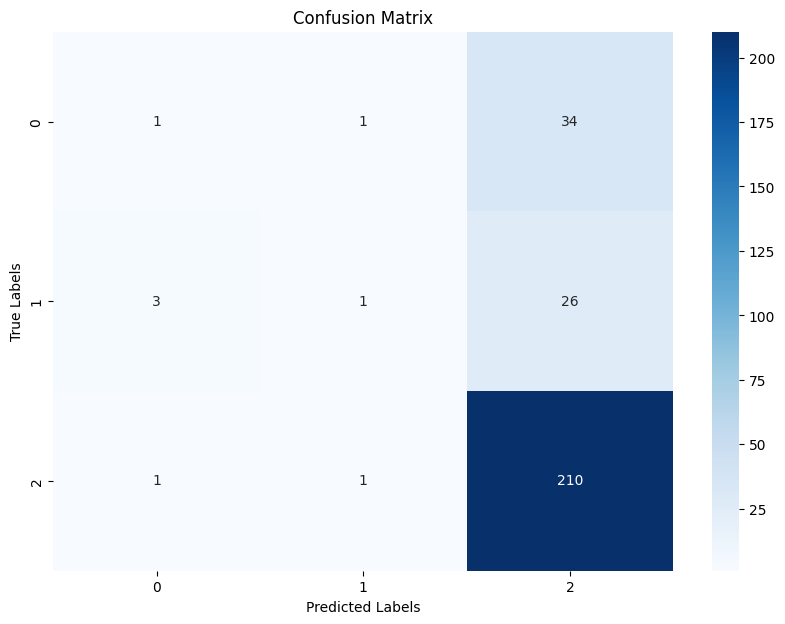

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

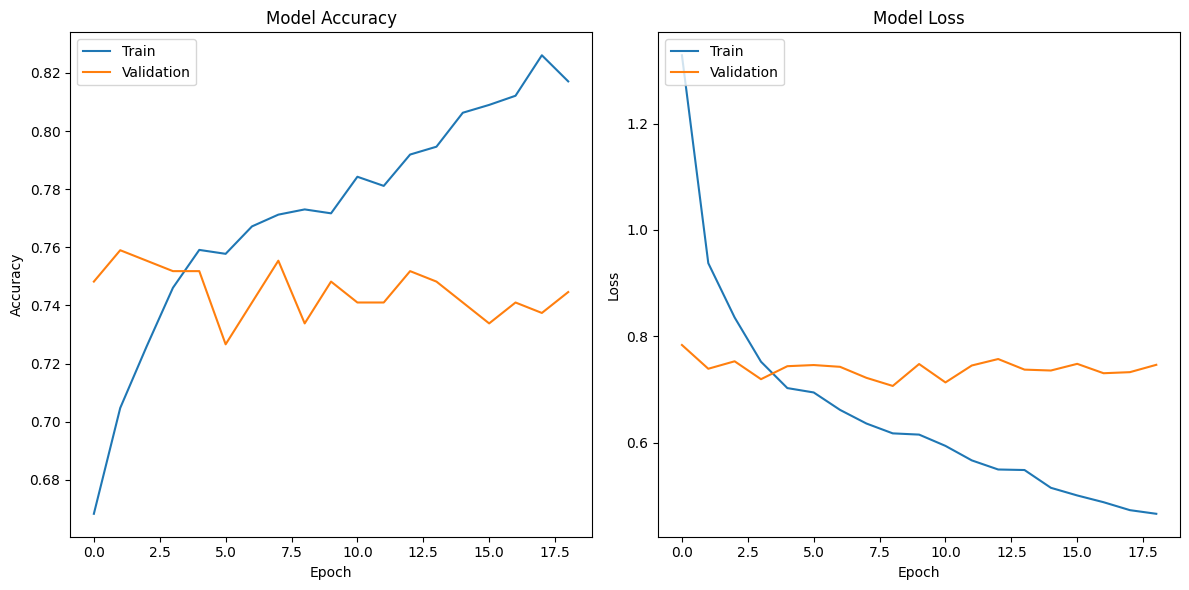

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Skin Tone 5

## Data Loading for Skin Tone 5

In [ ]:
import pandas as pd
import os
from zipfile import ZipFile

# Define file paths
zip_file_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/all_images_preprocessed_V1_RAW.zip'
unzip_dir = '/content/all_images_preprocessed'
metadata_csv_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/image_metadata_preprocessed_V1_RAW.csv'

# Unzip the images folder (run only if not already unzipped)
if not os.path.exists(unzip_dir):
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)
    print(f"Images unzipped to {unzip_dir}")

# Load the metadata DataFrame
df_all_images = pd.read_csv(metadata_csv_path)
# keep only skin tone 1 type
df_all_images = df_all_images[df_all_images['fitzpatrick_scale'] == 5]

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train']
df_test = df_all_images[df_all_images['set'] == 'test']

# Function to load images dynamically based on class label
def get_class_data(df, class_label):
    if class_label in df['three_partition_label'].values:
        class_data = df[df['three_partition_label'] == class_label]
        X = class_data['resized_image_path'].values
        y = class_data['three_partition_label'].values
        return X, y
    else:
        print(f"Class '{class_label}' not found in DataFrame.")
        return None, None

# Example: Load image paths and labels for 'malignant' class from train set
X_train_malignant, y_train_malignant = get_class_data(df_train, 'malignant')

# Example: Load image paths and labels for 'non-neoplastic' class from test set
X_test_non_neoplastic, y_test_non_neoplastic = get_class_data(df_test, 'non-neoplastic')

# Display counts
print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Verify the loaded data
print(df_test.head())
df_train.head()

Train set class distribution:
three_partition_label
non-neoplastic    981
benign            127
malignant         118
Name: count, dtype: int64

Test set class distribution:
three_partition_label
non-neoplastic    246
benign             32
malignant          29
Name: count, dtype: int64
                                      resized_image_path  \
12819  /content/all_images_preprocessed/535e72695bd84...   
12830  /content/all_images_preprocessed/5c8ab654181f2...   
12837  /content/all_images_preprocessed/e1c5f52606e4f...   
12838  /content/all_images_preprocessed/7d8e777c4f5f2...   
12862  /content/all_images_preprocessed/e39141991c0c0...   

      three_partition_label  fitzpatrick_scale   set  
12819                benign                  5  test  
12830                benign                  5  test  
12837        non-neoplastic                  5  test  
12838        non-neoplastic                  5  test  
12862        non-neoplastic                  5  test  


resized_image_path three_partition_label  \
1   /content/all_images_preprocessed/ec374b6e1e783...        non-neoplastic   
4   /content/all_images_preprocessed/0afee23da2647...        non-neoplastic   
8   /content/all_images_preprocessed/1069ab14d1bad...        non-neoplastic   
27  /content/all_images_preprocessed/9255b18c770f5...             malignant   
36  /content/all_images_preprocessed/9238559c66a9e...        non-neoplastic   

    fitzpatrick_scale    set  
1                   5  train  
4                   5  train  
8                   5  train  
27                  5  train  
36                  5  train

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_all_images['three_partition_label'] = label_encoder.fit_transform(df_all_images['three_partition_label'])

# Print the class mapping
print("Class mapping:")
for index, class_label in enumerate(label_encoder.classes_):
    print(f"{index}: {class_label}")

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train'].copy()
df_test = df_all_images[df_all_images['set'] == 'test'].copy()

print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Convert labels to string type for `class_mode='sparse'`
df_train['three_partition_label'] = df_train['three_partition_label'].astype(str)
df_test['three_partition_label'] = df_test['three_partition_label'].astype(str)

# Split df_train into training and validation sets
df_test, df_val = train_test_split(df_test, test_size=0.50, stratify=df_test['three_partition_label'], random_state=42)

# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Class mapping:
0: benign
1: malignant
2: non-neoplastic
Train set class distribution:
three_partition_label
2    981
0    127
1    118
Name: count, dtype: int64

Test set class distribution:
three_partition_label
2    246
0     32
1     29
Name: count, dtype: int64
Found 1226 validated image filenames belonging to 3 classes.
Found 154 validated image filenames belonging to 3 classes.
Found 153 validated image filenames belonging to 3 classes.


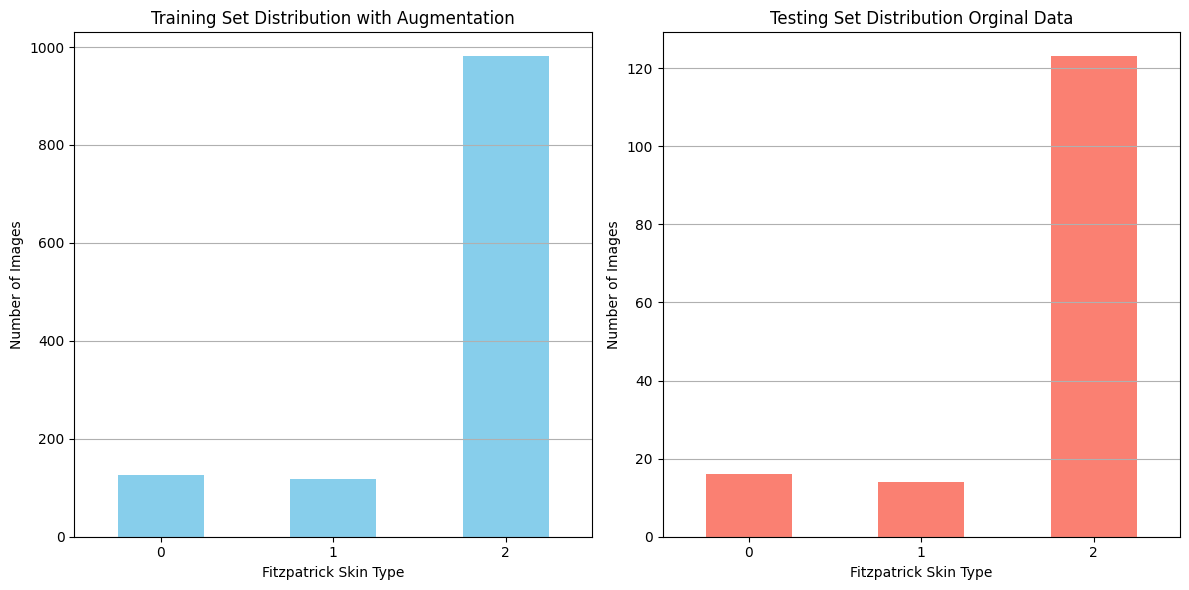

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

train_skin_type_counts = df_train['three_partition_label'].value_counts().sort_index()
test_skin_type_counts = df_test['three_partition_label'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_skin_type_counts.plot(kind='bar', color='skyblue')
plt.title('Training Set Distribution with Augmentation')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(train_skin_type_counts.index)), labels=train_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
test_skin_type_counts.plot(kind='bar', color='salmon')
plt.title('Testing Set Distribution Orginal Data')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(test_skin_type_counts.index)), labels=test_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


## EfficientNetB0




In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load the EfficientNetB0 model with ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
x = BatchNormalization()(x)  # Batch normalization for stability
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to train only the custom layers
for layer in base_model.layers:
    layer.trainable = False

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Compile and fit the model with class weights
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/20
39/39 [==============================] - 13s 145ms/step - loss: 1.7756 - accuracy: 0.3564 - val_loss: 0.9052 - val_accuracy: 0.6948 - lr: 1.0000e-04
Epoch 2/20
39/39 [==============================] - 3s 73ms/step - loss: 1.5018 - accuracy: 0.4290 - val_loss: 0.8170 - val_accuracy: 0.7273 - lr: 1.0000e-04
Epoch 3/20
39/39 [==============================] - 3s 75ms/step - loss: 1.2780 - accuracy: 0.5065 - val_loss: 0.7890 - val_accuracy: 0.7208 - lr: 1.0000e-04
Epoch 4/20
39/39 [==============================] - 3s 72ms/step - loss: 1.0758 - accuracy: 0.5653 - val_loss: 0.7599 - val_accuracy: 0.7273 - lr: 1.0000e-04
Epoch 5/20
39/39 [==============================] - 3s 79ms/step - loss: 1.0145 - accuracy: 0.5734 - val_loss: 0.7294 - val_accuracy: 0.7662 - lr: 1.0000e-04
Epoch 6/20
39/39 [==============================] - 3s 73ms/step - loss: 0.8669 - accuracy: 0.6485 - val_loss: 0.7518 - val_accuracy: 0.7208 - lr: 1.0000e-04
Epoch 7/20
39/39 [==============================] 

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_EfficientNetB0_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_EfficientNetB0_20_Sept_2024.h5


5/5 [==============================] - 2s 74ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.20      0.19      0.19        16
           1       0.27      0.21      0.24        14
           2       0.85      0.88      0.86       123

    accuracy                           0.75       153
   macro avg       0.44      0.43      0.43       153
weighted avg       0.73      0.75      0.74       153



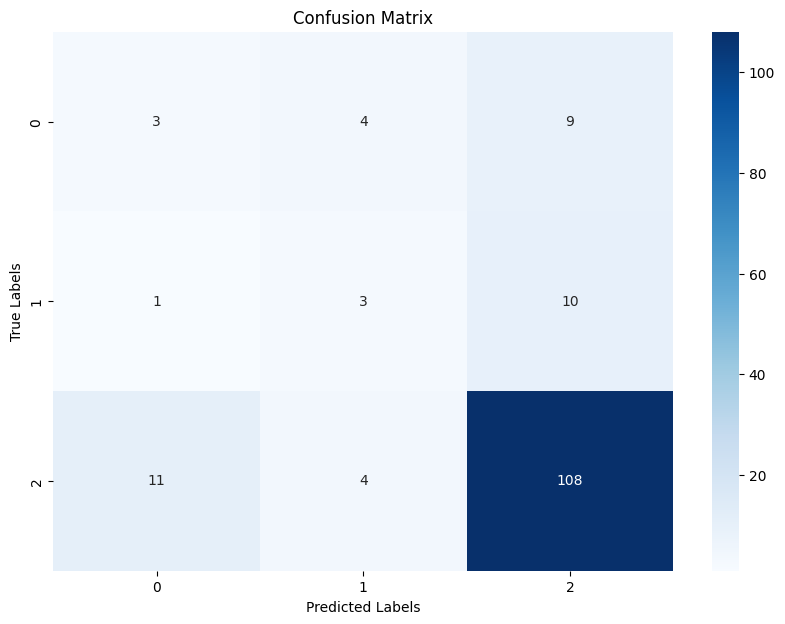

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

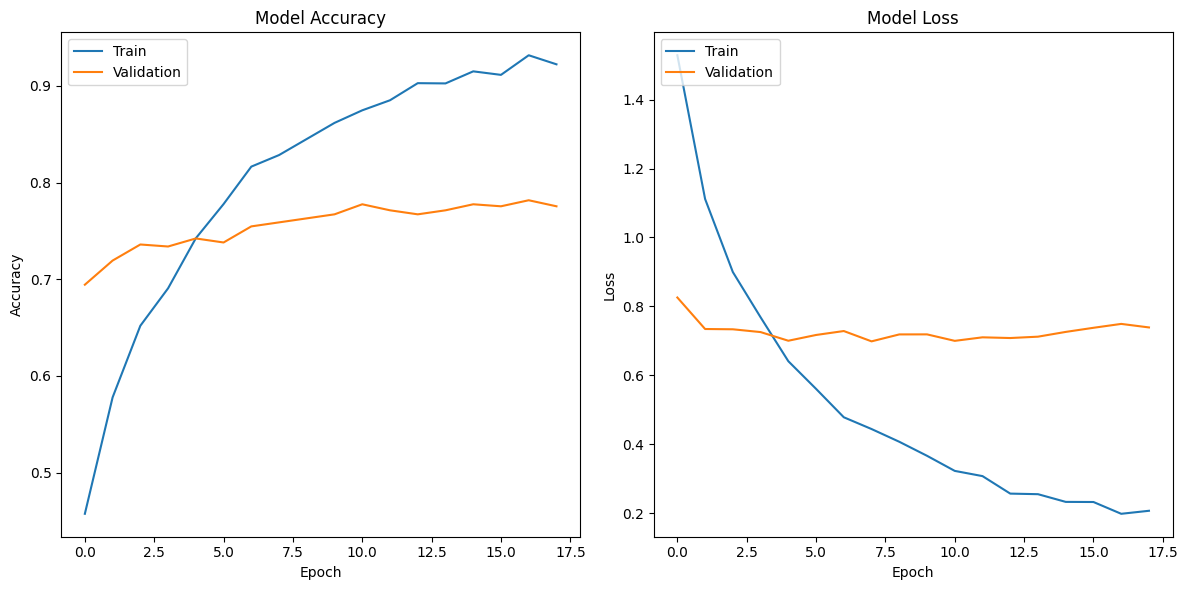

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
39/39 [==============================] - 16s 378ms/step - loss: 8.5978 - accuracy: 0.3507 - val_loss: 8.2082 - val_accuracy: 0.3636 - lr: 1.0000e-04
Epoch 2/25
39/39 [==============================] - 6s 164ms/step - loss: 8.0409 - accuracy: 0.4127 - val_loss: 7.6886 - val_accuracy: 0.4935 - lr: 1.0000e-04
Epoch 3/25
39/39 [==============================] - 6s 161ms/step - loss: 7.6252 - accuracy: 0.5188 - val_loss: 7.4056 - val_accuracy: 0.5325 - lr: 1.0000e-04
Epoch 4/25
39/39 [==============================] - 6s 164ms/step - loss: 7.3347 - accuracy: 0.5799 - val_loss: 7.1366 - val_accuracy: 0.5779 - lr: 1.0000e-04
Epoch 5/25
39/39 [==============================] - 6s 164ms/step - loss: 7.0618 - accuracy: 0.6077 - val_loss: 6.8995 - val_accuracy: 0.6299 - lr: 1.0000e-04
Epoch 6/25
39/39 [==============================] - 7s 165ms/step - loss: 6.8122 - accuracy: 0.6362 - val_loss: 6.6936 - val_accuracy: 0.6623 - lr: 1.0000e-04
Epoch 7/25
39/39 [===========================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_VGG19_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_VGG19_20_Sept_2024.h5


5/5 [==============================] - 1s 148ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.42      0.31      0.36        16
           1       0.25      0.14      0.18        14
           2       0.84      0.91      0.87       123

    accuracy                           0.78       153
   macro avg       0.50      0.46      0.47       153
weighted avg       0.74      0.78      0.76       153



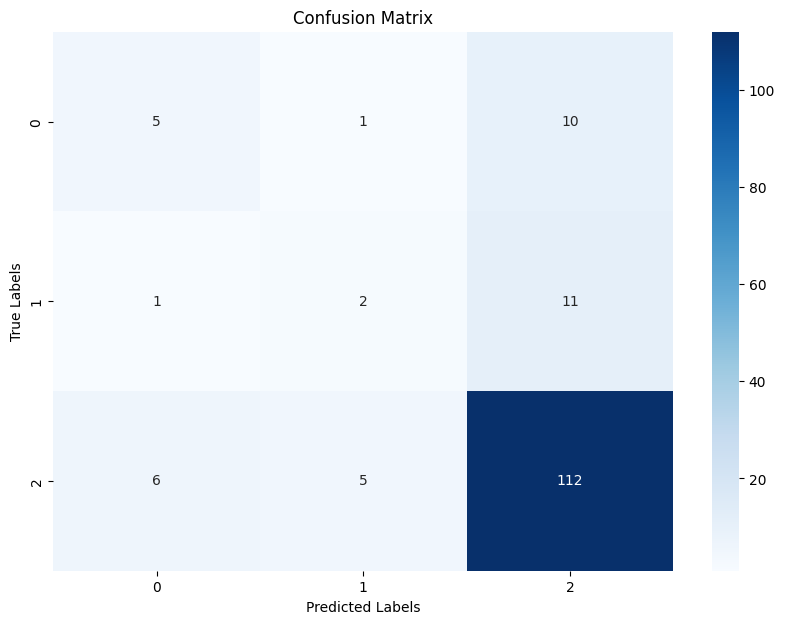

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

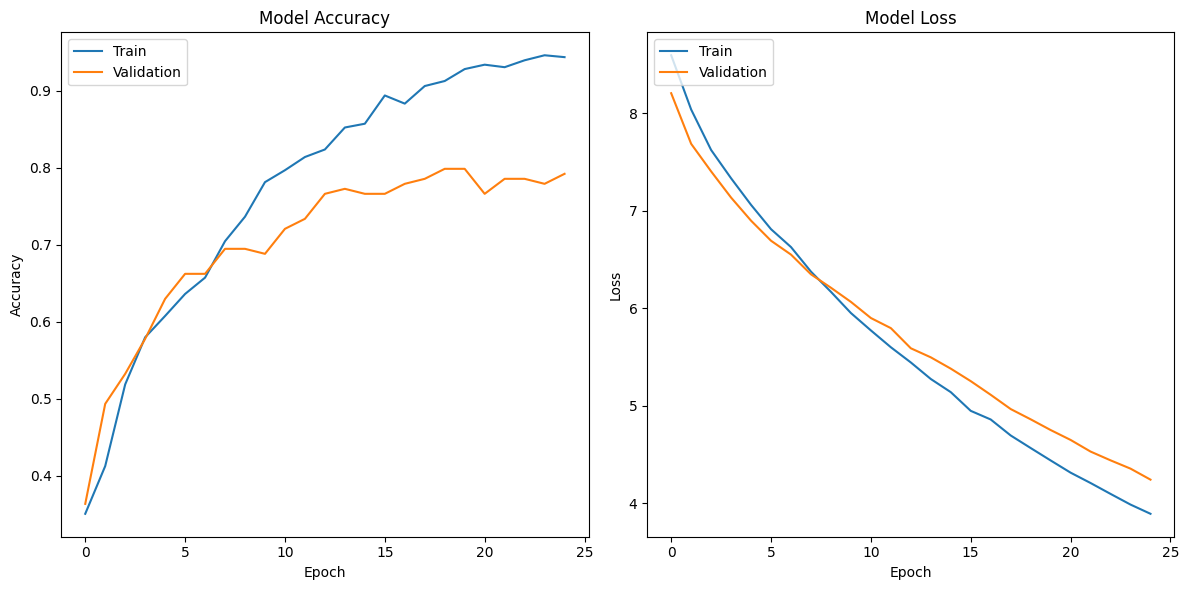

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load a pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
39/39 [==============================] - 12s 220ms/step - loss: 0.7969 - accuracy: 0.7545 - val_loss: 0.5921 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 2/25
39/39 [==============================] - 5s 116ms/step - loss: 0.5319 - accuracy: 0.8148 - val_loss: 0.5930 - val_accuracy: 0.8182 - lr: 1.0000e-04
Epoch 3/25
39/39 [==============================] - 5s 118ms/step - loss: 0.4642 - accuracy: 0.8312 - val_loss: 0.5732 - val_accuracy: 0.8117 - lr: 1.0000e-04
Epoch 4/25
39/39 [==============================] - 5s 116ms/step - loss: 0.3842 - accuracy: 0.8630 - val_loss: 0.6053 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 5/25
39/39 [==============================] - 5s 119ms/step - loss: 0.3162 - accuracy: 0.8915 - val_loss: 0.5524 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 6/25
39/39 [==============================] - 5s 119ms/step - loss: 0.2548 - accuracy: 0.9160 - val_loss: 0.5443 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 7/25
39/39 [===========================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_ResNet50_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_ResNet50_19_Sept_2024.h5


5/5 [==============================] - 1s 97ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.25      0.36        16
           1       0.33      0.07      0.12        14
           2       0.85      0.99      0.91       123

    accuracy                           0.83       153
   macro avg       0.62      0.44      0.47       153
weighted avg       0.78      0.83      0.78       153



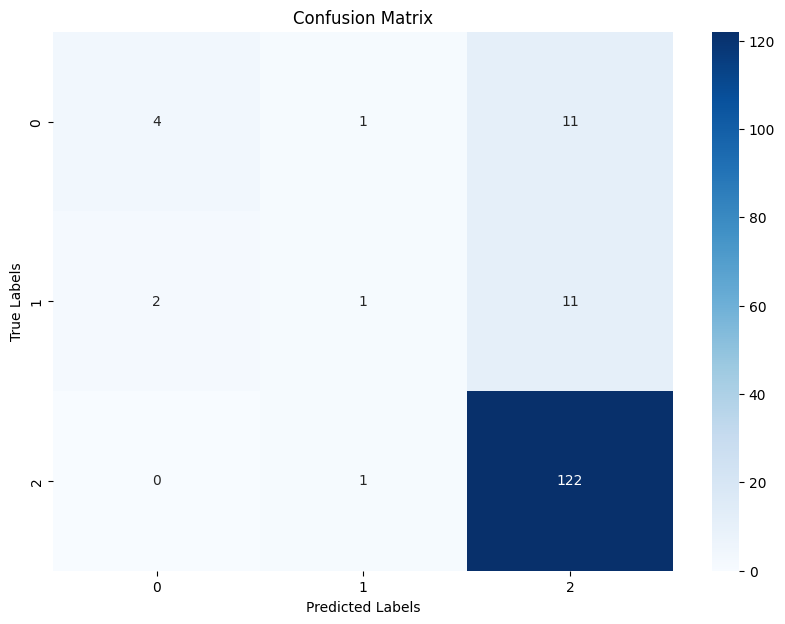

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

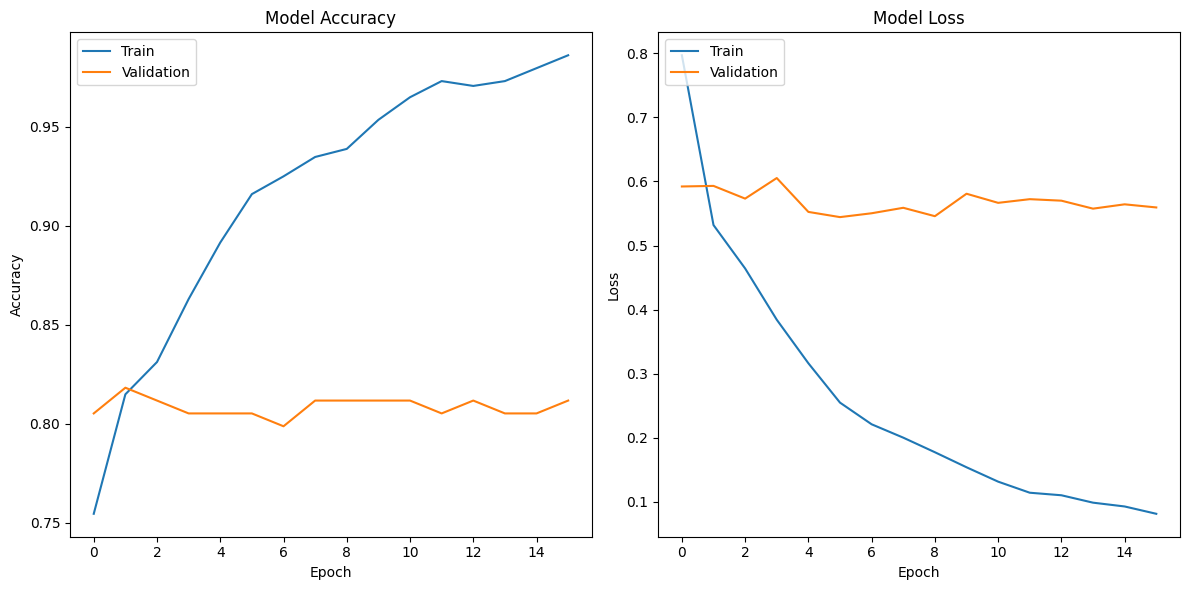

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('densenet201_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'DenseNet201 Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
39/39 [==============================] - 29s 517ms/step - loss: 2.3974 - accuracy: 0.6778 - val_loss: 1.0964 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 2/25
39/39 [==============================] - 6s 165ms/step - loss: 1.8248 - accuracy: 0.7104 - val_loss: 1.0801 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 3/25
39/39 [==============================] - 6s 164ms/step - loss: 1.4402 - accuracy: 0.7113 - val_loss: 0.9342 - val_accuracy: 0.7922 - lr: 1.0000e-04
Epoch 4/25
39/39 [==============================] - 7s 166ms/step - loss: 1.1192 - accuracy: 0.7316 - val_loss: 0.8719 - val_accuracy: 0.7532 - lr: 1.0000e-04
Epoch 5/25
39/39 [==============================] - 7s 165ms/step - loss: 0.9995 - accuracy: 0.7349 - val_loss: 0.8025 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 6/25
39/39 [==============================] - 7s 166ms/step - loss: 0.9295 - accuracy: 0.7512 - val_loss: 0.7742 - val_accuracy: 0.7922 - lr: 1.0000e-04
Epoch 7/25
39/39 [===========================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_DenseNet201_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_DenseNet201_19_Sept_2024.h5


5/5 [==============================] - 3s 149ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        14
           2       0.80      0.97      0.88       123

    accuracy                           0.78       153
   macro avg       0.27      0.32      0.29       153
weighted avg       0.64      0.78      0.70       153



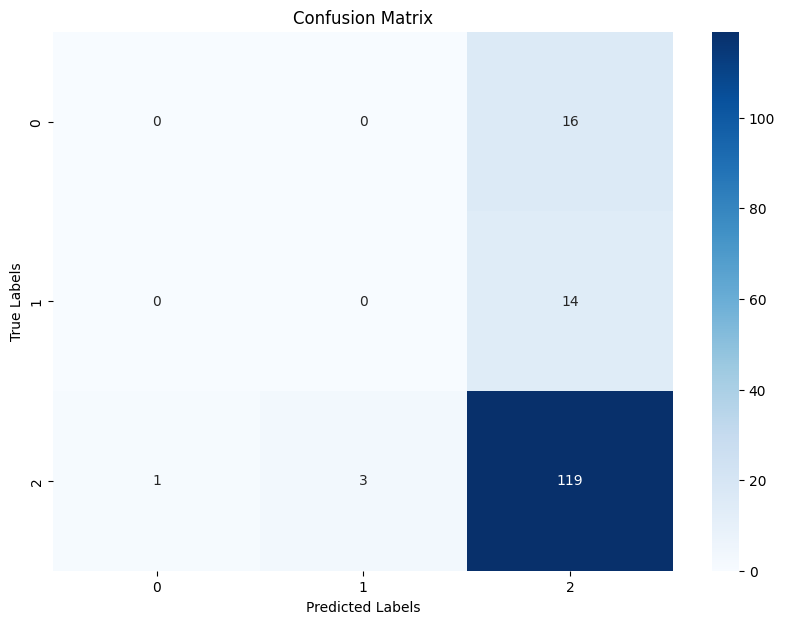

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

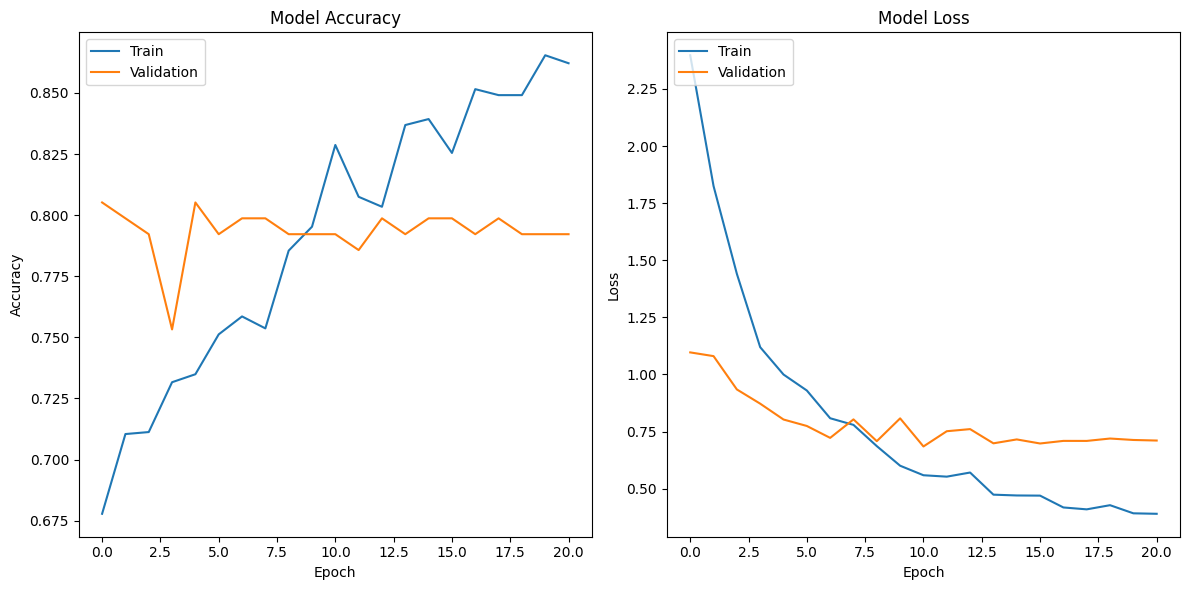

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('mobilenetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    # class_weight=custom_class_weights,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'MobileNetV2 Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
39/39 [==============================] - 8s 119ms/step - loss: 0.7742 - accuracy: 0.7504 - val_loss: 0.6966 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 2/20
39/39 [==============================] - 3s 72ms/step - loss: 0.6540 - accuracy: 0.7822 - val_loss: 0.6712 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 3/20
39/39 [==============================] - 3s 70ms/step - loss: 0.5828 - accuracy: 0.8075 - val_loss: 0.6698 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 4/20
39/39 [==============================] - 3s 67ms/step - loss: 0.5333 - accuracy: 0.8067 - val_loss: 0.6520 - val_accuracy: 0.8052 - lr: 1.0000e-04
Epoch 5/20
39/39 [==============================] - 3s 75ms/step - loss: 0.5038 - accuracy: 0.8189 - val_loss: 0.6529 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 6/20
39/39 [==============================] - 3s 67ms/step - loss: 0.4655 - accuracy: 0.8344 - val_loss: 0.6638 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 7/20
39/39 [==============================] -

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_MobileNetV2_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_MobileNetV2_19_Sept_2024.h5


5/5 [==============================] - 1s 56ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        16
           1       0.40      0.14      0.21        14
           2       0.83      0.98      0.90       123

    accuracy                           0.81       153
   macro avg       0.58      0.40      0.41       153
weighted avg       0.76      0.81      0.75       153



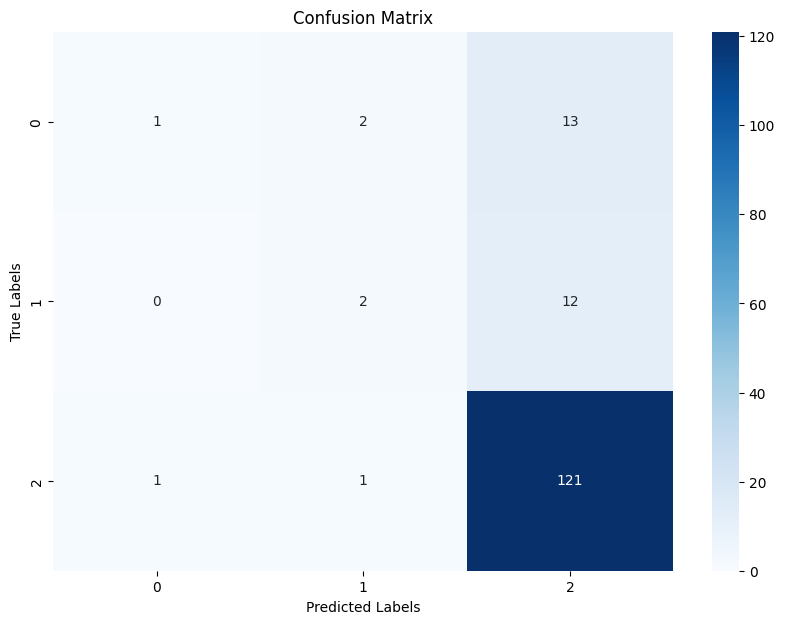

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels0
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

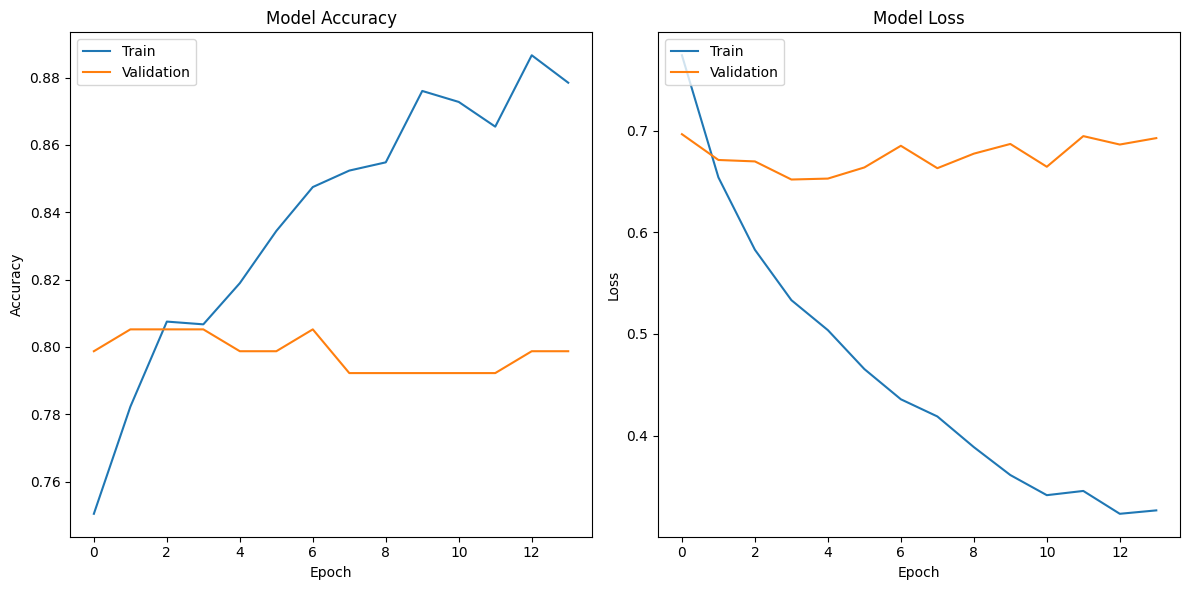

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('xception_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Xception Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
39/39 [==============================] - 14s 284ms/step - loss: 1.8806 - accuracy: 0.6843 - val_loss: 1.1887 - val_accuracy: 0.7922 - lr: 1.0000e-04
Epoch 2/20
39/39 [==============================] - 6s 147ms/step - loss: 1.5165 - accuracy: 0.6933 - val_loss: 1.1749 - val_accuracy: 0.7922 - lr: 1.0000e-04
Epoch 3/20
39/39 [==============================] - 6s 146ms/step - loss: 1.2810 - accuracy: 0.7292 - val_loss: 1.1317 - val_accuracy: 0.7857 - lr: 1.0000e-04
Epoch 4/20
39/39 [==============================] - 6s 146ms/step - loss: 1.0905 - accuracy: 0.7471 - val_loss: 1.0111 - val_accuracy: 0.7857 - lr: 1.0000e-04
Epoch 5/20
39/39 [==============================] - 6s 145ms/step - loss: 0.9079 - accuracy: 0.7496 - val_loss: 1.1635 - val_accuracy: 0.7922 - lr: 1.0000e-04
Epoch 6/20
39/39 [==============================] - 6s 147ms/step - loss: 0.8435 - accuracy: 0.7749 - val_loss: 0.9924 - val_accuracy: 0.7922 - lr: 1.0000e-04
Epoch 7/20
39/39 [===========================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_Xception_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_Xception_19_Sept_2024.h5


5/5 [==============================] - 1s 124ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.12      0.20        16
           1       0.00      0.00      0.00        14
           2       0.81      0.96      0.88       123

    accuracy                           0.78       153
   macro avg       0.44      0.36      0.36       153
weighted avg       0.70      0.78      0.73       153



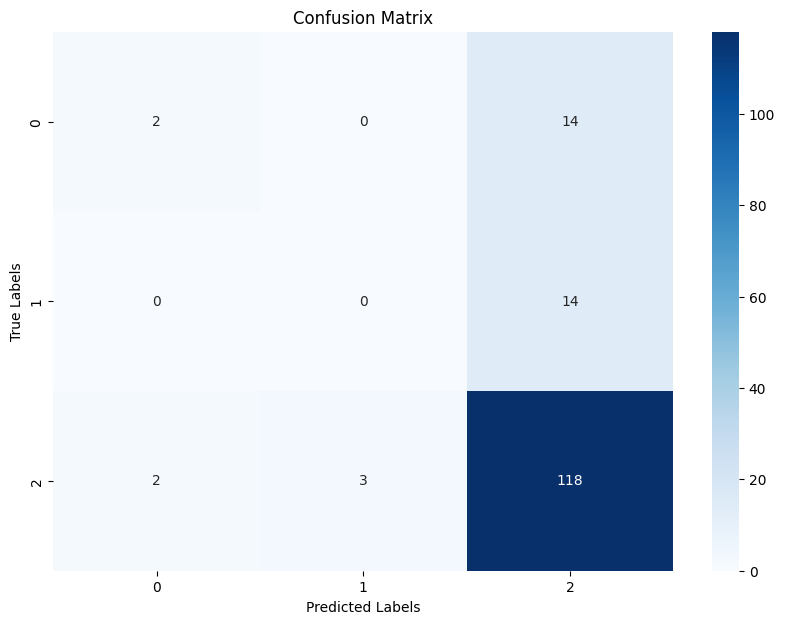

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

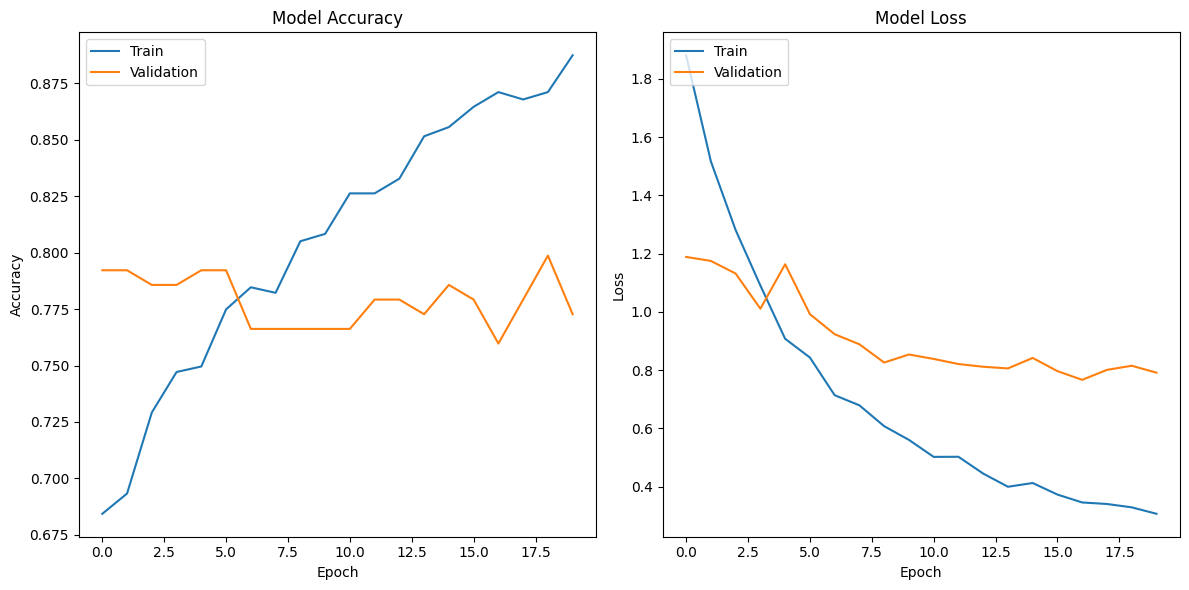

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('inceptionresnetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load InceptionResNetV2
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'InceptionResNetV2 Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
39/39 [==============================] - 25s 403ms/step - loss: 49.8146 - accuracy: 0.6721 - val_loss: 23.9884 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 2/20
39/39 [==============================] - 8s 191ms/step - loss: 23.3257 - accuracy: 0.6762 - val_loss: 9.9244 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 3/20
39/39 [==============================] - 7s 184ms/step - loss: 15.8891 - accuracy: 0.6713 - val_loss: 10.3616 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 4/20
39/39 [==============================] - 8s 193ms/step - loss: 9.3357 - accuracy: 0.6623 - val_loss: 6.3243 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 5/20
39/39 [==============================] - 8s 192ms/step - loss: 4.0625 - accuracy: 0.6721 - val_loss: 2.9939 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 6/20
39/39 [==============================] - 8s 192ms/step - loss: 1.3308 - accuracy: 0.7414 - val_loss: 0.6864 - val_accuracy: 0.7922 - lr: 1.0000e-04
Epoch 7/20
39/39 [======================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_InceptionResNetV2_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_InceptionResNetV2_20_Sept_2024.h5


5/5 [==============================] - 4s 170ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        14
           2       0.80      1.00      0.89       123

    accuracy                           0.80       153
   macro avg       0.27      0.33      0.30       153
weighted avg       0.65      0.80      0.72       153



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


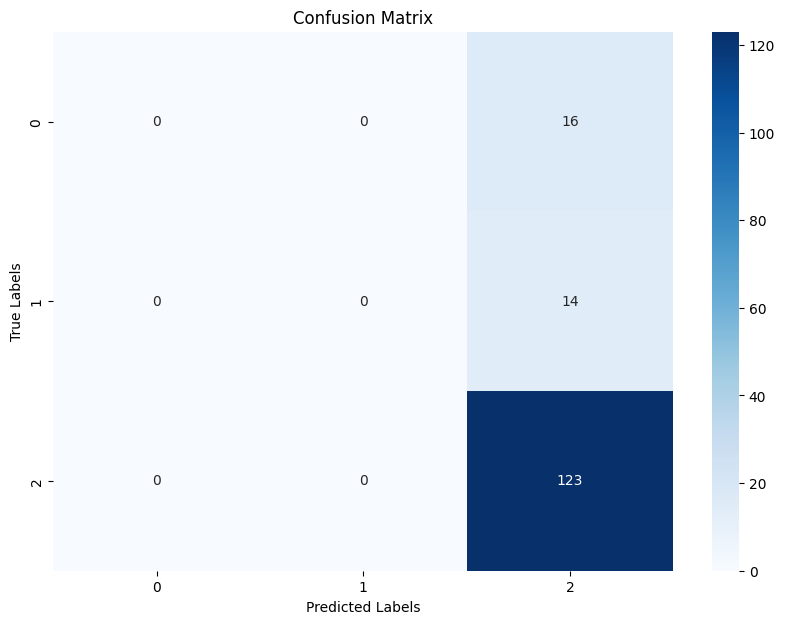

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

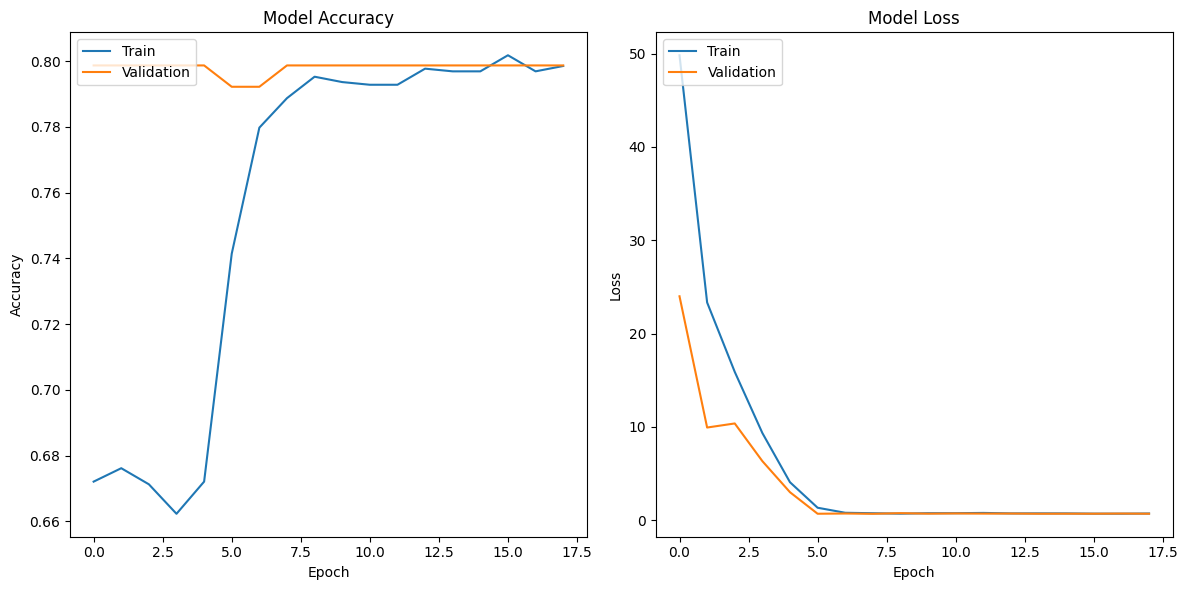

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## NASNetLarge

In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('nasnetlarge_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load NASNetLarge
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'NASNetLarge Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
39/39 [==============================] - 43s 655ms/step - loss: 1.3068 - accuracy: 0.7113 - val_loss: 0.9443 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 2/20
39/39 [==============================] - 16s 408ms/step - loss: 0.9678 - accuracy: 0.7447 - val_loss: 0.8472 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 3/20
39/39 [==============================] - 16s 411ms/step - loss: 0.8618 - accuracy: 0.7545 - val_loss: 0.7580 - val_accuracy: 0.7922 - lr: 1.0000e-04
Epoch 4/20
39/39 [==============================] - 16s 410ms/step - loss: 0.7738 - accuracy: 0.7594 - val_loss: 0.7156 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 5/20
39/39 [==============================] - 16s 414ms/step - loss: 0.7196 - accuracy: 0.7814 - val_loss: 0.7089 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 6/20
39/39 [==============================] - 16s 415ms/step - loss: 0.6820 - accuracy: 0.7953 - val_loss: 0.6723 - val_accuracy: 0.7987 - lr: 1.0000e-04
Epoch 7/20
39/39 [======================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_NASNetLarge_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_5_NASNetLarge_20_Sept_2024.h5


5/5 [==============================] - 6s 341ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        16
           1       0.00      0.00      0.00        14
           2       0.80      1.00      0.89       123

    accuracy                           0.80       153
   macro avg       0.27      0.33      0.30       153
weighted avg       0.65      0.80      0.72       153



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


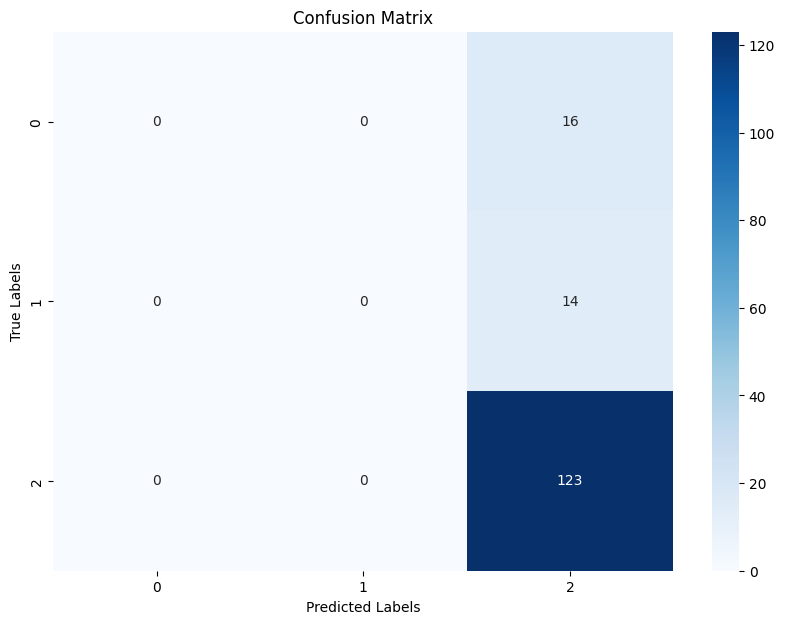

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

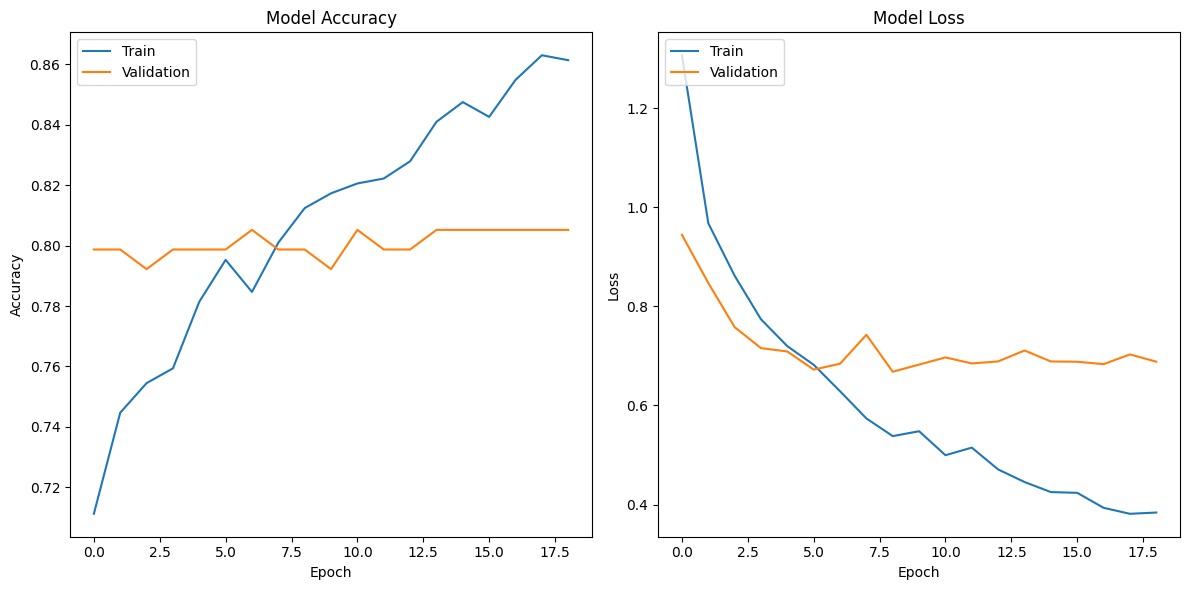

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


# Skin Tone 6

## Data Loading for Skin Tone 6

In [ ]:
import pandas as pd
import os
from zipfile import ZipFile

# Define file paths
zip_file_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/all_images_preprocessed_V1_RAW.zip'
unzip_dir = '/content/all_images_preprocessed'
metadata_csv_path = '/content/drive/MyDrive/Student/Mohit/Dataset/Fitzptrick_17k/V2/3_6_Mix/image_metadata_preprocessed_V1_RAW.csv'

# Unzip the images folder (run only if not already unzipped)
if not os.path.exists(unzip_dir):
    with ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(unzip_dir)
    print(f"Images unzipped to {unzip_dir}")

# Load the metadata DataFrame
df_all_images = pd.read_csv(metadata_csv_path)
# keep only skin tone 1 type
df_all_images = df_all_images[df_all_images['fitzpatrick_scale'] == 6]

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train']
df_test = df_all_images[df_all_images['set'] == 'test']

# Function to load images dynamically based on class label
def get_class_data(df, class_label):
    if class_label in df['three_partition_label'].values:
        class_data = df[df['three_partition_label'] == class_label]
        X = class_data['resized_image_path'].values
        y = class_data['three_partition_label'].values
        return X, y
    else:
        print(f"Class '{class_label}' not found in DataFrame.")
        return None, None

# Example: Load image paths and labels for 'malignant' class from train set
X_train_malignant, y_train_malignant = get_class_data(df_train, 'malignant')

# Example: Load image paths and labels for 'non-neoplastic' class from test set
X_test_non_neoplastic, y_test_non_neoplastic = get_class_data(df_test, 'non-neoplastic')

# Display counts
print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Verify the loaded data
print(df_test.head())
df_train.head()

Train set class distribution:
three_partition_label
non-neoplastic    424
malignant          49
benign             35
Name: count, dtype: int64

Test set class distribution:
three_partition_label
non-neoplastic    106
malignant          12
benign              9
Name: count, dtype: int64
                                      resized_image_path  \
12831  /content/all_images_preprocessed/f3285b986ca21...   
12864  /content/all_images_preprocessed/02f11821915d6...   
12893  /content/all_images_preprocessed/9569dad9340f3...   
12914  /content/all_images_preprocessed/788604422e9f1...   
12920  /content/all_images_preprocessed/267518e9fd4ad...   

      three_partition_label  fitzpatrick_scale   set  
12831        non-neoplastic                  6  test  
12864             malignant                  6  test  
12893        non-neoplastic                  6  test  
12914        non-neoplastic                  6  test  
12920        non-neoplastic                  6  test  


resized_image_path three_partition_label  \
11  /content/all_images_preprocessed/2aab301297ca4...        non-neoplastic   
18  /content/all_images_preprocessed/631f3881a90e1...        non-neoplastic   
38  /content/all_images_preprocessed/1fc1eff4c66e8...             malignant   
58  /content/all_images_preprocessed/6fd6a070b39bc...        non-neoplastic   
88  /content/all_images_preprocessed/b20dd9c72a9fd...        non-neoplastic   

    fitzpatrick_scale    set  
11                  6  train  
18                  6  train  
38                  6  train  
58                  6  train  
88                  6  train

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
df_all_images['three_partition_label'] = label_encoder.fit_transform(df_all_images['three_partition_label'])

# Print the class mapping
print("Class mapping:")
for index, class_label in enumerate(label_encoder.classes_):
    print(f"{index}: {class_label}")

# Separate into train and test sets
df_train = df_all_images[df_all_images['set'] == 'train'].copy()
df_test = df_all_images[df_all_images['set'] == 'test'].copy()

print("Train set class distribution:")
print(df_train['three_partition_label'].value_counts())

print("\nTest set class distribution:")
print(df_test['three_partition_label'].value_counts())

# Convert labels to string type for `class_mode='sparse'`
df_train['three_partition_label'] = df_train['three_partition_label'].astype(str)
df_test['three_partition_label'] = df_test['three_partition_label'].astype(str)

# Split df_train into training and validation sets
df_test, df_val = train_test_split(df_test, test_size=0.50, stratify=df_test['three_partition_label'], random_state=42)

# Data Generators
train_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg19.preprocess_input)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=df_val,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=df_test,
    x_col='resized_image_path',
    y_col='three_partition_label',
    target_size=(224, 224),
    batch_size=32,
    class_mode='sparse',
    shuffle=False
)


Class mapping:
0: benign
1: malignant
2: non-neoplastic
Train set class distribution:
three_partition_label
2    424
1     49
0     35
Name: count, dtype: int64

Test set class distribution:
three_partition_label
2    106
1     12
0      9
Name: count, dtype: int64
Found 508 validated image filenames belonging to 3 classes.
Found 64 validated image filenames belonging to 3 classes.
Found 63 validated image filenames belonging to 3 classes.


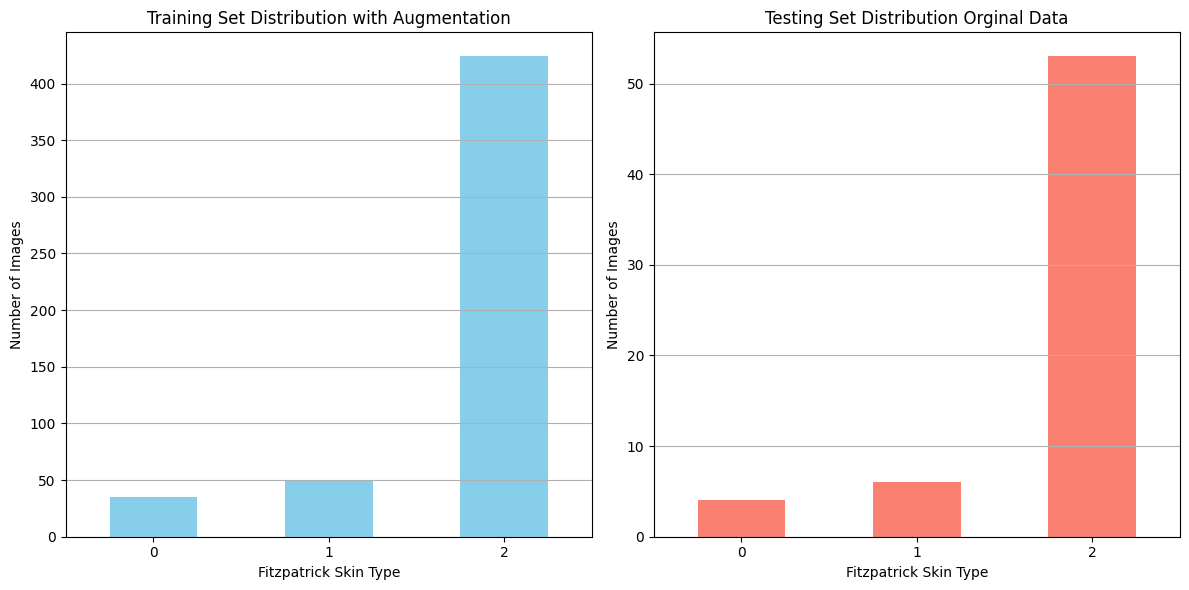

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

train_skin_type_counts = df_train['three_partition_label'].value_counts().sort_index()
test_skin_type_counts = df_test['three_partition_label'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
train_skin_type_counts.plot(kind='bar', color='skyblue')
plt.title('Training Set Distribution with Augmentation')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(train_skin_type_counts.index)), labels=train_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.subplot(1, 2, 2)
test_skin_type_counts.plot(kind='bar', color='salmon')
plt.title('Testing Set Distribution Orginal Data')
plt.xlabel('Fitzpatrick Skin Type')
plt.ylabel('Number of Images')
plt.xticks(ticks=range(len(test_skin_type_counts.index)), labels=test_skin_type_counts.index, rotation=0)
plt.grid(axis='y')

plt.tight_layout()
plt.show()


## EfficientNetB0




In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load the EfficientNetB0 model with ImageNet weights
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of the base model
x = base_model.output
x = GlobalAveragePooling2D()(x)  # Global Average Pooling
x = Dense(1024, activation='relu')(x)  # Dense layer with 1024 units
x = BatchNormalization()(x)  # Batch normalization for stability
x = Dropout(0.5)(x)  # Dropout layer to prevent overfitting
predictions = Dense(3, activation='softmax')(x)  # Output layer for 3 classes

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers to train only the custom layers
for layer in base_model.layers:
    layer.trainable = False

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Compile and fit the model with class weights
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")


Epoch 1/20
16/16 [==============================] - 9s 191ms/step - loss: 1.9281 - accuracy: 0.3307 - val_loss: 0.9698 - val_accuracy: 0.6406 - lr: 1.0000e-04
Epoch 2/20
16/16 [==============================] - 1s 83ms/step - loss: 1.5558 - accuracy: 0.4075 - val_loss: 0.8767 - val_accuracy: 0.7188 - lr: 1.0000e-04
Epoch 3/20
16/16 [==============================] - 1s 78ms/step - loss: 1.3830 - accuracy: 0.4724 - val_loss: 0.8588 - val_accuracy: 0.7188 - lr: 1.0000e-04
Epoch 4/20
16/16 [==============================] - 1s 80ms/step - loss: 1.3290 - accuracy: 0.4705 - val_loss: 0.8235 - val_accuracy: 0.7500 - lr: 1.0000e-04
Epoch 5/20
16/16 [==============================] - 1s 81ms/step - loss: 1.2146 - accuracy: 0.5197 - val_loss: 0.8124 - val_accuracy: 0.7969 - lr: 1.0000e-04
Epoch 6/20
16/16 [==============================] - 1s 79ms/step - loss: 1.1302 - accuracy: 0.5374 - val_loss: 0.7921 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 7/20
16/16 [==============================] -

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_EfficientNetB0_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_EfficientNetB0_20_Sept_2024.h5


2/2 [==============================] - 1s 76ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.25      0.25      0.25         4
           1       0.60      0.50      0.55         6
           2       0.93      0.94      0.93        53

    accuracy                           0.86        63
   macro avg       0.59      0.56      0.58        63
weighted avg       0.85      0.86      0.85        63



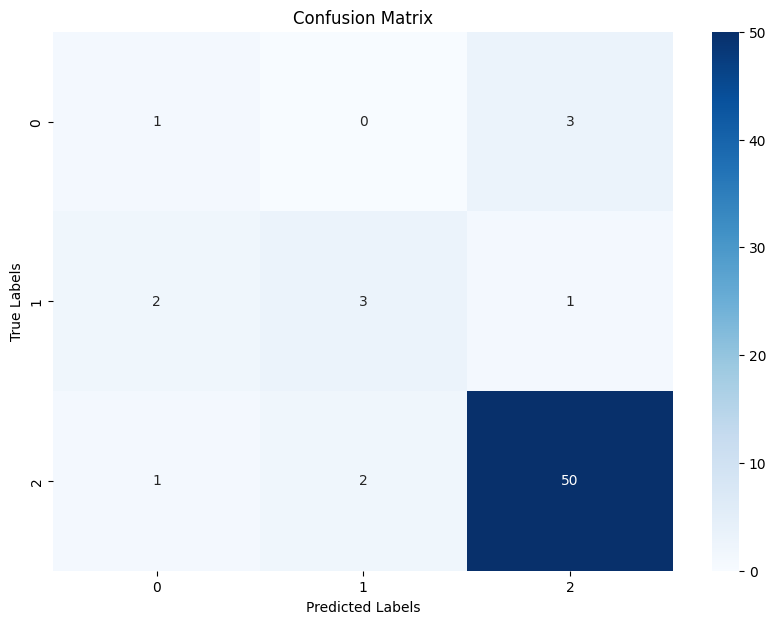

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

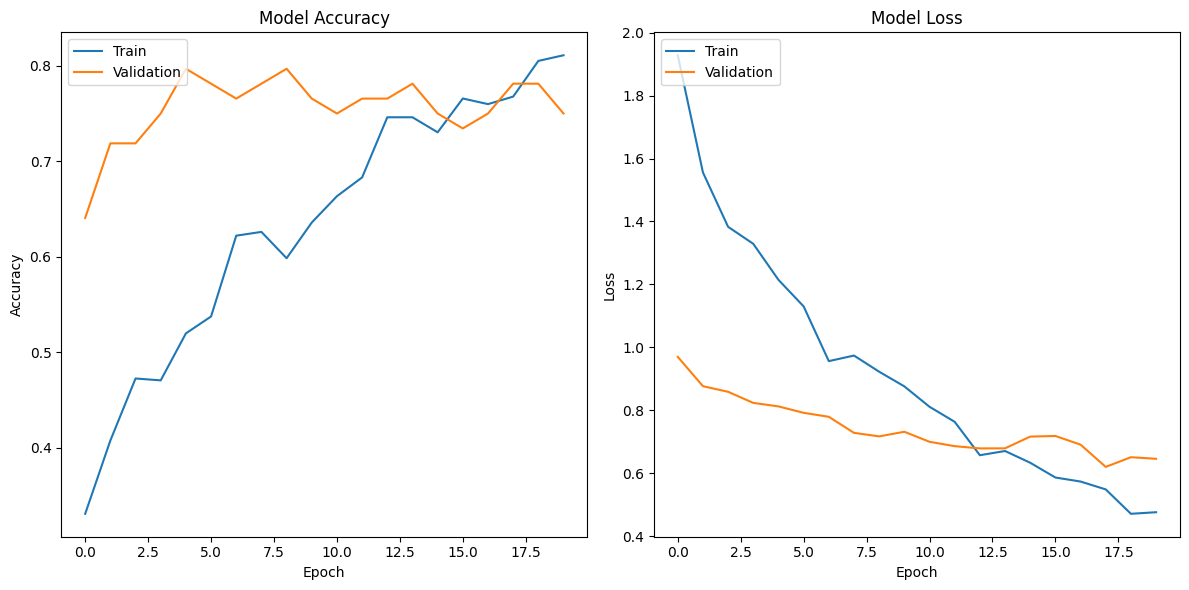

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## VGG19

In [ ]:
from tensorflow.keras.applications import VGG19
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
16/16 [==============================] - 10s 570ms/step - loss: 8.6529 - accuracy: 0.3150 - val_loss: 8.0278 - val_accuracy: 0.4531 - lr: 1.0000e-04
Epoch 2/25
16/16 [==============================] - 3s 171ms/step - loss: 8.2872 - accuracy: 0.4055 - val_loss: 7.9082 - val_accuracy: 0.4531 - lr: 1.0000e-04
Epoch 3/25
16/16 [==============================] - 3s 172ms/step - loss: 7.9657 - accuracy: 0.4665 - val_loss: 7.8607 - val_accuracy: 0.4844 - lr: 1.0000e-04
Epoch 4/25
16/16 [==============================] - 3s 171ms/step - loss: 7.9528 - accuracy: 0.4744 - val_loss: 7.5643 - val_accuracy: 0.6094 - lr: 1.0000e-04
Epoch 5/25
16/16 [==============================] - 3s 171ms/step - loss: 7.7797 - accuracy: 0.4921 - val_loss: 7.5053 - val_accuracy: 0.6250 - lr: 1.0000e-04
Epoch 6/25
16/16 [==============================] - 3s 170ms/step - loss: 7.5627 - accuracy: 0.5551 - val_loss: 7.3785 - val_accuracy: 0.6562 - lr: 1.0000e-04
Epoch 7/25
16/16 [===========================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_VGG19_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_VGG19_20_Sept_2024.h5


2/2 [==============================] - 0s 139ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.43      0.50      0.46         6
           2       0.87      0.77      0.82        53

    accuracy                           0.70        63
   macro avg       0.43      0.42      0.43        63
weighted avg       0.77      0.70      0.73        63



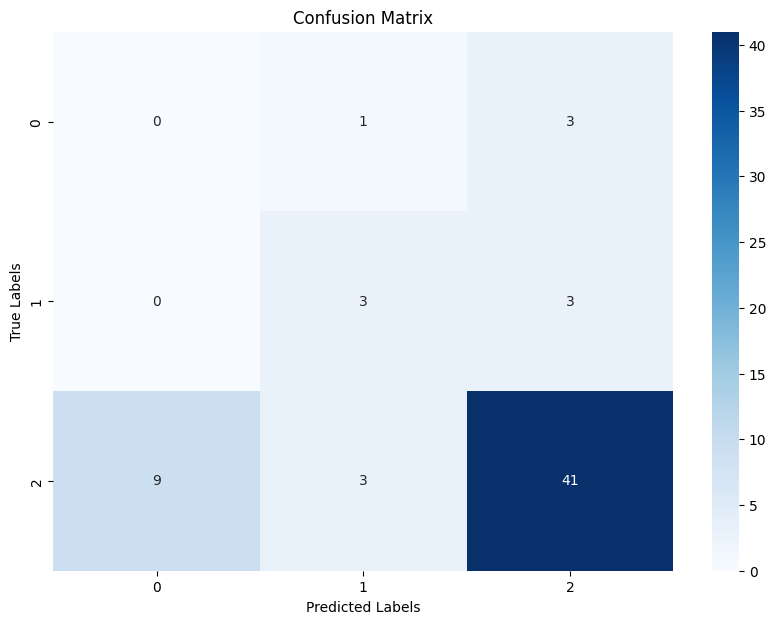

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

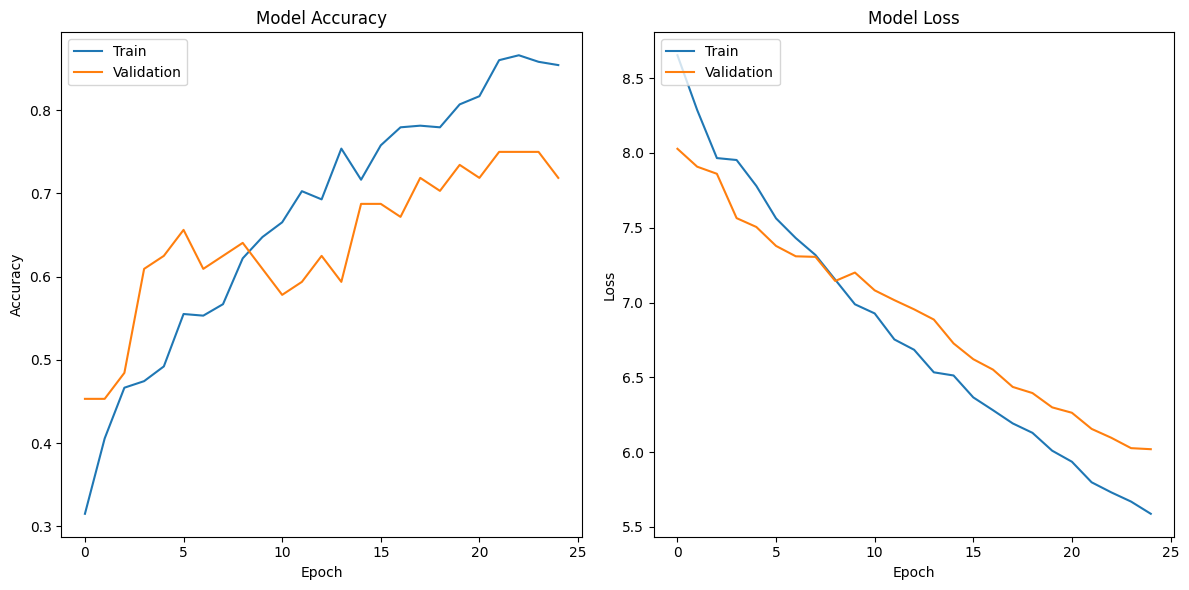

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## ResNet50

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import tensorflow as tf
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

# Load a pretrained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

csv_logger = CSVLogger('training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
16/16 [==============================] - 8s 342ms/step - loss: 0.8524 - accuracy: 0.7717 - val_loss: 0.6910 - val_accuracy: 0.7656 - lr: 1.0000e-04
Epoch 2/25
16/16 [==============================] - 2s 125ms/step - loss: 0.5505 - accuracy: 0.8189 - val_loss: 0.6301 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 3/25
16/16 [==============================] - 2s 126ms/step - loss: 0.4202 - accuracy: 0.8642 - val_loss: 0.5837 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 4/25
16/16 [==============================] - 2s 127ms/step - loss: 0.3373 - accuracy: 0.8760 - val_loss: 0.5653 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 5/25
16/16 [==============================] - 2s 119ms/step - loss: 0.2508 - accuracy: 0.9055 - val_loss: 0.5957 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 6/25
16/16 [==============================] - 2s 129ms/step - loss: 0.2397 - accuracy: 0.9193 - val_loss: 0.5271 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 7/25
16/16 [============================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_ResNet50_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_ResNet50_19_Sept_2024.h5


2/2 [==============================] - 1s 93ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.33      0.50         6
           2       0.87      1.00      0.93        53

    accuracy                           0.87        63
   macro avg       0.62      0.44      0.48        63
weighted avg       0.83      0.87      0.83        63



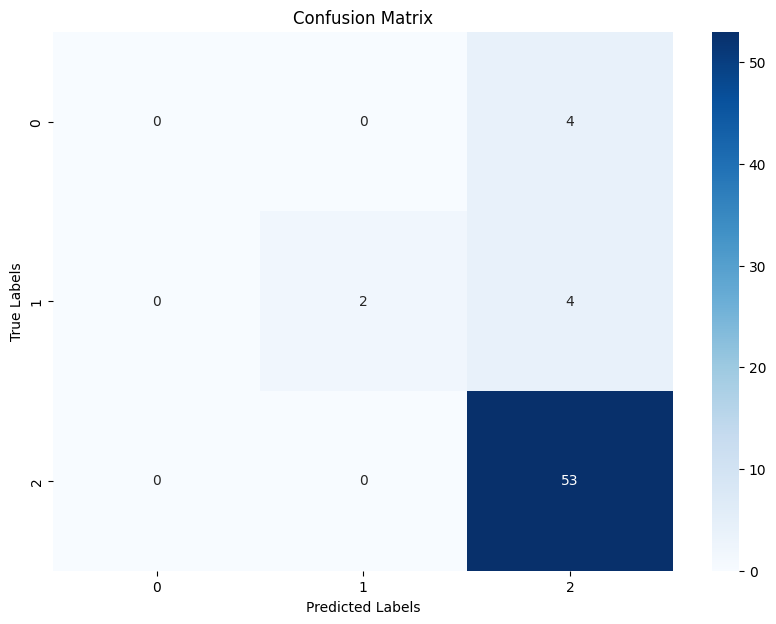

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

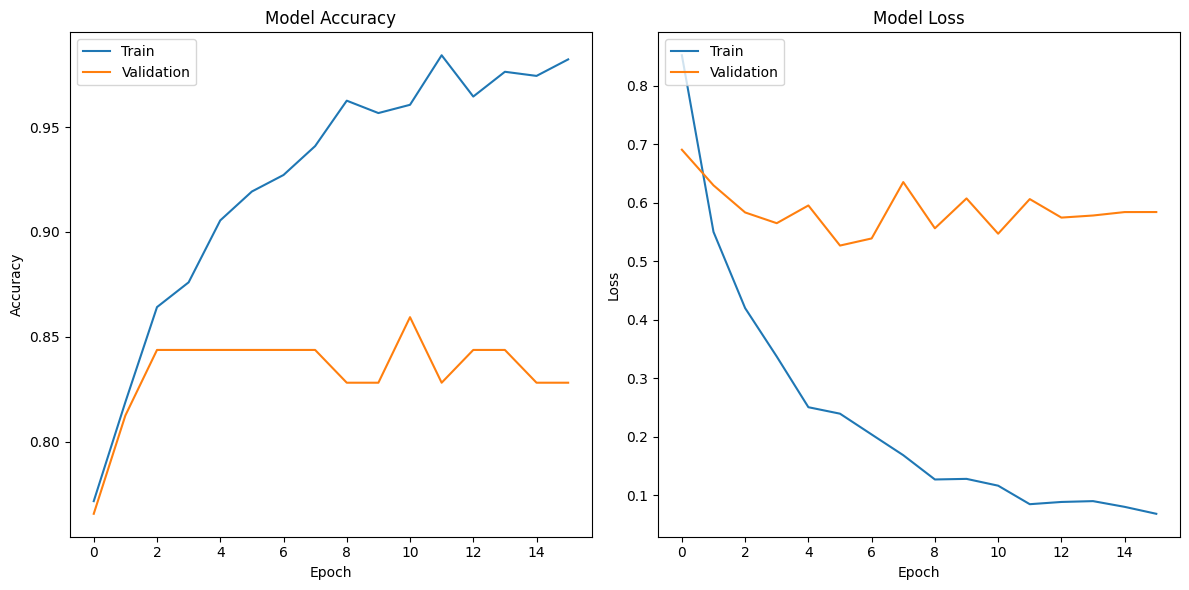

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## DenseNet201

In [ ]:
from tensorflow.keras.applications import DenseNet201
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('densenet201_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load DenseNet201
base_model = DenseNet201(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'DenseNet201 Test accuracy: {test_accuracy:.4f}')


Epoch 1/25
16/16 [==============================] - 22s 811ms/step - loss: 2.2399 - accuracy: 0.7264 - val_loss: 1.4789 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 2/25
16/16 [==============================] - 3s 178ms/step - loss: 2.1133 - accuracy: 0.7244 - val_loss: 1.4043 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 3/25
16/16 [==============================] - 3s 162ms/step - loss: 1.7262 - accuracy: 0.7283 - val_loss: 1.4365 - val_accuracy: 0.7969 - lr: 1.0000e-04
Epoch 4/25
16/16 [==============================] - 3s 162ms/step - loss: 1.2348 - accuracy: 0.7638 - val_loss: 1.5318 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 5/25
16/16 [==============================] - 3s 184ms/step - loss: 1.2411 - accuracy: 0.7894 - val_loss: 1.3274 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 6/25
16/16 [==============================] - 3s 163ms/step - loss: 1.1267 - accuracy: 0.7598 - val_loss: 1.3298 - val_accuracy: 0.7812 - lr: 1.0000e-04
Epoch 7/25
16/16 [===========================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_DenseNet201_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_DenseNet201_19_Sept_2024.h5


2/2 [==============================] - 3s 192ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       1.00      0.17      0.29         6
           2       0.85      0.98      0.91        53

    accuracy                           0.84        63
   macro avg       0.62      0.38      0.40        63
weighted avg       0.81      0.84      0.79        63



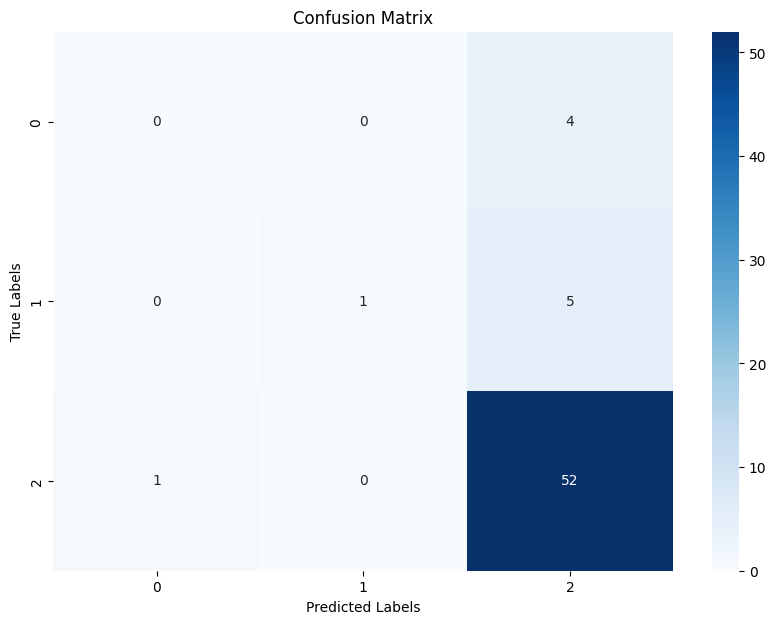

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

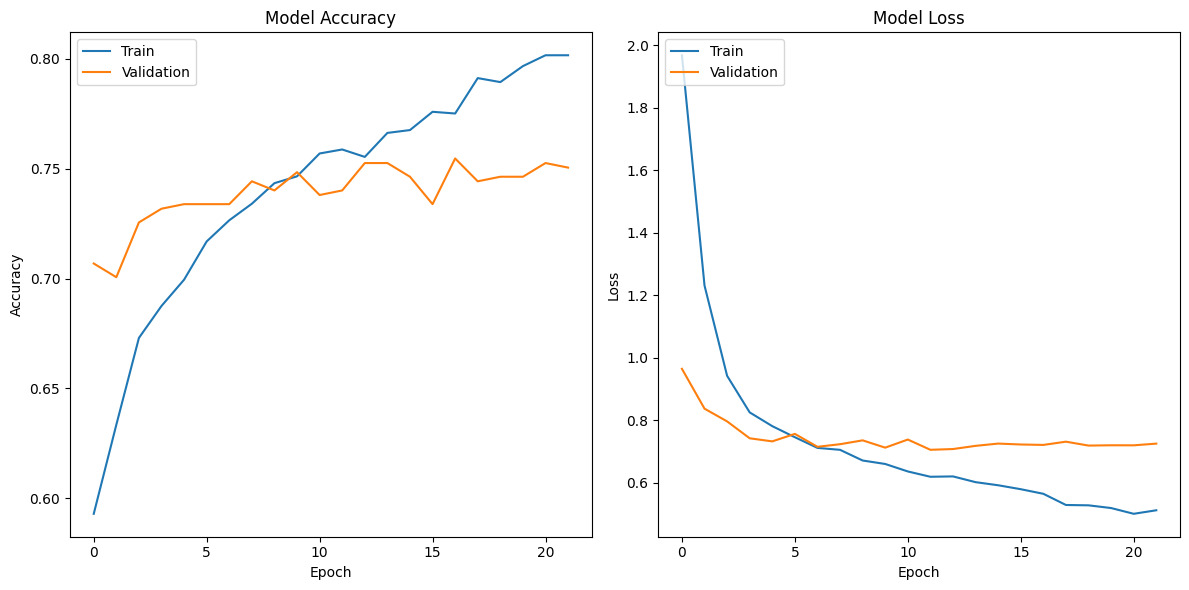

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## MobileNetV2

In [ ]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('mobilenetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load MobileNetV2
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    # class_weight=custom_class_weights,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'MobileNetV2 Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
16/16 [==============================] - 6s 136ms/step - loss: 0.8929 - accuracy: 0.7402 - val_loss: 0.8298 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 2/20
16/16 [==============================] - 1s 77ms/step - loss: 0.6570 - accuracy: 0.7894 - val_loss: 0.6512 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 3/20
16/16 [==============================] - 1s 69ms/step - loss: 0.5600 - accuracy: 0.8287 - val_loss: 0.6766 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 4/20
16/16 [==============================] - 1s 76ms/step - loss: 0.5247 - accuracy: 0.8386 - val_loss: 0.6480 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 5/20
16/16 [==============================] - 1s 72ms/step - loss: 0.4914 - accuracy: 0.8209 - val_loss: 0.6621 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 6/20
16/16 [==============================] - 1s 86ms/step - loss: 0.4722 - accuracy: 0.8406 - val_loss: 0.6371 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 7/20
16/16 [==============================] -

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_MobileNetV2_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_MobileNetV2_19_Sept_2024.h5


2/2 [==============================] - 1s 70ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           2       0.84      1.00      0.91        53

    accuracy                           0.84        63
   macro avg       0.28      0.33      0.30        63
weighted avg       0.71      0.84      0.77        63



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


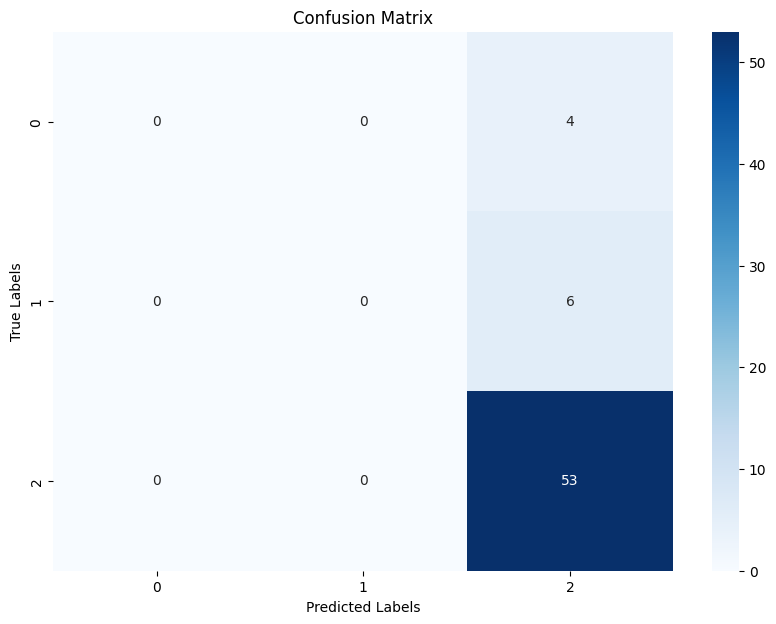

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

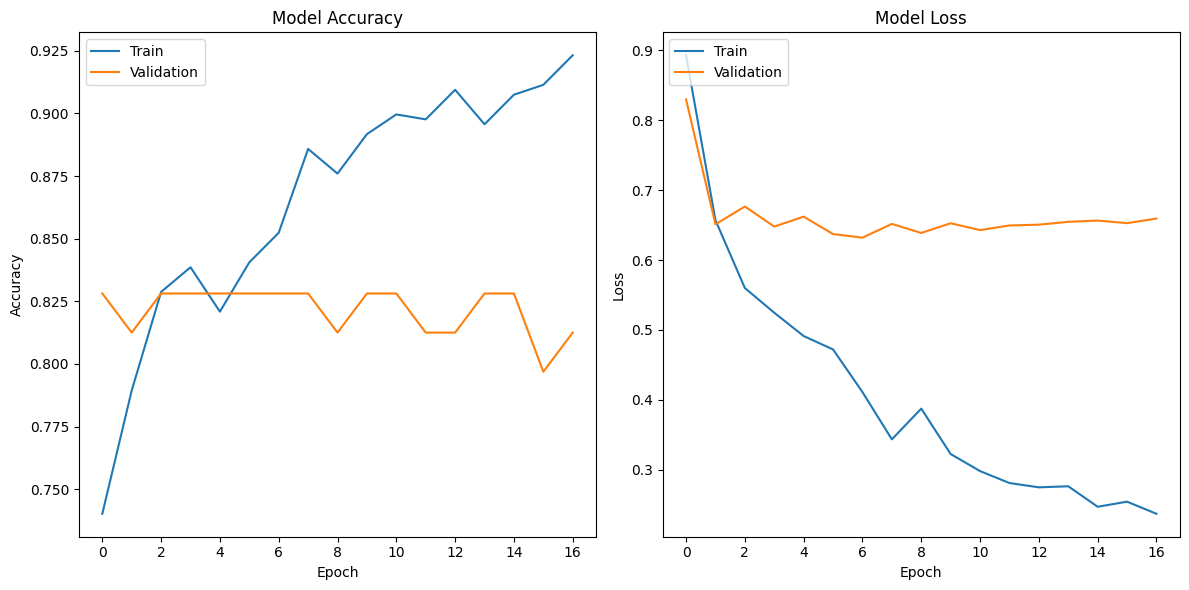

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## Xception

In [ ]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('xception_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)


# Load Xception
base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Xception Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
16/16 [==============================] - 9s 391ms/step - loss: 2.1566 - accuracy: 0.6949 - val_loss: 1.6395 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 2/20
16/16 [==============================] - 2s 150ms/step - loss: 1.4618 - accuracy: 0.7362 - val_loss: 0.9581 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 3/20
16/16 [==============================] - 2s 144ms/step - loss: 1.2017 - accuracy: 0.7343 - val_loss: 0.9849 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 4/20
16/16 [==============================] - 2s 144ms/step - loss: 1.1529 - accuracy: 0.7520 - val_loss: 1.0079 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 5/20
16/16 [==============================] - 2s 146ms/step - loss: 1.0302 - accuracy: 0.7835 - val_loss: 0.9640 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 6/20
16/16 [==============================] - 2s 146ms/step - loss: 0.8277 - accuracy: 0.7657 - val_loss: 0.9960 - val_accuracy: 0.8125 - lr: 1.0000e-04
Epoch 7/20
16/16 [============================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_Xception_19_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_Xception_19_Sept_2024.h5


2/2 [==============================] - 1s 118ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           2       0.84      1.00      0.91        53

    accuracy                           0.84        63
   macro avg       0.28      0.33      0.30        63
weighted avg       0.71      0.84      0.77        63



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


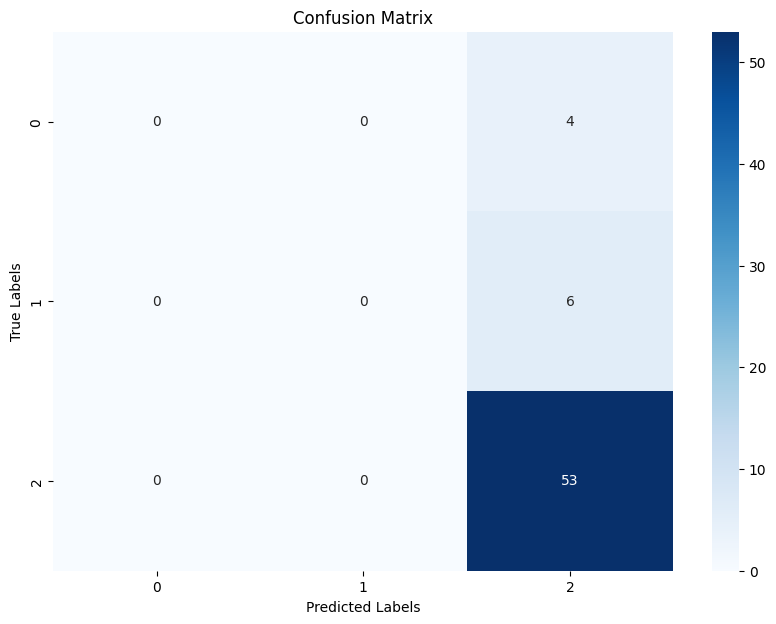

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

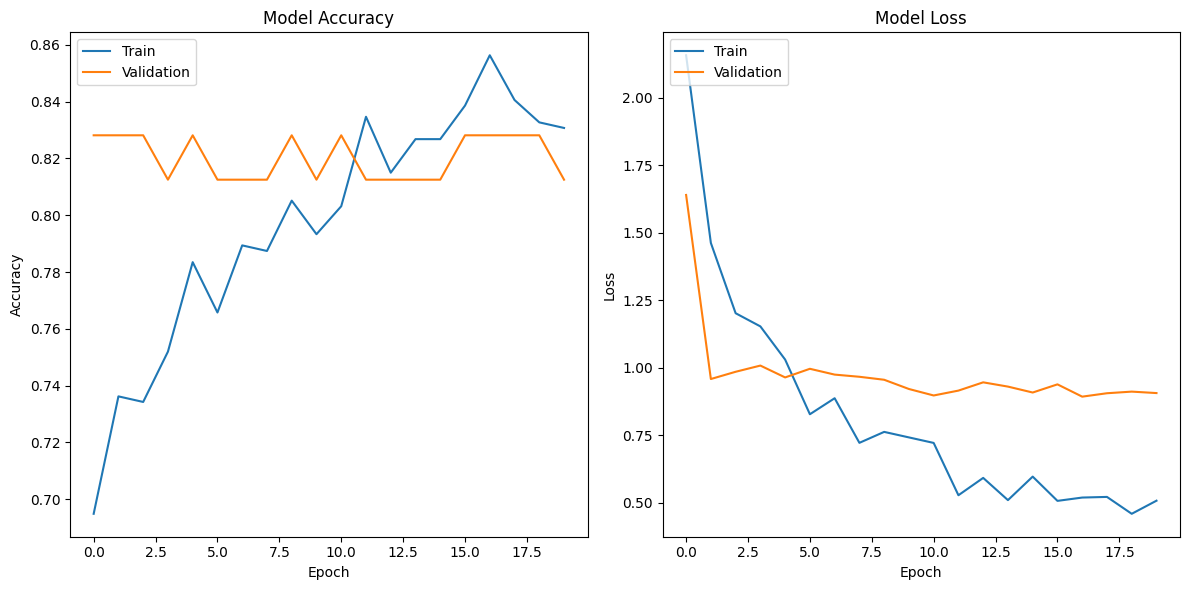

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## InceptionResNetV2

In [ ]:
from tensorflow.keras.applications import InceptionResNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('inceptionresnetv2_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load InceptionResNetV2
base_model = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'InceptionResNetV2 Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
16/16 [==============================] - 19s 628ms/step - loss: 40.3696 - accuracy: 0.6949 - val_loss: 17.6913 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 2/20
16/16 [==============================] - 3s 205ms/step - loss: 28.0243 - accuracy: 0.7126 - val_loss: 13.0933 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 3/20
16/16 [==============================] - 3s 185ms/step - loss: 20.7679 - accuracy: 0.7087 - val_loss: 14.9880 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 4/20
16/16 [==============================] - 3s 205ms/step - loss: 18.8066 - accuracy: 0.7126 - val_loss: 11.2154 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 5/20
16/16 [==============================] - 3s 209ms/step - loss: 15.2609 - accuracy: 0.7185 - val_loss: 8.1169 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 6/20
16/16 [==============================] - 3s 208ms/step - loss: 9.5338 - accuracy: 0.7224 - val_loss: 6.6193 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 7/20
16/16 [==================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_InceptionResNetV2_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_InceptionResNetV2_20_Sept_2024.h5


2/2 [==============================] - 6s 225ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           2       0.84      1.00      0.91        53

    accuracy                           0.84        63
   macro avg       0.28      0.33      0.30        63
weighted avg       0.71      0.84      0.77        63



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


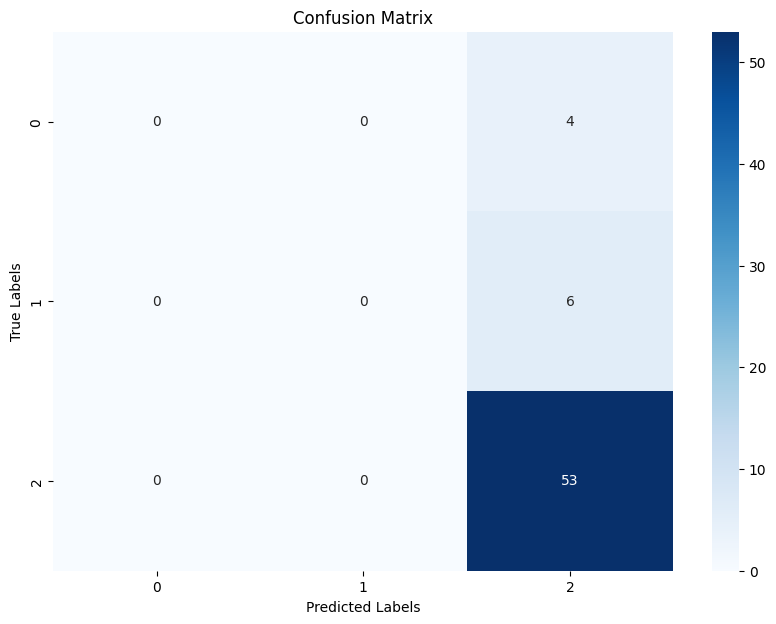

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

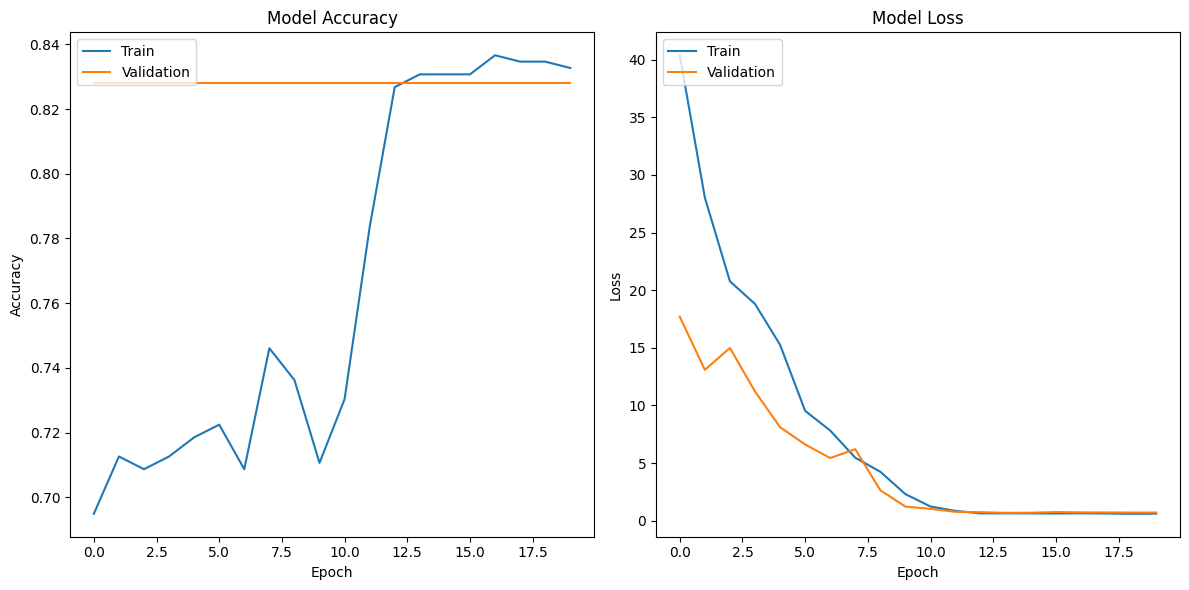

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


## NASNetLarge

In [ ]:
from tensorflow.keras.applications import NASNetLarge
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import CSVLogger, EarlyStopping, ReduceLROnPlateau

csv_logger = CSVLogger('nasnetlarge_training_log.csv', append=True)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', patience=5, factor=0.5, verbose=1)

# Load NASNetLarge
base_model = NASNetLarge(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(3, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=20,
    callbacks=[csv_logger, early_stopping, reduce_lr]
)

# Evaluate on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print(f'NASNetLarge Test accuracy: {test_accuracy:.4f}')


Epoch 1/20
16/16 [==============================] - 32s 985ms/step - loss: 2.2639 - accuracy: 0.6850 - val_loss: 1.7545 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 2/20
16/16 [==============================] - 7s 429ms/step - loss: 1.4831 - accuracy: 0.7618 - val_loss: 0.8803 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 3/20
16/16 [==============================] - 7s 428ms/step - loss: 0.9965 - accuracy: 0.7520 - val_loss: 0.8113 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 4/20
16/16 [==============================] - 7s 431ms/step - loss: 1.0088 - accuracy: 0.7618 - val_loss: 0.7167 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 5/20
16/16 [==============================] - 7s 432ms/step - loss: 0.9015 - accuracy: 0.7992 - val_loss: 0.6709 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 6/20
16/16 [==============================] - 6s 402ms/step - loss: 0.8594 - accuracy: 0.7913 - val_loss: 0.7704 - val_accuracy: 0.8281 - lr: 1.0000e-04
Epoch 7/20
16/16 [===========================

In [ ]:
import os

model_save_path = '/content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_NASNetLarge_20_Sept_2024.h5'
model.save(model_save_path)

print(f"Model saved at {model_save_path}")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved at /content/drive/MyDrive/Student/Mohit/Model/Fitzpatrick_17k/V3/SkinTone_RAW/ST_6_NASNetLarge_20_Sept_2024.h5


2/2 [==============================] - 6s 359ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.00      0.00      0.00         6
           2       0.84      1.00      0.91        53

    accuracy                           0.84        63
   macro avg       0.28      0.33      0.30        63
weighted avg       0.71      0.84      0.77        63



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


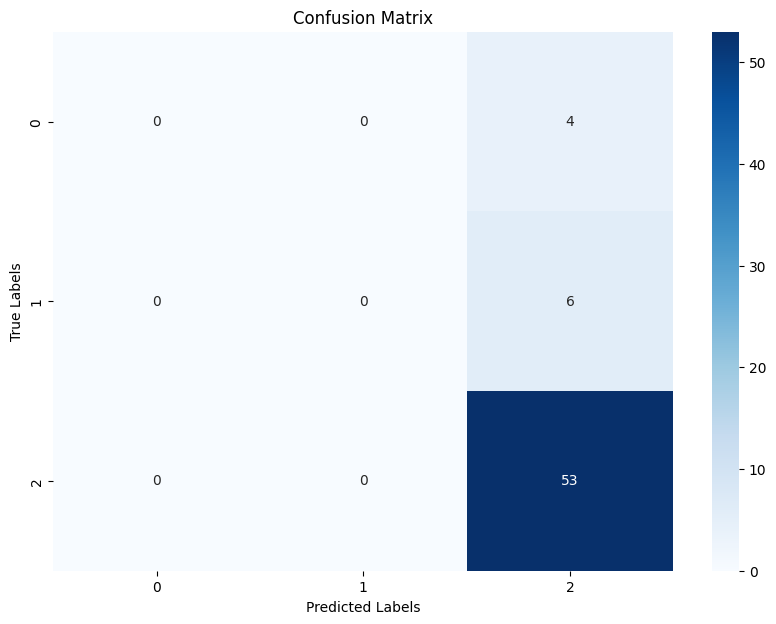

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

predictions = model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
class_labels = list(test_generator.class_indices.keys())

# Get true labels
true_classes = test_generator.classes

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Print classification report
print("Classification Report:")
report = classification_report(true_classes, predicted_classes, target_names=test_generator.class_indices.keys())
print(report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

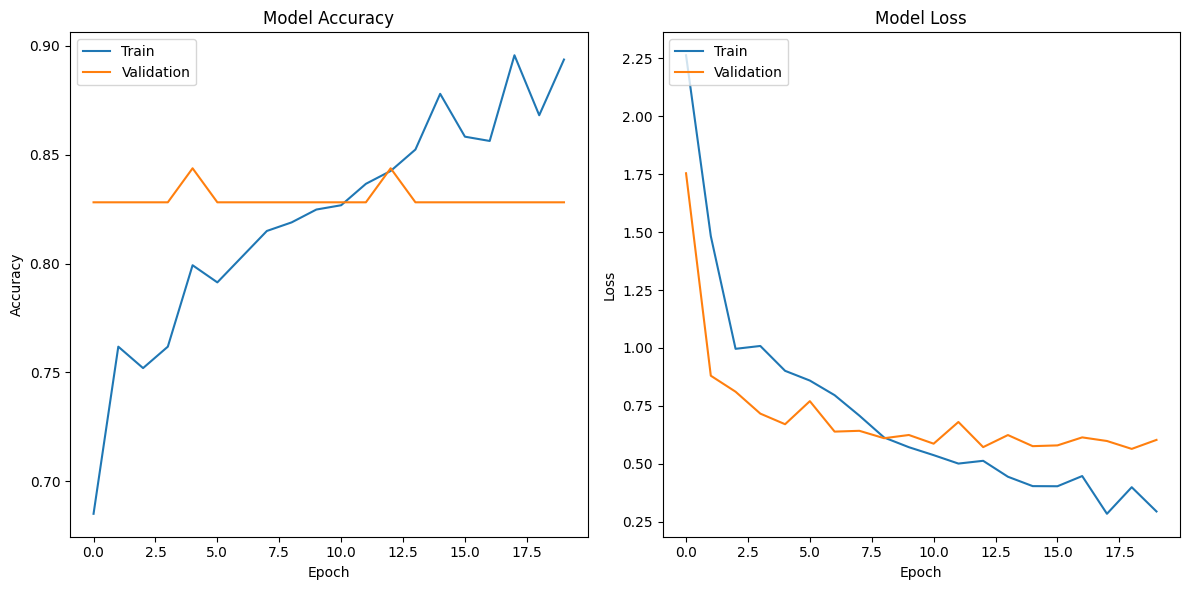

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()
